<a href="https://colab.research.google.com/github/sofiarodriguez-blip/Estadistica/blob/main/taller_regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EJERCICIO 1**

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Goles del Torneo Nacional de Fútbol

Datos cargados: 6 equipos
Variable independiente (X): Goles anotados (X)
Variable dependiente (Y): Goles recibidos (Y)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generando Histogramas...


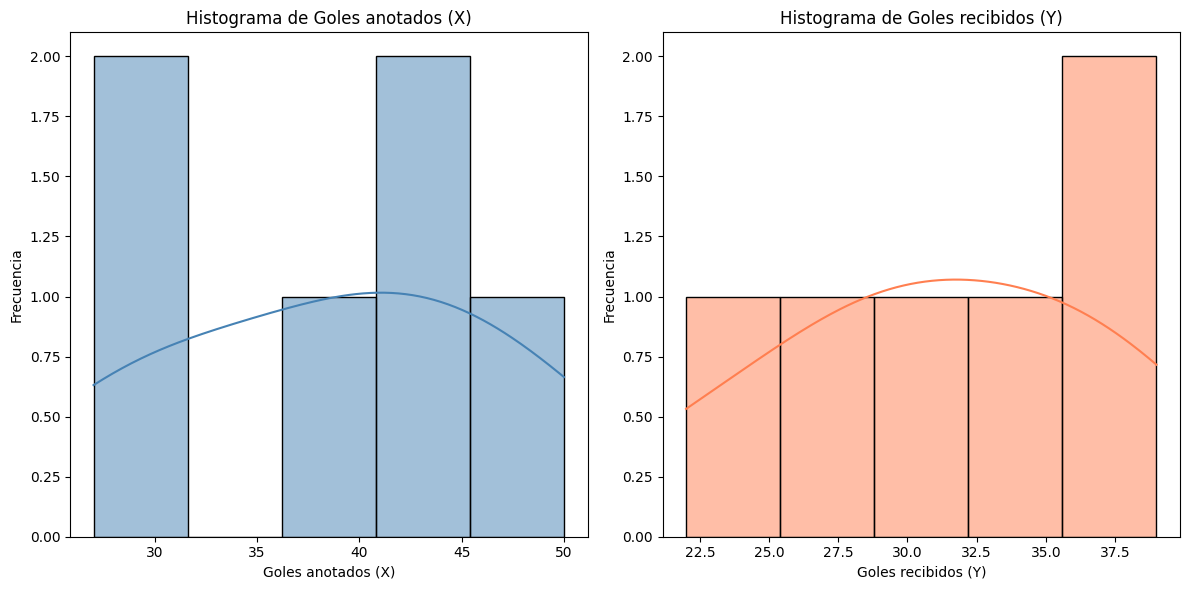

------------------------------
Generando Diagrama de Dispersión...


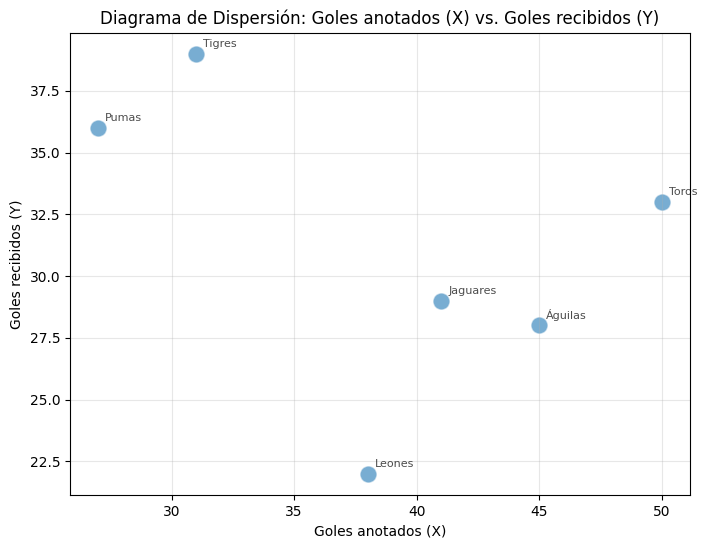

------------------------------
Realizando Pruebas de Normalidad...
Prueba Shapiro-Wilk para 'Goles anotados (X)': Estadístico=0.976, p-value=0.928
Prueba Shapiro-Wilk para 'Goles recibidos (Y)': Estadístico=0.980, p-value=0.950

Interpretación de los resultados de normalidad:
✓ La variable 'Goles anotados (X)' parece seguir una distribución normal (p > 0.05).
✓ La variable 'Goles recibidos (Y)' parece seguir una distribución normal (p > 0.05).
------------------------------
Calculando Coeficientes de Correlación...
Coeficiente de correlación de Pearson: -0.4365
Coeficiente de correlación de Kendall: -0.2000
Coeficiente de correlación de Spearman: -0.4286
------------------------------
Determinando el coeficiente de correlación más apropiado...
✓ Ambas variables parecen estar normalmente distribuidas. El coeficiente de correlación de Pearson (-0.4365) es el más apropiado.

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe correlación lineal)

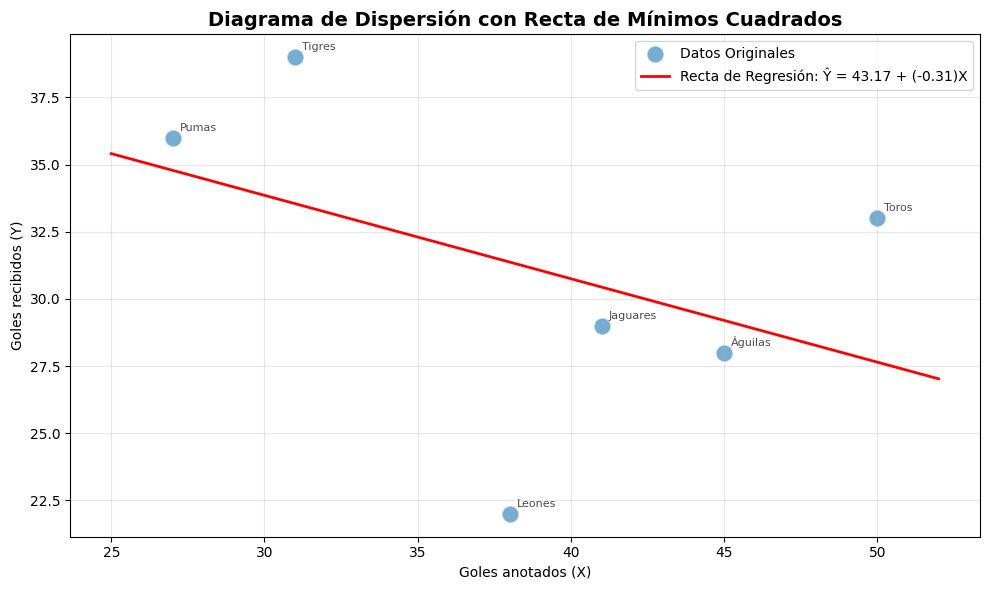


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β ≠ 0 (Existe una relación lineal significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 151.2329
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 6.1488

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 369.3333
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.3200

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (-0.3105 - 0) / 0.3200
   t calculado = -0.9704

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 4
   Valor crítico (t_0.025,4) = ±2.7764
   Valor p (dos colas) = 0.3868

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
|t calculado| (0.9704) < t crítico (2.7764)
valor p (0.3868) ≥ α (0.05)

DECISIÓN: NO RECHAZAR H0
INTERPRETACIÓN: ✗ La pendiente NO es significativamente diferen

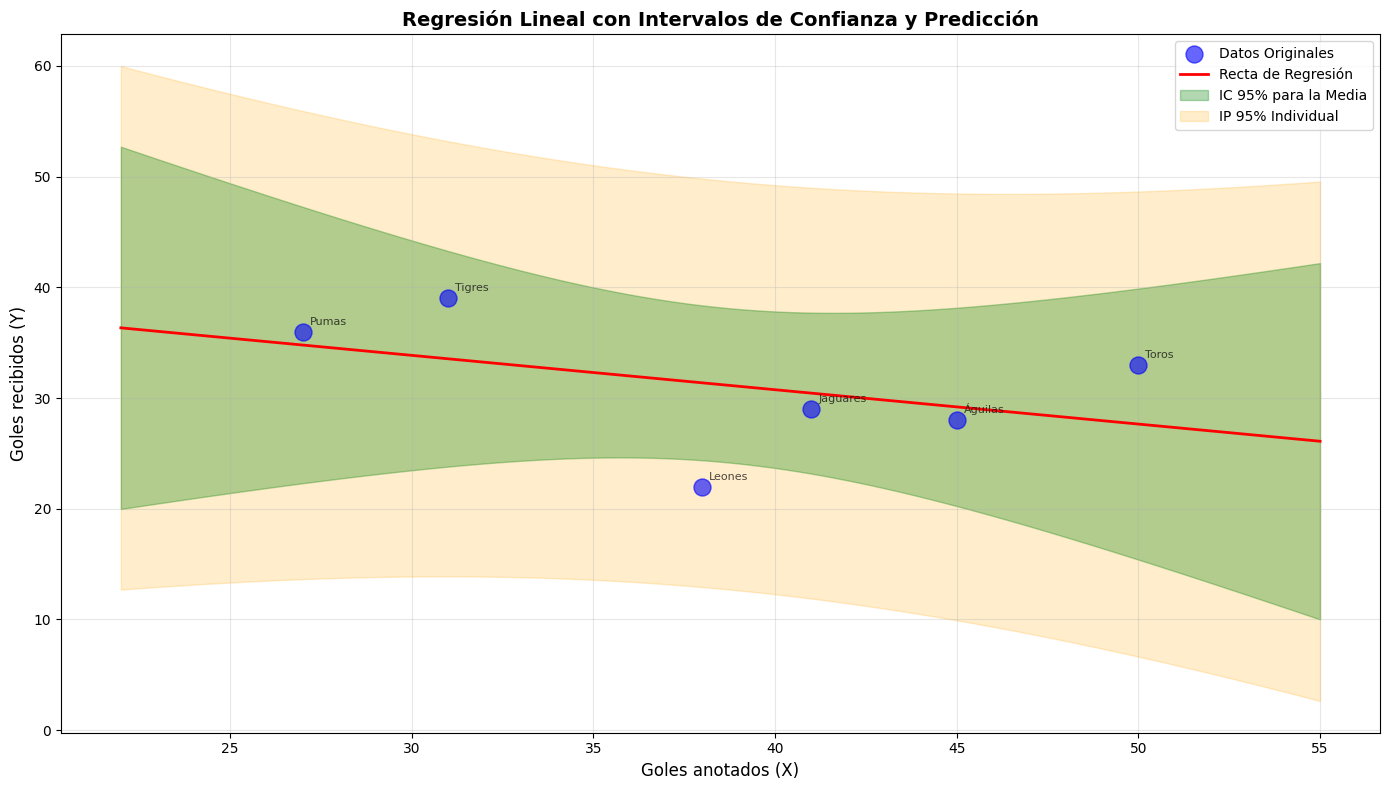

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Equipo       X        Y        ŷ        Residuo    Res. Std. 
-----------------------------------------------------------------
Leones       38       22       31.37    -9.37      -1.52     
Águilas      45       28       29.20    -1.20      -0.20     
Tigres       31       39       33.55    5.45       0.89      
Toros        50       33       27.65    5.35       0.87      
Pumas        27       36       34.79    1.21       0.20      
Jaguares     41       29       30.44    -1.44      -0.23     

Estadísticas de los Residuos:
  Media de residuos: -0.0000 (debe ser ≈ 0)
  Desviación estándar: 5.4997
  Residuo mínimo: -9.3736
  Residuo máximo: 5.4531


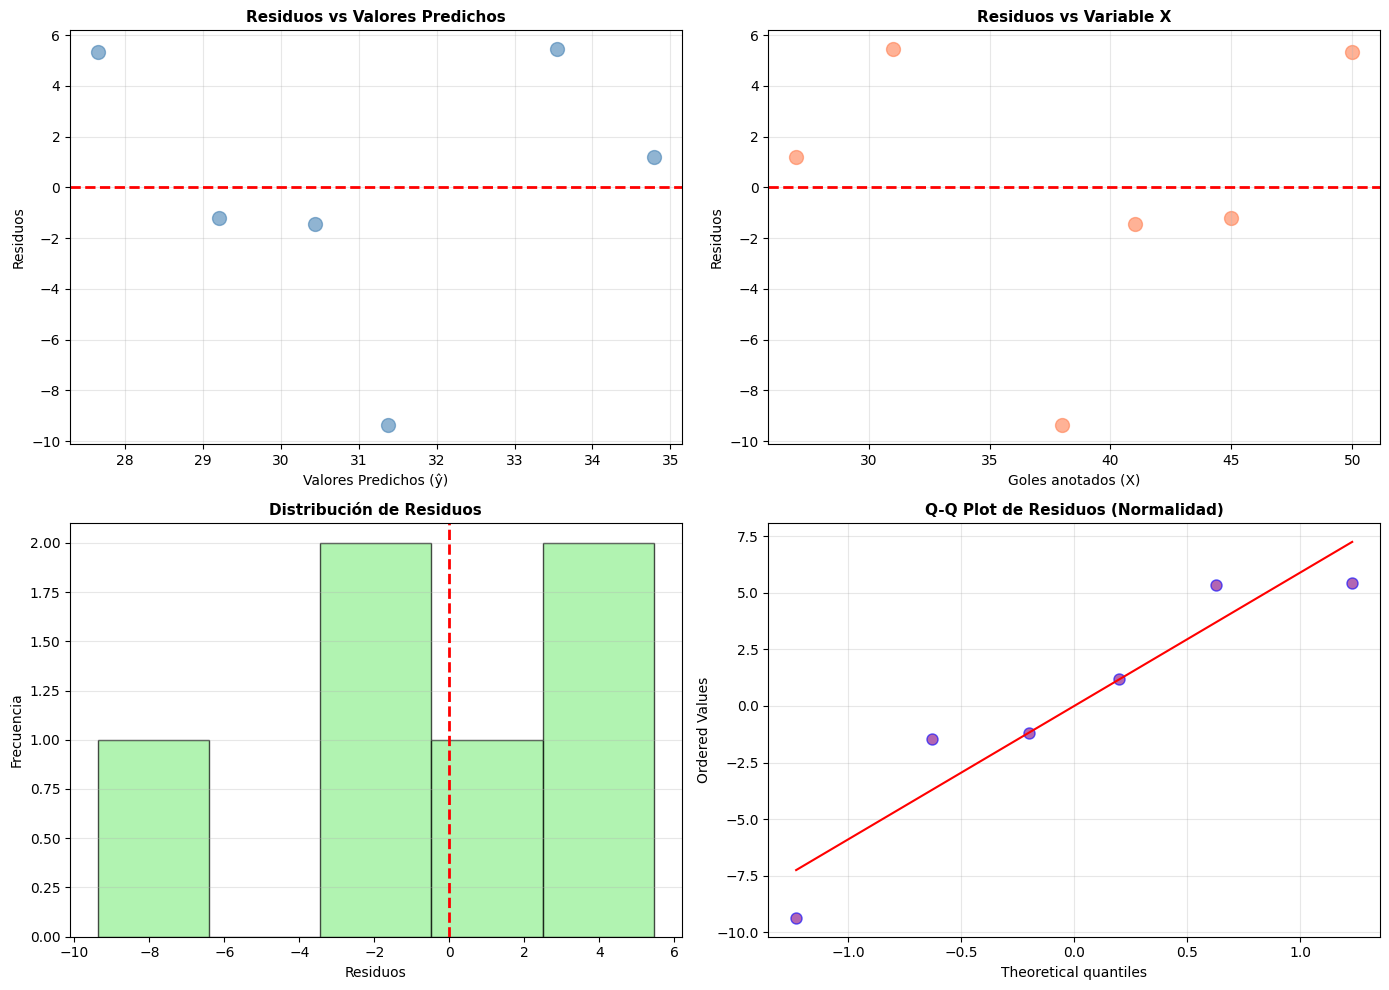


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.8979
  Valor p = 0.3619
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Goles anotados (X): p-value = 0.9283
     ✓ Distribución normal
   • Goles recibidos (Y): p-value = 0.9500
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.3619
     ✓ Distribución normal

3. HOMOCEDASTICIDAD 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (GOLES DE FÚTBOL) ---
data = {
    'Equipo': [
        'Leones', 'Águilas', 'Tigres', 'Toros', 'Pumas', 'Jaguares'
    ],
    'Goles anotados (X)': [38, 45, 31, 50, 27, 41],
    'Goles recibidos (Y)': [22, 28, 39, 33, 36, 29]
}
df = pd.DataFrame(data)

variable_x = 'Goles anotados (X)'
variable_y = 'Goles recibidos (Y)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Goles del Torneo Nacional de Fútbol")
print("=" * 70)
print(f"\nDatos cargados: {n} equipos")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerando Histogramas...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue', bins=5)
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral', bins=5)
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generando Diagrama de Dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=150, alpha=0.6)
# Añadir etiquetas de equipos
for idx, row in df.iterrows():
    plt.annotate(row['Equipo'],
                (row[variable_x], row[variable_y]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.7)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Realizando Pruebas de Normalidad...")
shapiro_test_x = shapiro(df[variable_x])
print(f"Prueba Shapiro-Wilk para '{variable_x}': Estadístico={shapiro_test_x.statistic:.3f}, p-value={shapiro_test_x.pvalue:.3f}")

shapiro_test_y = shapiro(df[variable_y])
print(f"Prueba Shapiro-Wilk para '{variable_y}': Estadístico={shapiro_test_y.statistic:.3f}, p-value={shapiro_test_y.pvalue:.3f}")

print("\nInterpretación de los resultados de normalidad:")
if shapiro_test_x.pvalue > alfa:
    print(f"✓ La variable '{variable_x}' parece seguir una distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_x}' no parece seguir una distribución normal (p <= 0.05).")

if shapiro_test_y.pvalue > alfa:
    print(f"✓ La variable '{variable_y}' parece seguir una distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_y}' no parece seguir una distribución normal (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculando Coeficientes de Correlación...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de correlación de Kendall: {kendall_corr:.4f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determinando el coeficiente de correlación más apropiado...")
if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
    print(f"✓ Ambas variables parecen estar normalmente distribuidas. El coeficiente de correlación de Pearson ({pearson_corr:.4f}) es el más apropiado.")
else:
    print(f"⚠ Al menos una variable no parece estar normalmente distribuida. El coeficiente de correlación de Spearman ({spearman_corr:.4f}) o Kendall ({kendall_corr:.4f}) son medidas no paramétricas más apropiadas.")
print("=" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X y Y
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + ({b1:.4f}) * X              │")
print("└─────────────────────────────────────────────────────┘")
print("\nInterpretación:")
print(f"• Por cada gol adicional anotado, se espera que los")
print(f"  goles recibidos {'aumenten' if b1 > 0 else 'disminuyan'} en {abs(b1):.4f}")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=150, alpha=0.6)

# Añadir etiquetas de equipos
for idx, row in df.iterrows():
    plt.annotate(row['Equipo'],
                (row[variable_x], row[variable_y]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.7)

# Crear la línea de regresión
x_min = df[variable_x].min() - 2
x_max = df[variable_x].max() + 2
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + ({b1:.2f})X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β ≠ 0 (La pendiente es significativamente diferente de cero) - prueba de dos colas

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β ≠ 0 (Existe una relación lineal significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de dos colas)
t_critico_pendiente = t.ppf(1 - alfa/2, gl_pendiente)

# Valor p (prueba de dos colas)
valor_p_pendiente = t.sf(abs(t_calculado_pendiente), gl_pendiente) * 2

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t_{alfa/2},{gl_pendiente}) = ±{t_critico_pendiente:.4f}")
print(f"   Valor p (dos colas) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de goles anotados tiene un efecto significativo sobre el número de
    goles recibidos.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de goles
    anotados tenga un efecto significativo sobre el número de goles recibidos.
    """

print(f"|t calculado| ({abs(t_calculado_pendiente):.4f}) {'>' if abs(t_calculado_pendiente) > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

SSE = suma_diferencias_cuadradas
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en el número de            │")
print(f"│  goles recibidos puede ser explicada por el número de           │")
print(f"│  goles anotados.                                                │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

MSR = SSR / 1
MSE = SSE / (n - 2)
F_calculado = MSR / MSE
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# Valores de ejemplo para X
valores_x_ejemplo = [30, 38, 45, 50]

print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de goles recibidos:\n")
print(f"{'X (Anotados)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 70)

for x_val in valores_x_ejemplo:
    y_pred = b0 + b1 * x_val
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf
    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para goles recibidos INDIVIDUALES:\n")
print(f"{'X (Anotados)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 70)

for x_val in valores_x_ejemplo:
    y_pred = b0 + b1 * x_val
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred
    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=150, alpha=0.6, label='Datos Originales', zorder=3)

# Añadir etiquetas
for idx, row in df.iterrows():
    plt.annotate(row['Equipo'],
                (row[variable_x], row[variable_y]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.7)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 5, df[variable_x].max() + 5, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Equipo':<12} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 65)
for idx, row in df.iterrows():
    print(f"{row['Equipo']:<12} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=100, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=100, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(8)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-value = {shapiro_test_x.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_x.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-value = {shapiro_test_y.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_y.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Equipos con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Equipo']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_x.pvalue <= alfa or shapiro_test_y.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if abs(r) < 0.5:
    razones_transformacion.append("- Correlación lineal débil (|r| < 0.5)")
    necesita_transformacion = True

if len(outliers) > n * 0.15:
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True

if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r) >= 0.5:
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")

    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + ({b1:.4f}) × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} goles recibidos
   • Por cada gol adicional anotado, {'aumentan' if b1 > 0 else 'disminuyen'} {abs(b1):.4f} goles recibidos

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} goles

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El número de goles anotados es un predictor SIGNIFICATIVO del
   número de goles recibidos. El modelo explica {r_cuadrado*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Predecir goles recibidos basándose en goles anotados
   • Analizar la relación entre ataque y defensa
   • Evaluar el desempeño balanceado de los equipos

   Recomendación: IMPLEMENTAR este modelo en análisis deportivo.
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre goles anotados y recibidos, el modelo
   presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables explicativas (posesión, tiros, etc.)
   • Realizar análisis adicionales antes de implementar decisiones
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

**EJERCICIO 2**

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Relación entre Horas de Estudio y Calificación Final

Datos cargados: 12 estudiantes
Variable independiente (X): Horas de estudio (X)
Variable dependiente (Y): Calificación final (Y)
Nivel de significancia (α): 0.05

DATOS DEL PROBLEMA:
 Horas de estudio (X)  Calificación final (Y)
                    4                      65
                    7                      70
                   10                      85
                    6                      78
                    8                      82
                    9                      91
                    5                      74
                   11                      94
                    7                      80
                    6                      77
                    8                      84
                   10                      88

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generando Histogramas...


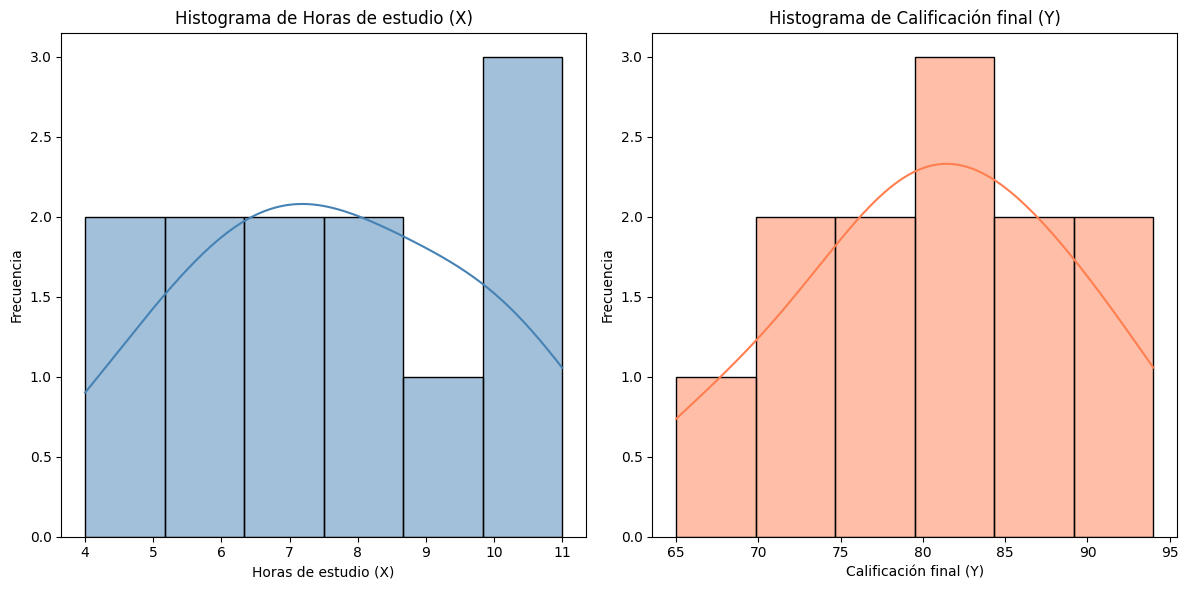

------------------------------
Generando Diagrama de Dispersión...


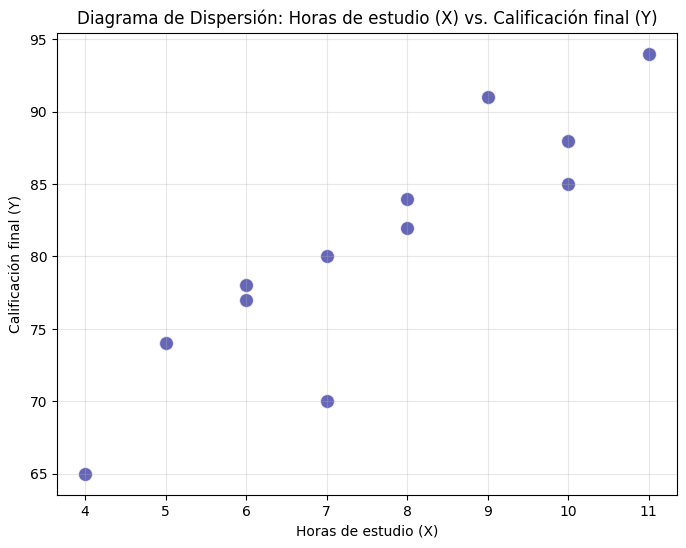

------------------------------
Realizando Pruebas de Normalidad...
Shapiro-Wilk para 'Horas de estudio (X)': Estadístico=0.971, p-valor=0.924
Shapiro-Wilk para 'Calificación final (Y)': Estadístico=0.989, p-valor=0.999

Interpretación de las pruebas de normalidad:
✓ La variable 'Horas de estudio (X)' parece estar normalmente distribuida (p > 0.05).
✓ La variable 'Calificación final (Y)' parece estar normalmente distribuida (p > 0.05).
------------------------------
Calculando Coeficientes de Correlación...
Coeficiente de correlación de Pearson: 0.8965
Coeficiente de correlación de Kendall: 0.8129
Coeficiente de correlación de Spearman: 0.9190
------------------------------
Determinando el coeficiente de correlación más apropiado...
✓ Ambas variables parecen normalmente distribuidas. El coeficiente de correlación de Pearson (0.8965) es el más apropiado.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---


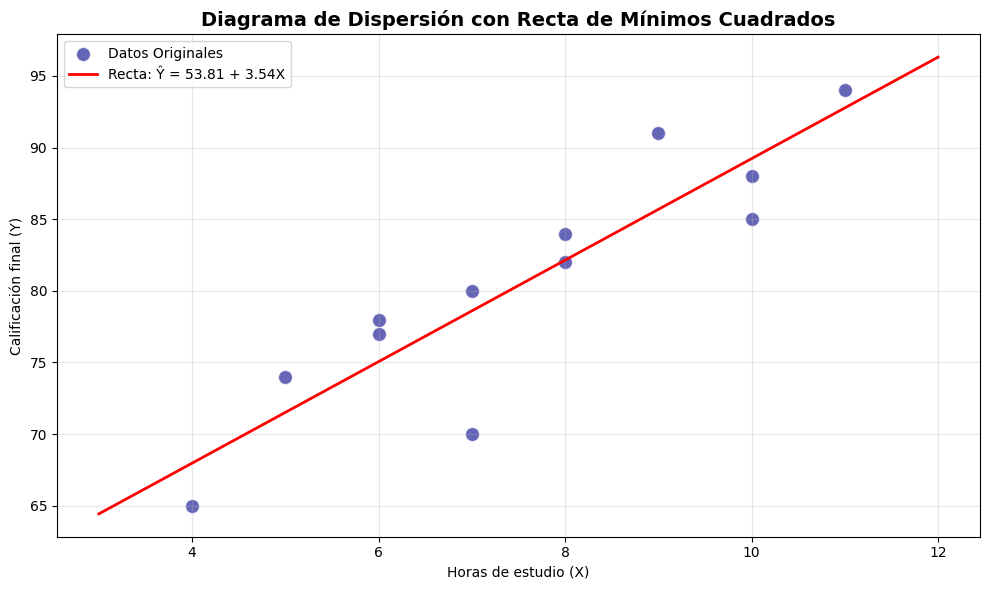


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Error Estándar de Estimación (s_y,x):
   s_y,x = 3.9494

2. Error Estándar de la Pendiente (s_b):
   s_b = 0.5535

3. Estadístico t:
   t calculado = 6.3991

4. Parámetros de la Prueba:
   α = 0.05
   gl = 10
   t crítico = 1.8125
   Valor p = 0.0000

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferente de cero.


Dado que el valor p (0.0000) < α (0.05), rechazamos H0.
Existe evidencia estadística suficiente para concluir que las horas de
estudio tienen un efecto significativo POSITIVO sobre la calificación final.

En términos prácticos: Por cada hora adicional de estudio, se espera un
incremento de 3.54 puntos en la cal

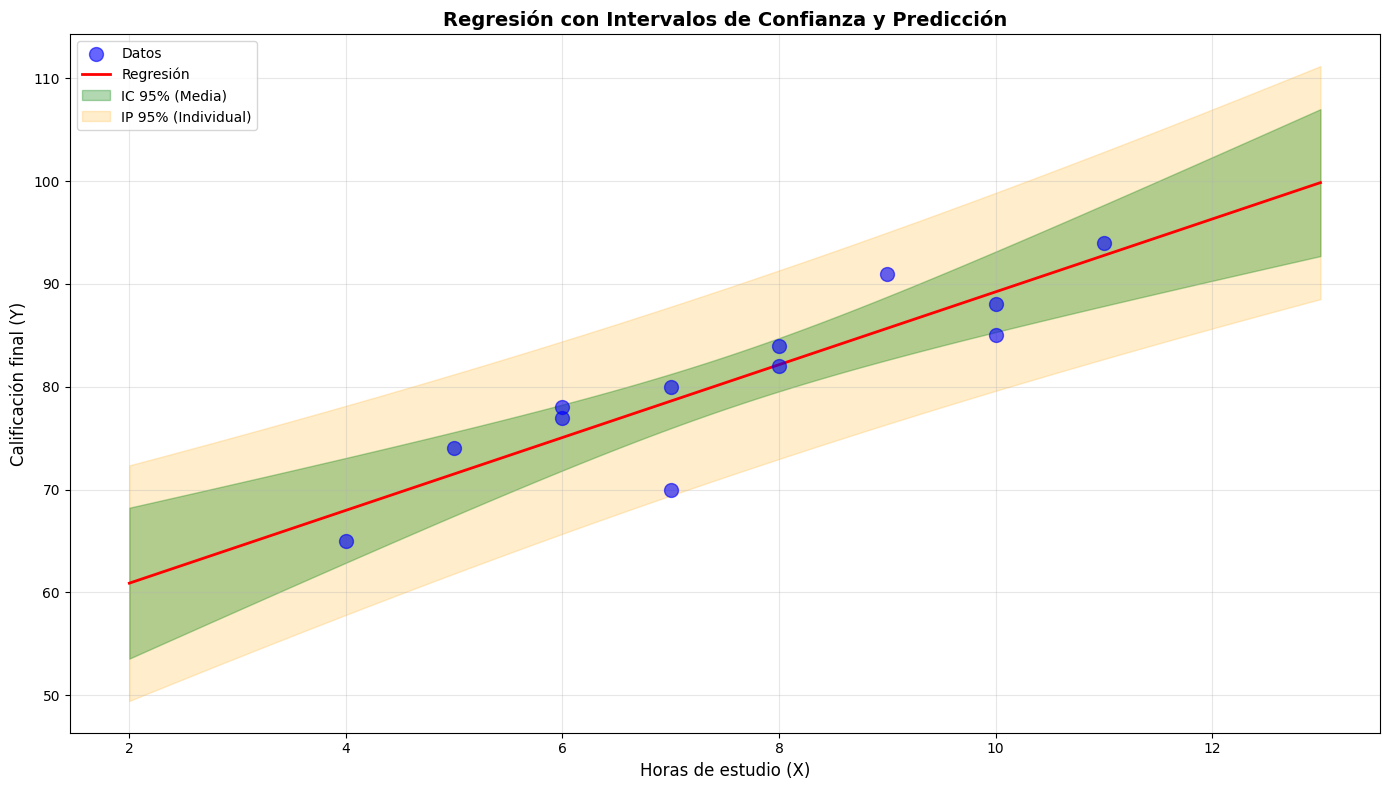


--- ANÁLISIS DE RESIDUOS ---

Estudiante   Horas (X)    Calif (Y)    Predic (Ŷ)     Residuo     
----------------------------------------------------------------------
Est-1        4.0          65.0         67.98          -2.98       
Est-2        7.0          70.0         78.60          -8.60       
Est-3        10.0         85.0         89.23          -4.23       
Est-4        6.0          78.0         75.06          2.94        
Est-5        8.0          82.0         82.14          -0.14       
Est-6        9.0          91.0         85.68          5.32        
Est-7        5.0          74.0         71.52          2.48        
Est-8        11.0         94.0         92.77          1.23        
Est-9        7.0          80.0         78.60          1.40        
Est-10       6.0          77.0         75.06          1.94        
Est-11       8.0          84.0         82.14          1.86        
Est-12       10.0         88.0         89.23          -1.23       

Media de residuos: -0.0000

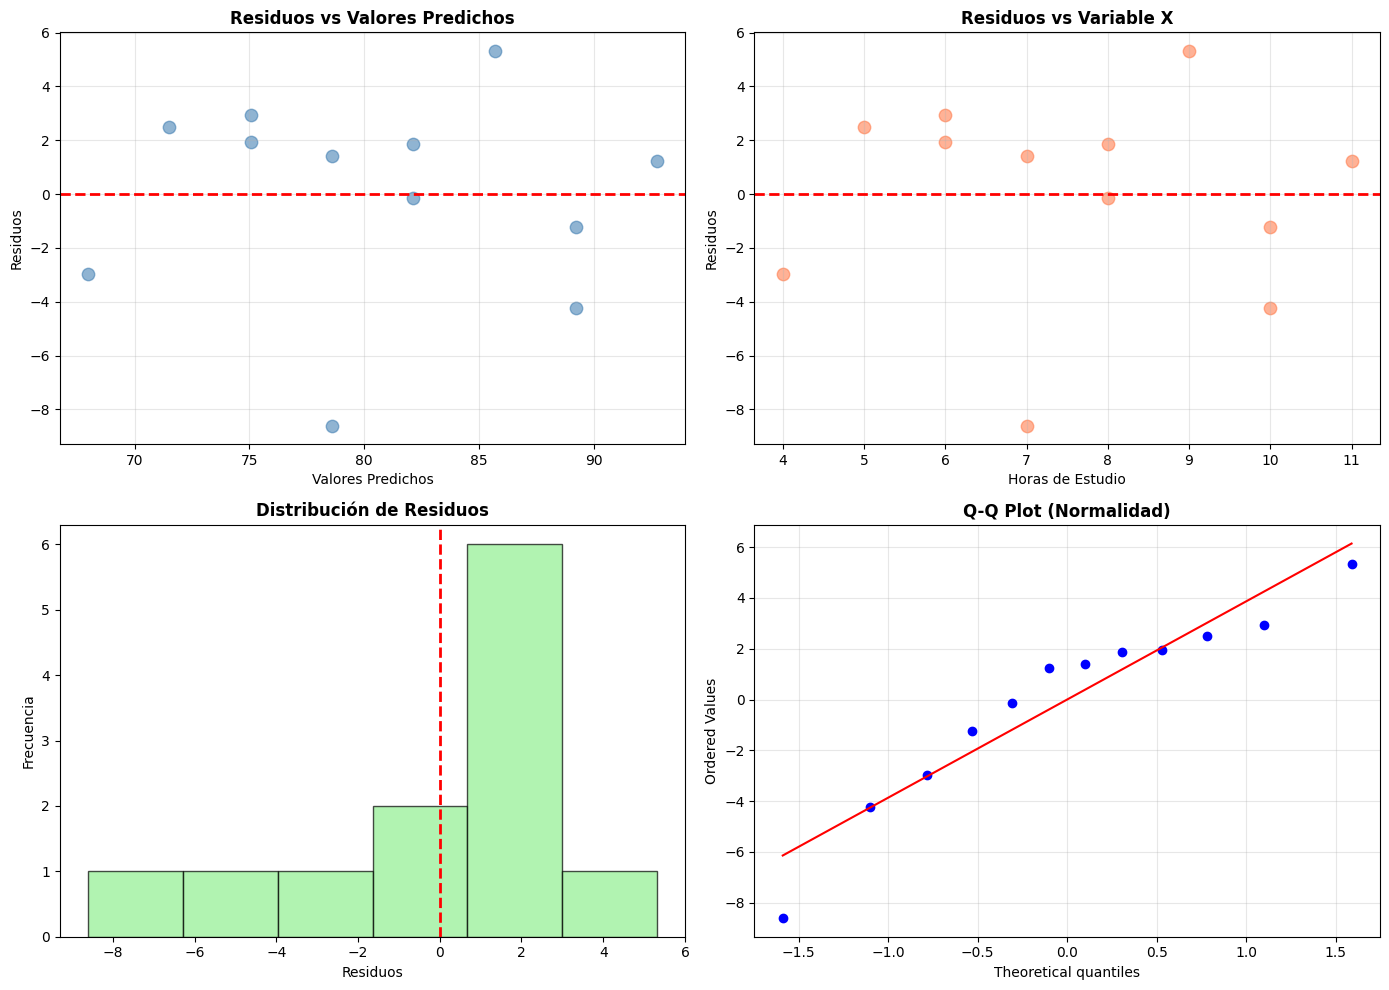


Prueba Shapiro-Wilk de Residuos: p-valor = 0.2811
✓ Los residuos siguen distribución normal

╔═════════════════════════════════════════════════════════════════╗
║              RESUMEN EJECUTIVO DEL ANÁLISIS                     ║
╚═════════════════════════════════════════════════════════════════╝

📊 ECUACIÓN DE REGRESIÓN:
   Calificación = 53.81 + 3.54 × Horas de Estudio

📈 BONDAD DE AJUSTE:
   • Correlación (r): 0.8965 - Correlación fuerte
   • R²: 0.8037 (80.4% de variabilidad explicada)
   • Error estándar: ±3.95 puntos

✅ PRUEBAS DE SIGNIFICANCIA:
   • Correlación: SIGNIFICATIVA ✓ (p = 0.0001)
   • Pendiente: SIGNIFICATIVA ✓ (p = 0.0000)
   • Modelo ANOVA: SIGNIFICATIVO ✓ (p = 0.000078)

💡 CONCLUSIÓN:

   ✓ EL MODELO ES VÁLIDO Y ÚTIL

   Las horas de estudio son un predictor significativo de la calificación.
   Por cada hora adicional de estudio, la calificación aumenta 3.54 puntos.
   El modelo explica 80.4% de la variación en las calificaciones.

   RECOMENDACIÓN: Utilizar este m

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (HORAS DE ESTUDIO VS CALIFICACIÓN) ---
data = {
    'Horas de estudio (X)': [4, 7, 10, 6, 8, 9, 5, 11, 7, 6, 8, 10],
    'Calificación final (Y)': [65, 70, 85, 78, 82, 91, 74, 94, 80, 77, 84, 88]
}
df = pd.DataFrame(data)

variable_x = 'Horas de estudio (X)'
variable_y = 'Calificación final (Y)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Relación entre Horas de Estudio y Calificación Final")
print("=" * 70)
print(f"\nDatos cargados: {n} estudiantes")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# Mostrar datos
print("\nDATOS DEL PROBLEMA:")
print(df.to_string(index=False))
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histogramas
print("\nGenerando Histogramas...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue', bins=6)
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral', bins=6)
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Diagrama de Dispersión
print("Generando Diagrama de Dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6, color='darkblue')
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Pruebas de Normalidad (Shapiro-Wilk)
print("Realizando Pruebas de Normalidad...")
shapiro_test_x = shapiro(df[variable_x])
print(f"Shapiro-Wilk para '{variable_x}': Estadístico={shapiro_test_x.statistic:.3f}, p-valor={shapiro_test_x.pvalue:.3f}")

shapiro_test_y = shapiro(df[variable_y])
print(f"Shapiro-Wilk para '{variable_y}': Estadístico={shapiro_test_y.statistic:.3f}, p-valor={shapiro_test_y.pvalue:.3f}")

print("\nInterpretación de las pruebas de normalidad:")
if shapiro_test_x.pvalue > alfa:
    print(f"✓ La variable '{variable_x}' parece estar normalmente distribuida (p > 0.05).")
else:
    print(f"✗ La variable '{variable_x}' no parece estar normalmente distribuida (p ≤ 0.05).")

if shapiro_test_y.pvalue > alfa:
    print(f"✓ La variable '{variable_y}' parece estar normalmente distribuida (p > 0.05).")
else:
    print(f"✗ La variable '{variable_y}' no parece estar normalmente distribuida (p ≤ 0.05).")
print("-" * 30)

# 4. Calcular Coeficientes de Correlación
print("Calculando Coeficientes de Correlación...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de correlación de Kendall: {kendall_corr:.4f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determinar el coeficiente de correlación más apropiado
print("Determinando el coeficiente de correlación más apropiado...")
if shapiro_test_x.pvalue > alfa and shapiro_test_y.pvalue > alfa:
    print(f"✓ Ambas variables parecen normalmente distribuidas. El coeficiente de correlación de Pearson ({pearson_corr:.4f}) es el más apropiado.")
else:
    print(f"⚠ Al menos una variable no parece normalmente distribuida. Los coeficientes de Spearman ({spearman_corr:.4f}) o Kendall ({kendall_corr:.4f}) son medidas no paramétricas más apropiadas.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

r = pearson_corr
gl = n - 2

try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

valor_p = t.sf(abs(t_calculado), gl) * 2
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)
b1 = r * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f} horas")
print(f"Media de Y (ȳ): {mean_y:.2f} puntos")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("\nInterpretación:")
print(f"  • Por cada hora adicional de estudio, la calificación")
print(f"    aumenta en promedio {b1:.2f} puntos")
print(f"  • Un estudiante que no estudia (X=0) obtendría")
print(f"    aproximadamente {b0:.2f} puntos (extrapolación)")
print("=" * 70)

# Visualización de la Recta de Regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6, color='darkblue')

x_min = df[variable_x].min() - 1
x_max = df[variable_x].max() + 1
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

df['y_predicho'] = b0 + b1 * df[variable_x]
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Error Estándar de Estimación (s_y,x):")
print(f"   s_y,x = {s_yx:.4f}")

desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Error Estándar de la Pendiente (s_b):")
print(f"   s_b = {s_b:.4f}")

t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Estadístico t:")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

gl_pendiente = n - 2
t_critico_pendiente = t.ppf(1 - alfa, gl_pendiente)
valor_p_pendiente = t.sf(t_calculado_pendiente, gl_pendiente)

print(f"\n4. Parámetros de la Prueba:")
print(f"   α = {alfa}")
print(f"   gl = {gl_pendiente}")
print(f"   t crítico = {t_critico_pendiente:.4f}")
print(f"   Valor p = {valor_p_pendiente:.4f}")

print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos H0.
Existe evidencia estadística suficiente para concluir que las horas de
estudio tienen un efecto significativo POSITIVO sobre la calificación final.

En términos prácticos: Por cada hora adicional de estudio, se espera un
incremento de {b1:.2f} puntos en la calificación, y este efecto es
estadísticamente significativo.
"""
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos H0.
No hay evidencia estadística suficiente para concluir que las horas de
estudio tengan un efecto significativo sobre la calificación final.
"""

print(f"DECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")
print(f"\n{conclusion_pendiente}")
print("=" * 70)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

SSE = suma_diferencias_cuadradas
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE
r_cuadrado = 1 - (SSE / SS_Total)

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nR² = {r_cuadrado:.4f}")
print(f"Verificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en las calificaciones       │")
print(f"│  puede ser explicada por las horas de estudio.                  │")
print(f"└─────────────────────────────────────────────────────────────────┘")
print("=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

MSR = SSR / 1
MSE = SSE / (n - 2)
F_calculado = MSR / MSE
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
print("=" * 70)

# =========================================================================
# --- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

valores_x_ejemplo = [5, 7, 9, 11]

print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA (95%)")
print("-" * 70)
print(f"{'Horas':<10} {'Calificación':<18} {'Intervalo de Confianza':<35}")
print("-" * 70)

for x_val in valores_x_ejemplo:
    y_pred = b0 + b1 * x_val
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf
    print(f"{x_val:<10} {y_pred:<18.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN INDIVIDUAL (95%)")
print("-" * 70)
print(f"{'Horas':<10} {'Calificación':<18} {'Intervalo de Predicción':<35}")
print("-" * 70)

for x_val in valores_x_ejemplo:
    y_pred = b0 + b1 * x_val
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred
    print(f"{x_val:<10} {y_pred:<18.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

# Visualización
plt.figure(figsize=(14, 8))
plt.scatter(df[variable_x], df[variable_y], color='blue', s=100, alpha=0.6, label='Datos', zorder=3)

x_range = np.linspace(df[variable_x].min() - 2, df[variable_x].max() + 2, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Regresión', zorder=2)

ic_lower, ic_upper, ip_lower, ip_upper = [], [], [], []
for x_val in x_range:
    y_pred = b0 + b1 * x_val
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

plt.fill_between(x_range, ic_lower, ic_upper, alpha=0.3, color='green', label='IC 95% (Media)', zorder=1)
plt.fill_between(x_range, ip_lower, ip_upper, alpha=0.2, color='orange', label='IP 95% (Individual)', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print(f"\n{'Estudiante':<12} {'Horas (X)':<12} {'Calif (Y)':<12} {'Predic (Ŷ)':<14} {'Residuo':<12}")
print("-" * 70)
for idx in range(n):
    print(f"{'Est-' + str(idx+1):<12} {df.iloc[idx][variable_x]:<12} {df.iloc[idx][variable_y]:<12} "
          f"{df.iloc[idx]['y_predicho']:<14.2f} {df.iloc[idx]['residuos']:<12.2f}")

print(f"\nMedia de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].set_title('Residuos vs Valores Predichos', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Horas de Estudio')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs Variable X', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(df['residuos'], bins=6, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Residuos', fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)

stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normalidad)', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba Shapiro-Wilk de Residuos: p-valor = {shapiro_residuos.pvalue:.4f}")
if shapiro_residuos.pvalue > alfa:
    print(f"✓ Los residuos siguen distribución normal")
else:
    print(f"⚠ Los residuos pueden no ser normales")

print("=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║              RESUMEN EJECUTIVO DEL ANÁLISIS                     ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 ECUACIÓN DE REGRESIÓN:
   Calificación = {b0:.2f} + {b1:.2f} × Horas de Estudio

📈 BONDAD DE AJUSTE:
   • Correlación (r): {r:.4f} - Correlación {'fuerte' if abs(r) > 0.7 else 'moderada'}
   • R²: {r_cuadrado:.4f} ({r_cuadrado*100:.1f}% de variabilidad explicada)
   • Error estándar: ±{s_yx:.2f} puntos

✅ PRUEBAS DE SIGNIFICANCIA:
   • Correlación: {'SIGNIFICATIVA ✓' if valor_p < alfa else 'NO SIGNIFICATIVA ✗'} (p = {valor_p:.4f})
   • Pendiente: {'SIGNIFICATIVA ✓' if valor_p_pendiente < alfa else 'NO SIGNIFICATIVA ✗'} (p = {valor_p_pendiente:.4f})
   • Modelo ANOVA: {'SIGNIFICATIVO ✓' if valor_p_f < alfa else 'NO SIGNIFICATIVO ✗'} (p = {valor_p_f:.6f})

💡 CONCLUSIÓN:
""")

if valor_p_pendiente < alfa:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL

   Las horas de estudio son un predictor significativo de la calificación.
   Por cada hora adicional de estudio, la calificación aumenta {b1:.2f} puntos.
   El modelo explica {r_cuadrado*100:.1f}% de la variación en las calificaciones.

   RECOMENDACIÓN: Utilizar este modelo para orientar el tiempo de estudio.
""")
else:
    print(f"""   ⚠ El modelo tiene limitaciones estadísticas.
   Se recomienda recolectar más datos o considerar otras variables.
""")

print("=" * 70)
print("✓ ANÁLISIS COMPLETADO")
print("=" * 70)

**EJERCICIO 3**

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Llamadas Diarias vs Ventas Semanales

Datos cargados: 10 empleados
Variable independiente (X): Llamadas diarias (X)
Variable dependiente (Y): Ventas semanales (Y)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generando Histogramas...


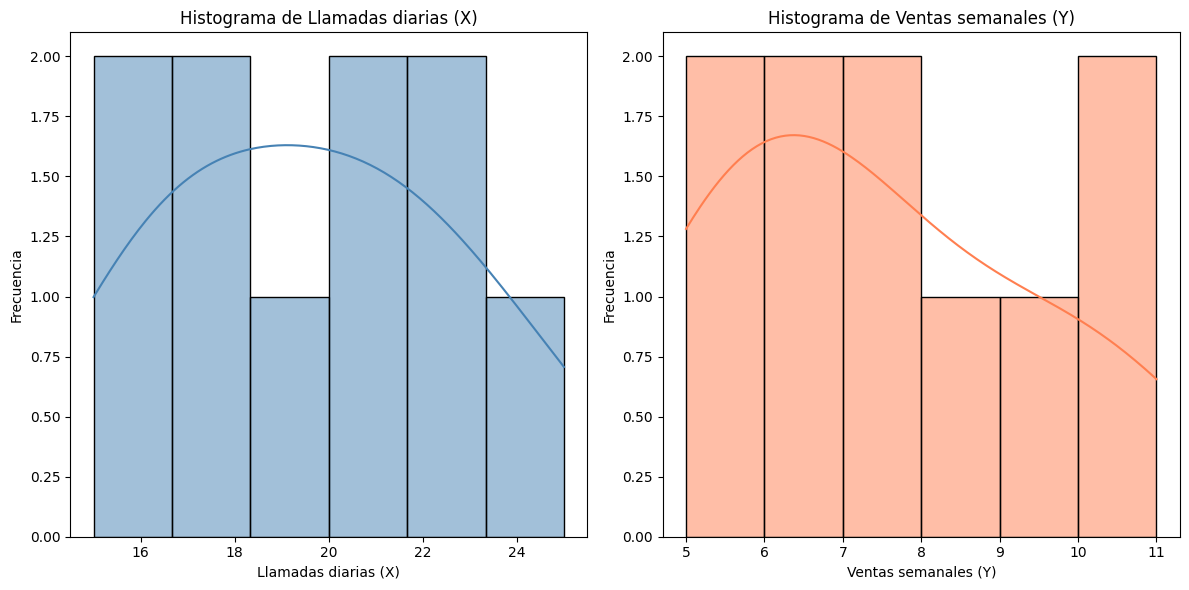

------------------------------
Generando Diagrama de Dispersión...


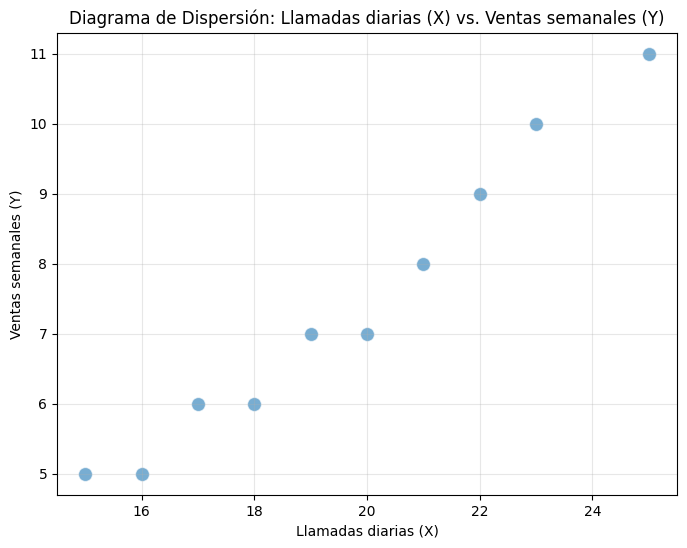

------------------------------
Realizando Pruebas de Normalidad...
Prueba Shapiro-Wilk para 'Llamadas diarias (X)': Estadístico=0.981, p-value=0.970
Prueba Shapiro-Wilk para 'Ventas semanales (Y)': Estadístico=0.930, p-value=0.447

Interpretación de las pruebas de normalidad:
✓ La variable 'Llamadas diarias (X)' parece seguir una distribución normal (p > 0.05).
✓ La variable 'Ventas semanales (Y)' parece seguir una distribución normal (p > 0.05).
------------------------------
Calculando Coeficientes de Correlación...
Coeficiente de correlación de Pearson: 0.9838
Coeficiente de correlación de Kendall: 0.9661
Coeficiente de correlación de Spearman: 0.9909
------------------------------
Determinando el coeficiente de correlación más apropiado...
✓ Ambas variables parecen distribuirse normalmente. El coeficiente de correlación de Pearson (0.9838) es el más apropiado.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORR

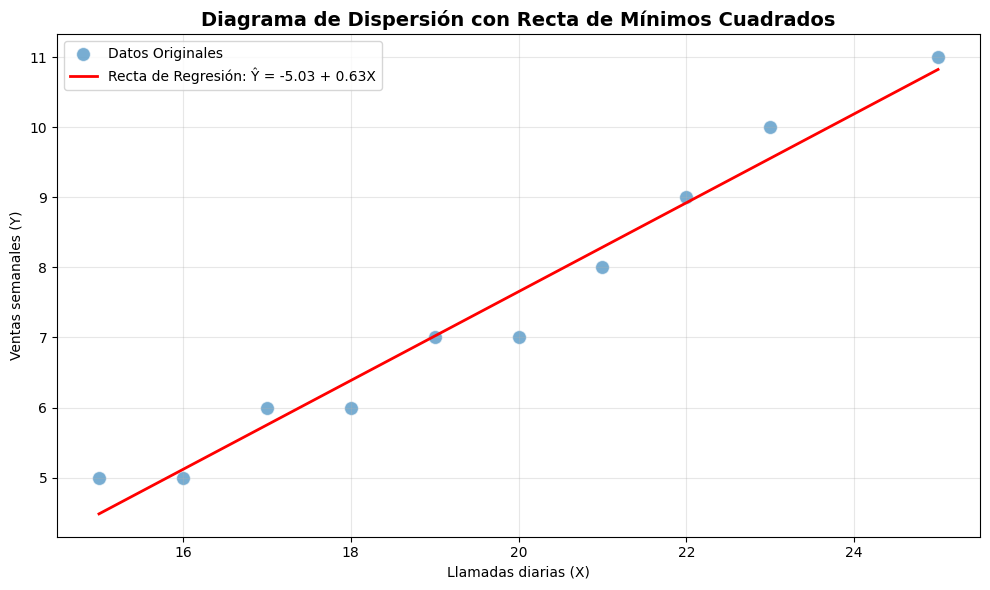


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 1.2359
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 0.3931

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 92.4000
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.0409

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (0.6342 - 0) / 0.0409
   t calculado = 15.5099

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 8
   Valor crítico (t_0.05,8) = 1.8595
   Valor p (una cola) = 0.0000

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
t calculado (15.5099) > t crítico (1.8595)
valor p (0.0000) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferente de

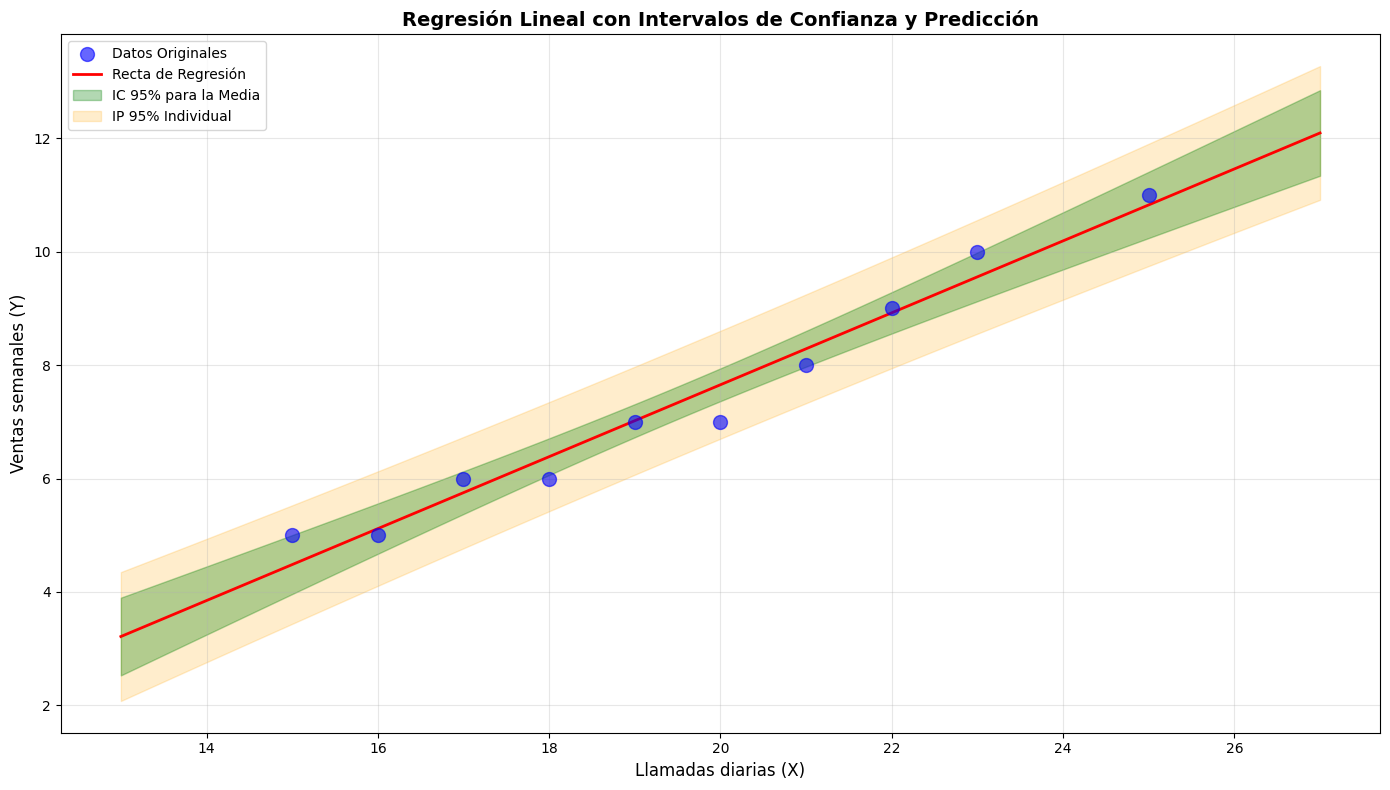

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Empleado           X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Empleado 1         15       5        4.48     0.52       1.32      
Empleado 2         20       7        7.65     -0.65      -1.66     
Empleado 3         18       6        6.39     -0.39      -0.98     
Empleado 4         25       11       10.82    0.18       0.45      
Empleado 5         22       9        8.92     0.08       0.20      
Empleado 6         17       6        5.75     0.25       0.63      
Empleado 7         19       7        7.02     -0.02      -0.05     
Empleado 8         23       10       9.56     0.44       1.13      
Empleado 9         21       8        8.29     -0.29      -0.73     
Empleado 10        16       5        5.12     -0.12      -0.30     

Estadísticas de los Residuos:
  Media de residuos: 0.0000 (debe ser ≈ 0)
  Desviación estánd

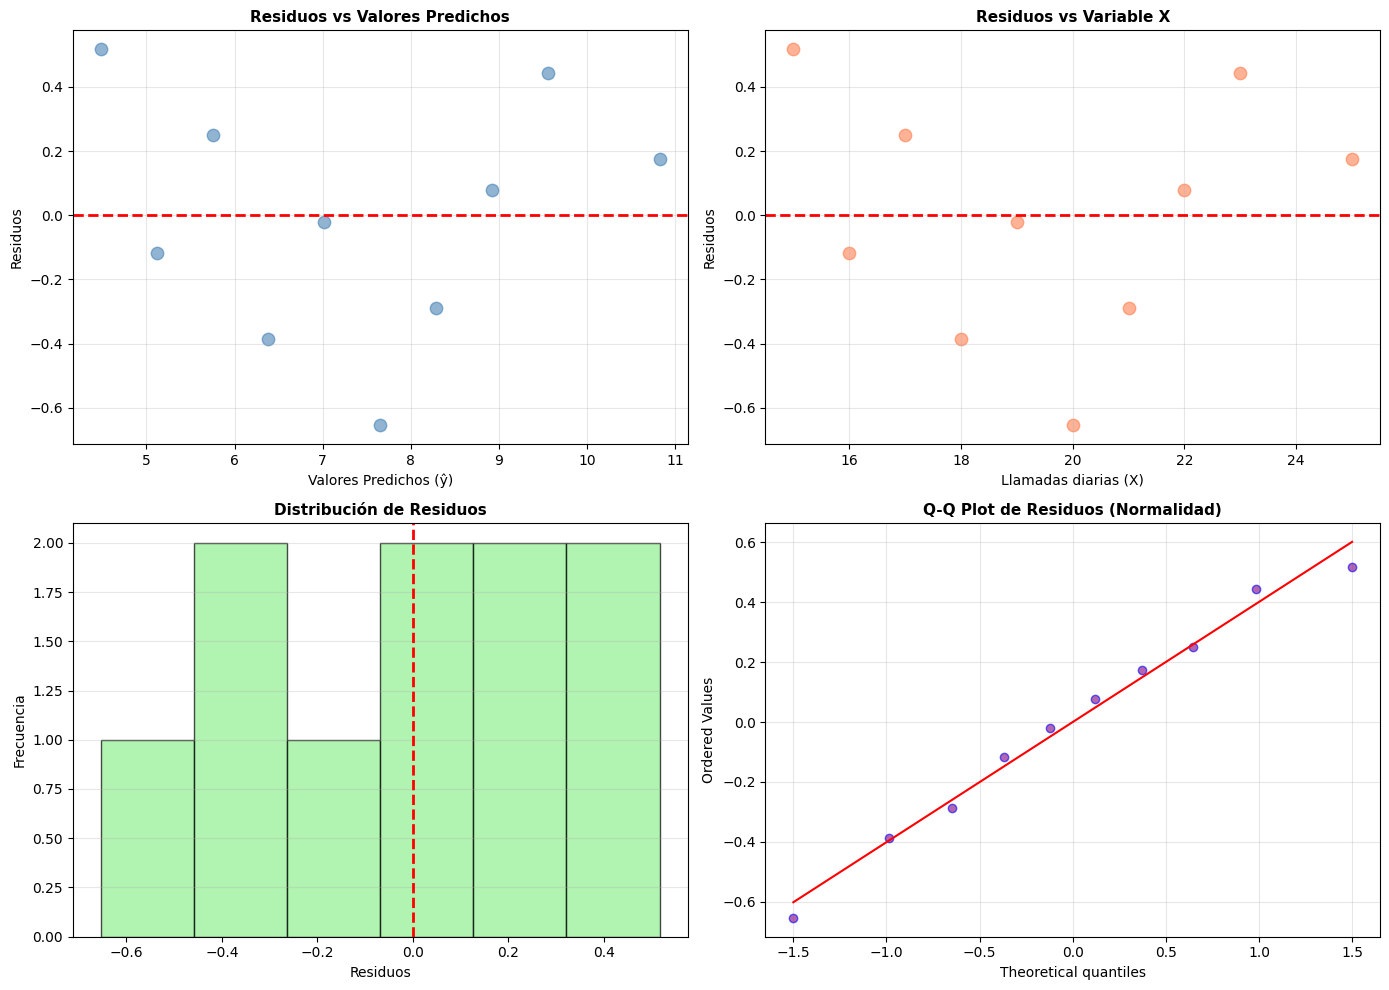


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9779
  Valor p = 0.9531
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Llamadas diarias (X): p-value = 0.9697
     ✓ Distribución normal
   • Ventas semanales (Y): p-value = 0.4473
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.9531
     ✓ Distribución normal

3. HOMOCEDASTICID

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (LLAMADAS DIARIAS Y VENTAS SEMANALES) ---
data = {
    'Empleado': [
        'Empleado 1', 'Empleado 2', 'Empleado 3', 'Empleado 4', 'Empleado 5',
        'Empleado 6', 'Empleado 7', 'Empleado 8', 'Empleado 9', 'Empleado 10'
    ],
    'Llamadas diarias (X)': [15, 20, 18, 25, 22, 17, 19, 23, 21, 16],
    'Ventas semanales (Y)': [5, 7, 6, 11, 9, 6, 7, 10, 8, 5]
}
df = pd.DataFrame(data)

variable_x = 'Llamadas diarias (X)'
variable_y = 'Ventas semanales (Y)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Llamadas Diarias vs Ventas Semanales")
print("=" * 70)
print(f"\nDatos cargados: {n} empleados")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerando Histogramas...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue', bins=6)
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral', bins=6)
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generando Diagrama de Dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Realizando Pruebas de Normalidad...")
shapiro_test_calls = shapiro(df[variable_x])
print(f"Prueba Shapiro-Wilk para '{variable_x}': Estadístico={shapiro_test_calls.statistic:.3f}, p-value={shapiro_test_calls.pvalue:.3f}")

shapiro_test_sold = shapiro(df[variable_y])
print(f"Prueba Shapiro-Wilk para '{variable_y}': Estadístico={shapiro_test_sold.statistic:.3f}, p-value={shapiro_test_sold.pvalue:.3f}")

print("\nInterpretación de las pruebas de normalidad:")
if shapiro_test_calls.pvalue > alfa:
    print(f"✓ La variable '{variable_x}' parece seguir una distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_x}' no parece seguir una distribución normal (p <= 0.05).")

if shapiro_test_sold.pvalue > alfa:
    print(f"✓ La variable '{variable_y}' parece seguir una distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_y}' no parece seguir una distribución normal (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculando Coeficientes de Correlación...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de correlación de Kendall: {kendall_corr:.4f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determinando el coeficiente de correlación más apropiado...")
if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
    print(f"✓ Ambas variables parecen distribuirse normalmente. El coeficiente de correlación de Pearson ({pearson_corr:.4f}) es el más apropiado.")
else:
     print(f"⚠ Al menos una variable no parece distribuirse normalmente. El coeficiente de correlación de Spearman ({spearman_corr:.4f}) o Kendall ({kendall_corr:.4f}) son medidas no paramétricas más apropiadas.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X (Llamadas diarias) y Y (Ventas semanales)
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β > 0 (La pendiente es significativamente mayor que cero)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
# Fórmula: s_y,x = sqrt(Σ(y - ŷ)² / (n - 2))
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
# Fórmula: s_b = s_y,x / sqrt(Σ(x - x̄)²)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
# Fórmula: t = (b - 0) / s_b
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de una cola, cola derecha)
t_critico_pendiente = t.ppf(1 - alfa, gl_pendiente)

# Valor p (prueba de una cola)
valor_p_pendiente = t.sf(t_calculado_pendiente, gl_pendiente)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t_{alfa},{gl_pendiente}) = {t_critico_pendiente:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de llamadas diarias tiene un efecto significativo POSITIVO sobre
    las ventas semanales.

    En términos prácticos: Por cada llamada diaria adicional, se espera un
    incremento de {b1:.4f} ventas semanales, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de llamadas
    diarias tenga un efecto significativo sobre las ventas semanales.
    """

print(f"t calculado ({t_calculado_pendiente:.4f}) {'>' if t_calculado_pendiente > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
# R² = 1 - (SSE / SS Total)
# donde SSE = Σ(y - ŷ)² y SS Total = Σ(y - ȳ)²

SSE = suma_diferencias_cuadradas  # Ya calculado anteriormente
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)
# También: r_cuadrado = r ** 2

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en las ventas              │")
print(f"│  semanales puede ser explicada por el número de llamadas        │")
print(f"│  diarias realizadas.                                            │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1  # 1 grado de libertad para regresión
MSE = SSE / (n - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X
valores_x_ejemplo = [15, 18, 20, 23, 25]  # Ejemplos de llamadas diarias

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de ventas semanales:\n")
print(f"{'X (Llamadas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 70)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_conf = t_critico_intervalo * s_yx * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando se realizan X llamadas diarias,")
print("la MEDIA de ventas semanales estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para ventas semanales INDIVIDUALES:\n")
print(f"{'X (Llamadas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 70)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred

    # Límites del intervalo
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando se realizan X llamadas diarias,")
print("una observación INDIVIDUAL de ventas semanales estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 2, df[variable_x].max() + 2, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Empleado':<18} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{row['Empleado']:<18} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins=6, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-value = {shapiro_test_calls.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_calls.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-value = {shapiro_test_sold.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_sold.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Empleados con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Empleado']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_calls.pvalue <= alfa or shapiro_test_sold.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if abs(r) < 0.5:
    razones_transformacion.append("- Correlación lineal débil (r < 0.5)")
    necesita_transformacion = True

if len(outliers) > n * 0.15:  # Más del 15% son outliers
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True

if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")

    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} ventas semanales
   • Por cada llamada diaria adicional, aumentan {b1:.4f} ventas semanales

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} ventas

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El número de llamadas diarias es un predictor SIGNIFICATIVO de las
   ventas semanales. El modelo explica {r_cuadrado*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Predecir ventas futuras basadas en llamadas planificadas
   • Establecer objetivos de llamadas para alcanzar metas de ventas
   • Evaluar el rendimiento de los empleados de ventas

   Recomendación: IMPLEMENTAR este modelo en la planificación de ventas.
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre llamadas diarias y ventas semanales,
   el modelo presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables explicativas
   • Realizar análisis adicionales antes de implementar decisiones
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

**EJERCICIO 4**

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: THE COTTON MILL - Análisis de Ventas

Datos cargados: 23 tiendas en 3 regiones
  - Región 1: 7 tiendas
  - Región 2: 7 tiendas
  - Región 3: 9 tiendas

Variable independiente (X): Tamaño de la tienda (en miles de pies cuadrados)
Variable dependiente (Y): Ventas (en millones de dólares)
Nivel de significancia (α): 0.05

(a) DIAGRAMA DE DISPERSIÓN


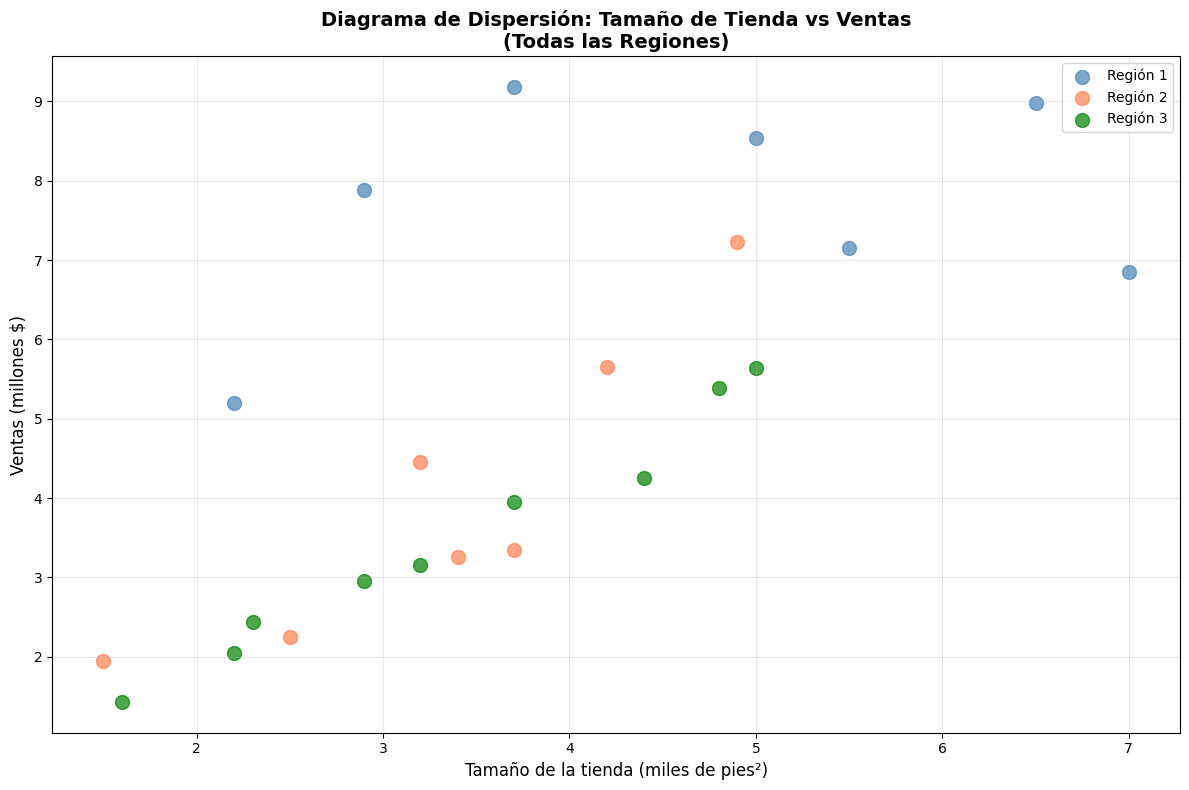


✓ Observación inicial:
  Inspeccionando visualmente el diagrama de dispersión...
  ✓ La relación parece ser POSITIVA
    A medida que aumenta el tamaño de la tienda, las ventas tienden a aumentar.

----------------------------------------------------------------------

(b) COEFICIENTE DE CORRELACIÓN Y DETERMINACIÓN

Coeficiente de Correlación de Pearson (r): 0.7138
Coeficiente de Determinación (R²): 0.5094

📊 INTERPRETACIÓN:

1. Correlación (r = 0.7138):
   • Fuerza: FUERTE
   • Dirección: POSITIVA
   • Existe una relación lineal fuerte positiva
     entre el tamaño de la tienda y las ventas.

2. Determinación (R² = 0.5094):
   • El 50.94% de la variabilidad en las VENTAS
     puede ser explicada por el TAMAÑO DE LA TIENDA.
   • El 49.06% restante se debe a otros factores no incluidos.

   ⚠ La relación es MODERADA: El tamaño explica parte importante de las ventas.

----------------------------------------------------------------------

(c) PRUEBA DE HIPÓTESIS: ¿EXISTE CORRELACIÓN POS

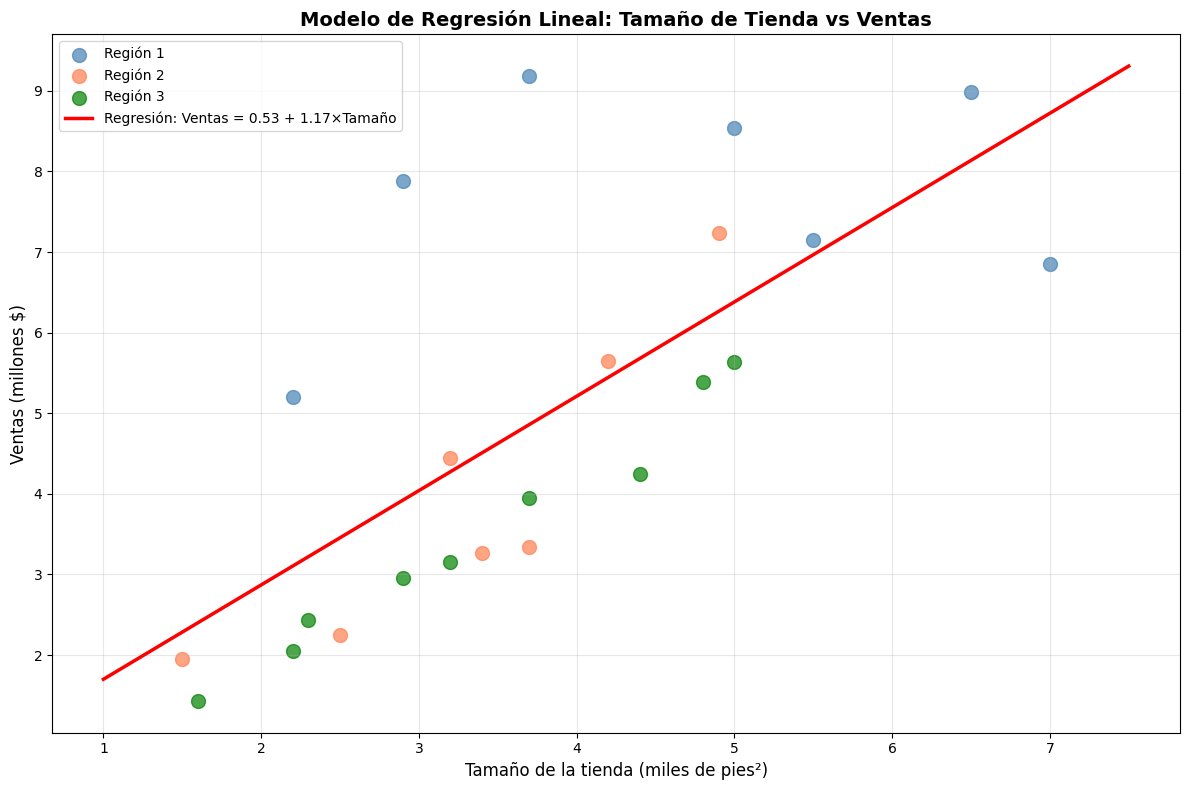


(d) INTERPRETACIÓN PARA LA TOMA DE DECISIONES DE APERTURA

📊 RESUMEN DE RESULTADOS CLAVE:
----------------------------------------------------------------------
  1. Correlación: r = 0.7138 (FUERTE POSITIVA)
  2. Determinación: R² = 0.5094 (50.94% de variabilidad explicada)
  3. Significancia estadística: ✓ SÍ existe una correlación POSITIVA SIGNIFICATIVA
  4. Ecuación predictiva: Ventas = 0.5291 + 1.1703 × Tamaño

💼 RECOMENDACIONES PARA DECISIONES DE APERTURA DE TIENDAS:

✅ RECOMENDACIÓN FUERTE: UTILIZAR EL TAMAÑO COMO CRITERIO PRINCIPAL

Justificación:
--------------
1. RELACIÓN COMPROBADA: Existe evidencia estadística sólida de que el tamaño
   de la tienda está positivamente relacionado con las ventas.

2. PODER PREDICTIVO ALTO: El modelo explica más del 50% de la variabilidad
   en las ventas basándose únicamente en el tamaño.

3. APLICACIONES PRÁCTICAS:
   • Proyección de ventas: Para una nueva tienda de X mil pies², se puede
     estimar las ventas esperadas usando la ecuación 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATOS DEL PROBLEMA (THE COTTON MILL) ---
# Región 1
region1_data = {
    'Tamaño de la tienda': [3.7, 5.0, 7.0, 6.5, 2.2, 5.5, 2.9],
    'Ventas': [9.18, 8.54, 6.85, 8.98, 5.20, 7.15, 7.88]
}

# Región 2
region2_data = {
    'Tamaño de la tienda': [4.2, 3.4, 2.5, 1.5, 3.7, 4.9, 3.2],
    'Ventas': [5.65, 3.26, 2.25, 1.95, 3.34, 7.23, 4.45]
}

# Región 3
region3_data = {
    'Tamaño de la tienda': [2.2, 1.6, 2.3, 2.9, 3.2, 3.7, 4.4, 4.8, 5.0],
    'Ventas': [2.05, 1.43, 2.44, 2.95, 3.16, 3.95, 4.25, 5.39, 5.64]
}

# Combinar todas las regiones
df_region1 = pd.DataFrame(region1_data)
df_region1['Región'] = 'Región 1'

df_region2 = pd.DataFrame(region2_data)
df_region2['Región'] = 'Región 2'

df_region3 = pd.DataFrame(region3_data)
df_region3['Región'] = 'Región 3'

# DataFrame completo
df = pd.concat([df_region1, df_region2, df_region3], ignore_index=True)

variable_x = 'Tamaño de la tienda'
variable_y = 'Ventas'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: THE COTTON MILL - Análisis de Ventas")
print("=" * 70)
print(f"\nDatos cargados: {n} tiendas en 3 regiones")
print(f"  - Región 1: {len(df_region1)} tiendas")
print(f"  - Región 2: {len(df_region2)} tiendas")
print(f"  - Región 3: {len(df_region3)} tiendas")
print(f"\nVariable independiente (X): {variable_x} (en miles de pies cuadrados)")
print(f"Variable dependiente (Y): {variable_y} (en millones de dólares)")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# PARTE (a): DIAGRAMA DE DISPERSIÓN
# =========================================================================
print("\n" + "=" * 70)
print("(a) DIAGRAMA DE DISPERSIÓN")
print("=" * 70)

plt.figure(figsize=(12, 8))

# Diagrama por región
colors = {'Región 1': 'steelblue', 'Región 2': 'coral', 'Región 3': 'green'}
for region in df['Región'].unique():
    region_data = df[df['Región'] == region]
    plt.scatter(region_data[variable_x], region_data[variable_y],
               label=region, s=100, alpha=0.7, color=colors[region])

plt.xlabel(f'{variable_x} (miles de pies²)', fontsize=12)
plt.ylabel(f'{variable_y} (millones $)', fontsize=12)
plt.title('Diagrama de Dispersión: Tamaño de Tienda vs Ventas\n(Todas las Regiones)',
         fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Observación inicial:")
print("  Inspeccionando visualmente el diagrama de dispersión...")

# Calcular correlación preliminar
correlacion_preliminar = df[variable_x].corr(df[variable_y])

if correlacion_preliminar > 0:
    print(f"  ✓ La relación parece ser POSITIVA")
    print(f"    A medida que aumenta el tamaño de la tienda, las ventas tienden a aumentar.")
else:
    print(f"  ⚠ La relación parece ser NEGATIVA")
    print(f"    A medida que aumenta el tamaño de la tienda, las ventas tienden a disminuir.")

print("\n" + "-" * 70)

# =========================================================================
# PARTE (b): COEFICIENTES DE CORRELACIÓN Y DETERMINACIÓN
# =========================================================================
print("\n" + "=" * 70)
print("(b) COEFICIENTE DE CORRELACIÓN Y DETERMINACIÓN")
print("=" * 70)

# Calcular coeficiente de correlación de Pearson
r = df[variable_x].corr(df[variable_y], method='pearson')
r_cuadrado = r ** 2

print(f"\nCoeficiente de Correlación de Pearson (r): {r:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado:.4f}")

print("\n📊 INTERPRETACIÓN:")
print(f"\n1. Correlación (r = {r:.4f}):")

if abs(r) >= 0.8:
    fuerza = "MUY FUERTE"
elif abs(r) >= 0.6:
    fuerza = "FUERTE"
elif abs(r) >= 0.4:
    fuerza = "MODERADA"
elif abs(r) >= 0.2:
    fuerza = "DÉBIL"
else:
    fuerza = "MUY DÉBIL"

direccion = "POSITIVA" if r > 0 else "NEGATIVA"

print(f"   • Fuerza: {fuerza}")
print(f"   • Dirección: {direccion}")
print(f"   • Existe una relación lineal {fuerza.lower()} {direccion.lower()}")
print(f"     entre el tamaño de la tienda y las ventas.")

print(f"\n2. Determinación (R² = {r_cuadrado:.4f}):")
print(f"   • El {r_cuadrado*100:.2f}% de la variabilidad en las VENTAS")
print(f"     puede ser explicada por el TAMAÑO DE LA TIENDA.")
print(f"   • El {(1-r_cuadrado)*100:.2f}% restante se debe a otros factores no incluidos.")

if r_cuadrado >= 0.7:
    print(f"\n   ✓ La relación es FUERTE: El tamaño explica la mayor parte de las ventas.")
elif r_cuadrado >= 0.4:
    print(f"\n   ⚠ La relación es MODERADA: El tamaño explica parte importante de las ventas.")
else:
    print(f"\n   ⚠ La relación es DÉBIL: Otros factores son más importantes que el tamaño.")

print("\n" + "-" * 70)

# =========================================================================
# PARTE (c): PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN
# =========================================================================
print("\n" + "=" * 70)
print("(c) PRUEBA DE HIPÓTESIS: ¿EXISTE CORRELACIÓN POSITIVA SIGNIFICATIVA?")
print("=" * 70)

# Hipótesis unilateral (cola derecha)
print("\nHipótesis a probar:")
print("  H₀: ρ ≤ 0 (No existe correlación positiva)")
print("  H₁: ρ > 0 (Existe correlación positiva significativa)")
print(f"\nNivel de significancia: α = {alfa}")

# Grados de libertad
gl = n - 2

# Estadístico t
t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)

# Valor p (prueba de una cola, derecha)
valor_p = t.sf(t_calculado, gl)

# Valor crítico
t_critico = t.ppf(1 - alfa, gl)

print(f"\nCálculos:")
print(f"  • Número de observaciones (n): {n}")
print(f"  • Grados de libertad (gl): {gl}")
print(f"  • Correlación observada (r): {r:.4f}")
print(f"  • Estadístico t calculado: {t_calculado:.4f}")
print(f"  • Valor crítico (t₀.₀₅,{gl}): {t_critico:.4f}")
print(f"  • Valor p (una cola): {valor_p:.6f}")

print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p < alfa:
    decision = "RECHAZAR H₀"
    conclusion = "✓ SÍ existe una correlación POSITIVA SIGNIFICATIVA"
    explicacion = f"""
    ✅ CONCLUSIÓN: Con un nivel de significancia de {alfa}, tenemos evidencia
    estadística suficiente para concluir que existe una correlación positiva
    significativa entre el tamaño de la tienda y las ventas.

    Esto significa que las tiendas más grandes tienden a tener mayores ventas,
    y esta relación NO es producto del azar.
    """
else:
    decision = "NO RECHAZAR H₀"
    conclusion = "✗ NO hay evidencia suficiente de correlación positiva significativa"
    explicacion = f"""
    ⚠ CONCLUSIÓN: Con un nivel de significancia de {alfa}, NO tenemos evidencia
    estadística suficiente para concluir que existe una correlación positiva
    significativa entre el tamaño de la tienda y las ventas.

    La relación observada podría ser producto del azar o de la muestra particular.
    """

print(f"\n• Comparación: t_calculado ({t_calculado:.4f}) {'>' if t_calculado > t_critico else '≤'} t_crítico ({t_critico:.4f})")
print(f"• Comparación: valor p ({valor_p:.6f}) {'<' if valor_p < alfa else '≥'} α ({alfa})")
print(f"\n🎯 DECISIÓN: {decision}")
print(f"📌 {conclusion}")
print(explicacion)

print("=" * 70)

# =========================================================================
# --- MODELO DE REGRESIÓN LINEAL ---
# =========================================================================
print("\n" + "=" * 70)
print("MODELO DE REGRESIÓN LINEAL")
print("=" * 70)

# Estadísticos
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

# Coeficientes
b1 = r * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print(f"\nCoeficientes de la Ecuación de Regresión:")
print(f"  • Intersección (b₀): {b0:.4f}")
print(f"  • Pendiente (b₁): {b1:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│                                                      │")
print(f"│  Ventas = {b0:.4f} + {b1:.4f} × Tamaño         │")
print(f"│                                                      │")
print("└─────────────────────────────────────────────────────┘")

print(f"\nInterpretación de los coeficientes:")
print(f"  • b₀ = {b0:.4f}: Ventas base cuando el tamaño es 0")
print(f"    (Intercepto del modelo)")
print(f"  • b₁ = {b1:.4f}: Por cada incremento de 1000 pies² en el tamaño,")
print(f"    las ventas aumentan en ${b1:.4f} millones (${b1*1000:.0f},000)")

# Visualización
plt.figure(figsize=(12, 8))

# Puntos por región
for region in df['Región'].unique():
    region_data = df[df['Región'] == region]
    plt.scatter(region_data[variable_x], region_data[variable_y],
               label=region, s=100, alpha=0.7, color=colors[region])

# Línea de regresión
x_line = np.linspace(df[variable_x].min() - 0.5, df[variable_x].max() + 0.5, 100)
y_line = b0 + b1 * x_line
plt.plot(x_line, y_line, 'r-', linewidth=2.5,
        label=f'Regresión: Ventas = {b0:.2f} + {b1:.2f}×Tamaño', zorder=5)

plt.xlabel(f'{variable_x} (miles de pies²)', fontsize=12)
plt.ylabel(f'{variable_y} (millones $)', fontsize=12)
plt.title('Modelo de Regresión Lineal: Tamaño de Tienda vs Ventas',
         fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# PARTE (d): INTERPRETACIÓN PARA LA TOMA DE DECISIONES
# =========================================================================
print("\n" + "=" * 70)
print("(d) INTERPRETACIÓN PARA LA TOMA DE DECISIONES DE APERTURA")
print("=" * 70)

print("\n📊 RESUMEN DE RESULTADOS CLAVE:")
print("-" * 70)
print(f"  1. Correlación: r = {r:.4f} ({fuerza} {direccion})")
print(f"  2. Determinación: R² = {r_cuadrado:.4f} ({r_cuadrado*100:.2f}% de variabilidad explicada)")
print(f"  3. Significancia estadística: {conclusion}")
print(f"  4. Ecuación predictiva: Ventas = {b0:.4f} + {b1:.4f} × Tamaño")

print("\n" + "=" * 70)
print("💼 RECOMENDACIONES PARA DECISIONES DE APERTURA DE TIENDAS:")
print("=" * 70)

if valor_p < alfa and r_cuadrado > 0.5:
    print("""
✅ RECOMENDACIÓN FUERTE: UTILIZAR EL TAMAÑO COMO CRITERIO PRINCIPAL

Justificación:
--------------
1. RELACIÓN COMPROBADA: Existe evidencia estadística sólida de que el tamaño
   de la tienda está positivamente relacionado con las ventas.

2. PODER PREDICTIVO ALTO: El modelo explica más del 50% de la variabilidad
   en las ventas basándose únicamente en el tamaño.

3. APLICACIONES PRÁCTICAS:
   • Proyección de ventas: Para una nueva tienda de X mil pies², se puede
     estimar las ventas esperadas usando la ecuación de regresión.

   • Optimización de inversión: Evaluar si el costo adicional de una tienda
     más grande se justifica con el incremento esperado en ventas.

   • Análisis de viabilidad: Determinar el tamaño mínimo necesario para
     alcanzar un objetivo de ventas específico.

4. EJEMPLOS DE USO:
""")

    # Ejemplos de predicción
    tamanos_ejemplo = [2.5, 4.0, 5.5]
    print("\n   Predicciones de ventas según tamaño:")
    print(f"   {'Tamaño (miles pies²)':<25} {'Ventas Proyectadas':<20}")
    print("   " + "-" * 50)
    for tam in tamanos_ejemplo:
        ventas_pred = b0 + b1 * tam
        print(f"   {tam:<25.1f} ${ventas_pred:.2f} millones")

    print("""
5. CONSIDERACIONES ADICIONALES:
   • Analizar el tamaño óptimo considerando costos de renta/construcción
   • Evaluar factores de ubicación específicos de cada región
   • Considerar la competencia local y demografía
   • El tamaño es importante, pero no el único factor (28% restante)

6. ESTRATEGIA SUGERIDA:
   ✓ Priorizar ubicaciones que permitan tiendas de mayor tamaño
   ✓ Establecer un tamaño mínimo viable basado en objetivos de ventas
   ✓ Usar el modelo para análisis costo-beneficio de expansiones
   ✓ Monitorear continuamente y actualizar el modelo con nuevos datos
""")

elif valor_p < alfa and r_cuadrado > 0.25:
    print(f"""
⚠ RECOMENDACIÓN MODERADA: CONSIDERAR EL TAMAÑO COMO UN FACTOR IMPORTANTE

Justificación:
--------------
1. RELACIÓN SIGNIFICATIVA: Hay evidencia estadística de que el tamaño afecta
   las ventas, aunque la relación es moderada.

2. PODER PREDICTIVO LIMITADO: El modelo explica {r_cuadrado*100:.1f}% de la variabilidad,
   lo que indica que otros factores también son importantes.

3. APLICACIÓN PRÁCTICA:
   • Usar el tamaño como UNO de varios criterios de decisión
   • Combinar con análisis de ubicación, demografía y competencia
   • No basar decisiones únicamente en el tamaño

4. RECOMENDACIÓN:
   ✓ Incorporar el tamaño en un modelo de decisión multifactorial
   ⚠ No usar el tamaño como único predictor
   ✓ Investigar qué otros factores explican el {(1-r_cuadrado)*100:.1f}% restante
   ✓ Considerar análisis por región (pueden variar los patrones)
""")

else:
    print("""
❌ PRECAUCIÓN: EL TAMAÑO NO DEBE SER EL CRITERIO PRINCIPAL

Justificación:
--------------
1. RELACIÓN NO SIGNIFICATIVA O MUY DÉBIL: No hay evidencia suficiente de que
   el tamaño sea un predictor confiable de las ventas.

2. BAJO PODER PREDICTIVO: El modelo explica una porción muy pequeña de la
   variabilidad en ventas.

3. IMPLICACIONES:
   • Otros factores son más importantes que el tamaño
   • Las diferencias en ventas se deben principalmente a otras variables

4. RECOMENDACIÓN:
   ⚠ NO basar decisiones de apertura en el tamaño de la tienda
   ✓ Investigar otros factores clave (ubicación, tráfico, demografía, competencia)
   ✓ Realizar análisis más profundos antes de invertir
   ✓ Considerar estudios de mercado específicos para cada ubicación propuesta

5. ACCIONES SUGERIDAS:
   • Recolectar datos sobre otros factores potencialmente relevantes
   • Realizar análisis multivariado
   • Estudios de caso de tiendas exitosas vs no exitosas
   • Consultar con expertos locales de cada región
""")

print("\n" + "=" * 70)
print("📍 ANÁLISIS POR REGIÓN:")
print("=" * 70)

# Análisis por región
for region_name in ['Región 1', 'Región 2', 'Región 3']:
    region_df = df[df['Región'] == region_name]
    r_region = region_df[variable_x].corr(region_df[variable_y])

    print(f"\n{region_name}:")
    print(f"  • Número de tiendas: {len(region_df)}")
    print(f"  • Tamaño promedio: {region_df[variable_x].mean():.2f} miles de pies²")
    print(f"  • Ventas promedio: ${region_df[variable_y].mean():.2f} millones")
    print(f"  • Correlación regional: {r_region:.4f}")

    if abs(r_region) > abs(r):
        print(f"    ✓ Correlación más fuerte que el promedio general")
    else:
        print(f"    ⚠ Correlación más débil que el promedio general")

print("\n" + "=" * 70)
print("✓ ANÁLISIS COMPLETADO")
print("=" * 70)
print("\n💡 Use estos resultados para informar decisiones estratégicas sobre")
print("   apertura y dimensionamiento de nuevas tiendas The Cotton Mill.")
print("=" * 70)

**EJERCICIO 5**

ANÁLISIS DE REGRESIÓN LINEAL CON TRANSFORMACIÓN LOGARÍTMICA
Problema: Crecimiento de Población Bacteriana

Datos cargados: 7 observaciones
Variable independiente (X): Tiempo (h)
Variable dependiente (Y): Población
Nivel de significancia (α): 0.05

PARTE (a): GRÁFICO DE LA RELACIÓN TIEMPO-POBLACIÓN


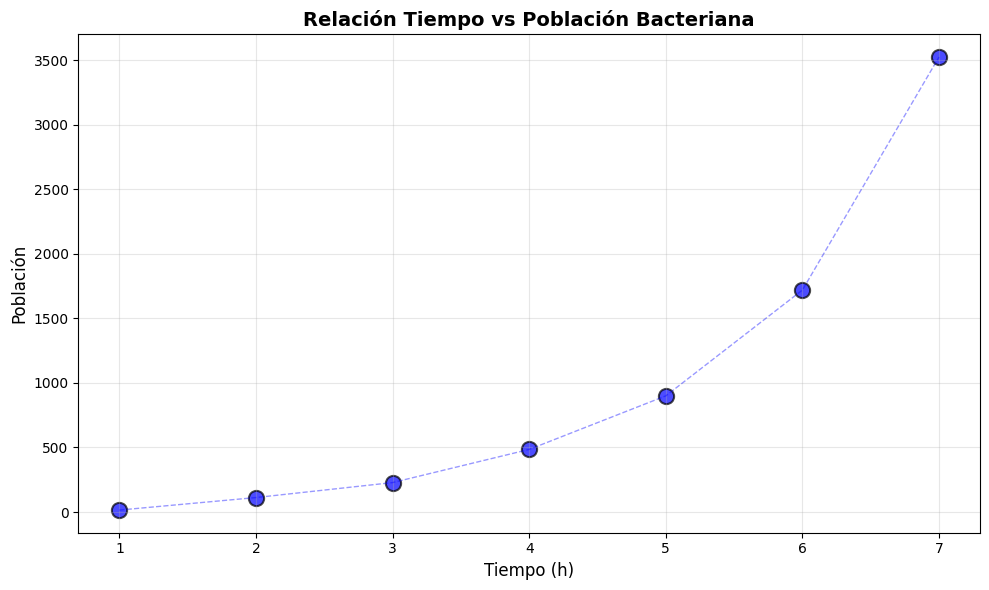


¿Es la relación lineal?
Observación visual: La relación muestra un crecimiento ACELERADO (exponencial).
La población no crece linealmente, sino que se acelera con el tiempo.
✗ NO es apropiado un modelo de regresión lineal simple para estos datos.

PARTE (b): REGRESIÓN LINEAL ORIGINAL (SIN TRANSFORMACIÓN)

Ecuación de regresión original:
Ŷ = -1062.1429 + 515.0357 × X

Coeficiente de correlación (r): 0.8829
Coeficiente de determinación (R²): 0.7794
Error estándar de estimación (s_y,x): 648.3357

--- ANÁLISIS DE RESIDUOS DEL MODELO ORIGINAL ---

Tabla de Residuos:
Tiempo     Población    Predicho     Residuo     
--------------------------------------------------
1.0        15.0         -547.11      562.11      
2.0        112.0        -32.07       144.07      
3.0        228.0        482.96       -254.96     
4.0        485.0        998.00       -513.00     
5.0        900.0        1513.04      -613.04     
6.0        1720.0       2028.07      -308.07     
7.0        3526.0       2543.1

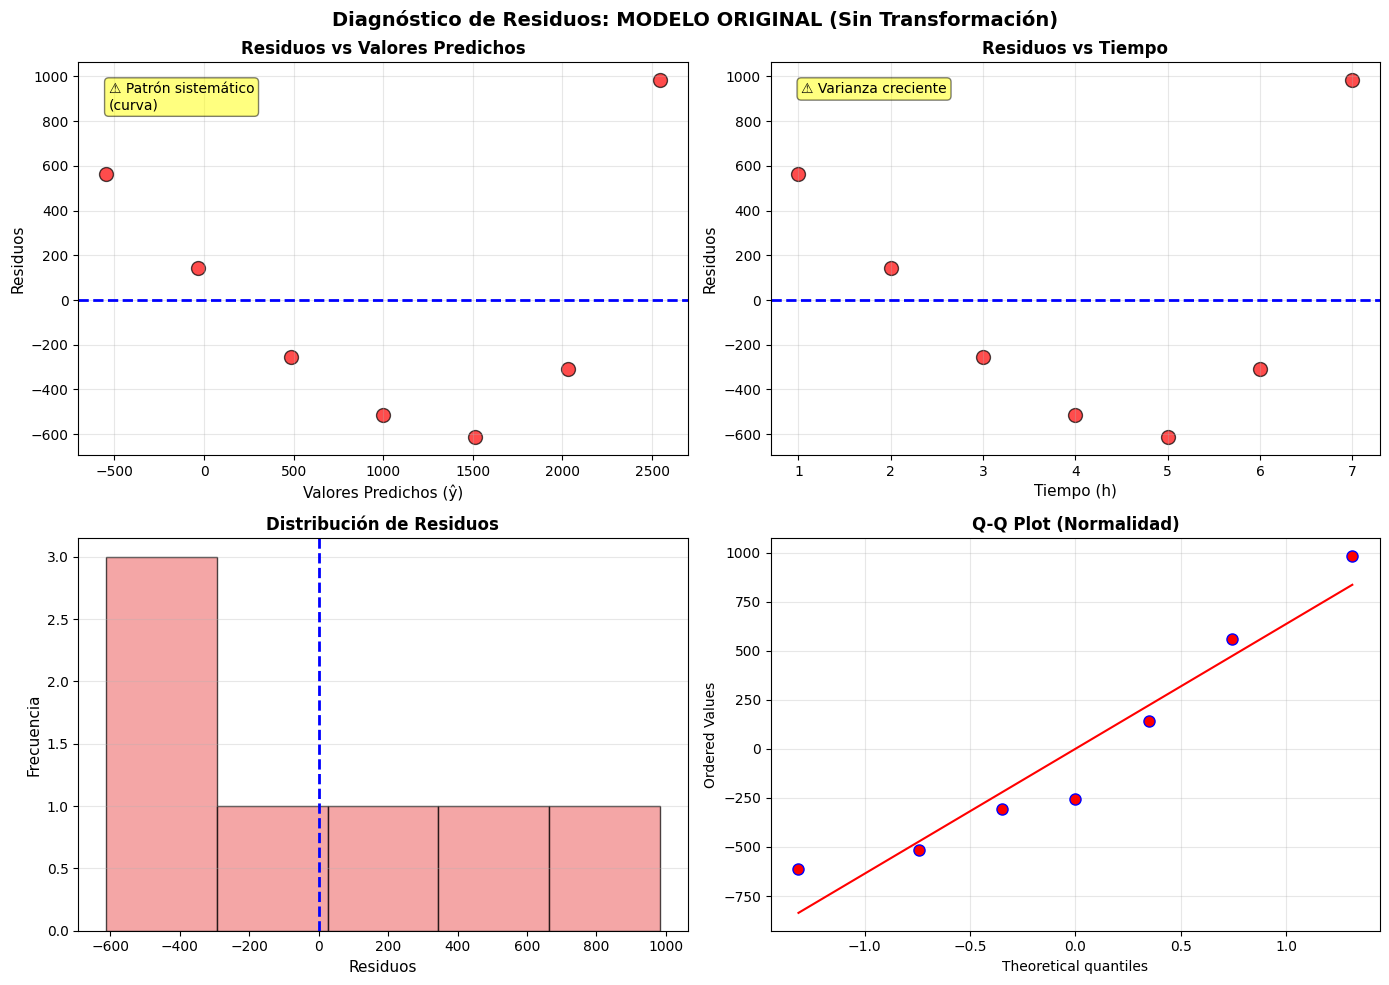


Prueba de Normalidad de Residuos (Shapiro-Wilk):
Estadístico W = 0.9114, p-valor = 0.4058
✓ Residuos normales (α = 0.05)

--- PROBLEMAS IDENTIFICADOS EN EL MODELO ORIGINAL ---
✗ PATRÓN NO ALEATORIO en residuos vs predichos (curvatura)
✗ HETEROCEDASTICIDAD (varianza creciente)
✗ Los residuos muestran estructura sistemática

⚠ CONCLUSIÓN: El modelo lineal simple NO es apropiado.
   Se requiere transformación de datos.

PARTE (c): TRANSFORMACIÓN LOGARÍTMICA

Transformación aplicada: Y' = ln(Y)

Datos transformados:
Tiempo (h)   Población    ln(Población)  
----------------------------------------
1.0          15.0         2.7081         
2.0          112.0        4.7185         
3.0          228.0        5.4293         
4.0          485.0        6.1841         
5.0          900.0        6.8024         
6.0          1720.0       7.4501         
7.0          3526.0       8.1679         


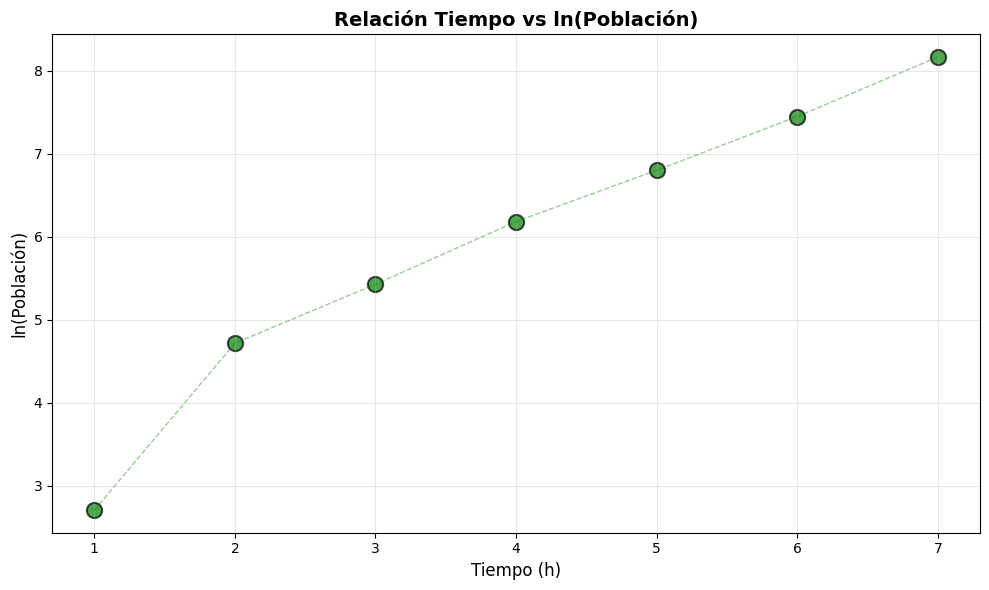


¿Es lineal la relación después de la transformación?
✓ SÍ, la relación ahora muestra un patrón LINEAL apropiado.

--- REGRESIÓN CON DATOS TRANSFORMADOS ---

Ecuación de regresión transformada:
ln(Ŷ) = 2.6064 + 0.8291 × X

Coeficiente de correlación (r): 0.9751
Coeficiente de determinación (R²): 0.9509
Error estándar de estimación (s_y,x): 0.4460

--- ANÁLISIS DE RESIDUOS DEL MODELO TRANSFORMADO ---

Tabla de Residuos:
Tiempo     ln(Pob)      Predicho     Residuo     
--------------------------------------------------
1.0        2.7081       3.4355       -0.7275     
2.0        4.7185       4.2646       0.4539      
3.0        5.4293       5.0938       0.3356      
4.0        6.1841       5.9229       0.2612      
5.0        6.8024       6.7521       0.0503      
6.0        7.4501       7.5812       -0.1311     
7.0        8.1679       8.4103       -0.2424     


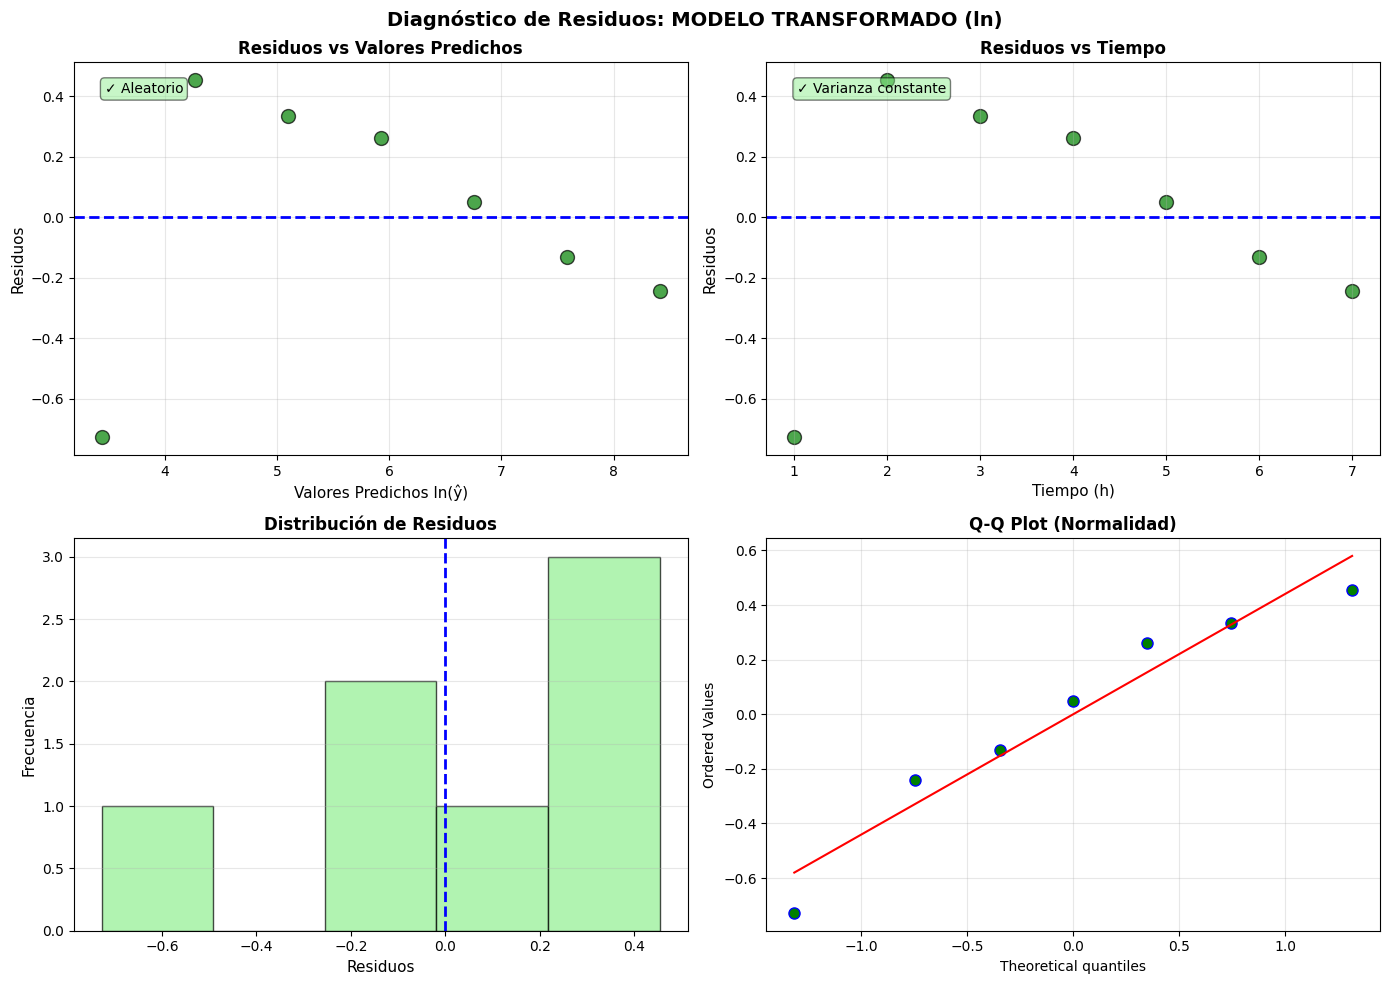


Prueba de Normalidad de Residuos (Shapiro-Wilk):
Estadístico W = 0.9395, p-valor = 0.6338
✓ Residuos normales (α = 0.05)

PARTE (d): COMPARACIÓN DE AMBOS MODELOS

┌────────────────────────────────────────────────────────────────────┐
│                    TABLA COMPARATIVA                               │
├────────────────────────────────────────────────────────────────────┤
│ Criterio                       │ Original        │ Transformado    │
├────────────────────────────────────────────────────────────────────┤
│ Ecuación                       │ Y = a + bX      │ ln(Y) = a + bX  │
│ Correlación (r)                │ 0.8829          │ 0.9751          │
│ R²                             │ 0.7794          │ 0.9509          │
│ Error estándar                 │ 648.34          │ 0.4460          │
│ Normalidad residuos (p)        │ 0.4058          │ 0.6338          │
└────────────────────────────────────────────────────────────────────┘

--- EVALUACIÓN DE SUPUESTOS ---

1. NORMALIDAD DE RESI

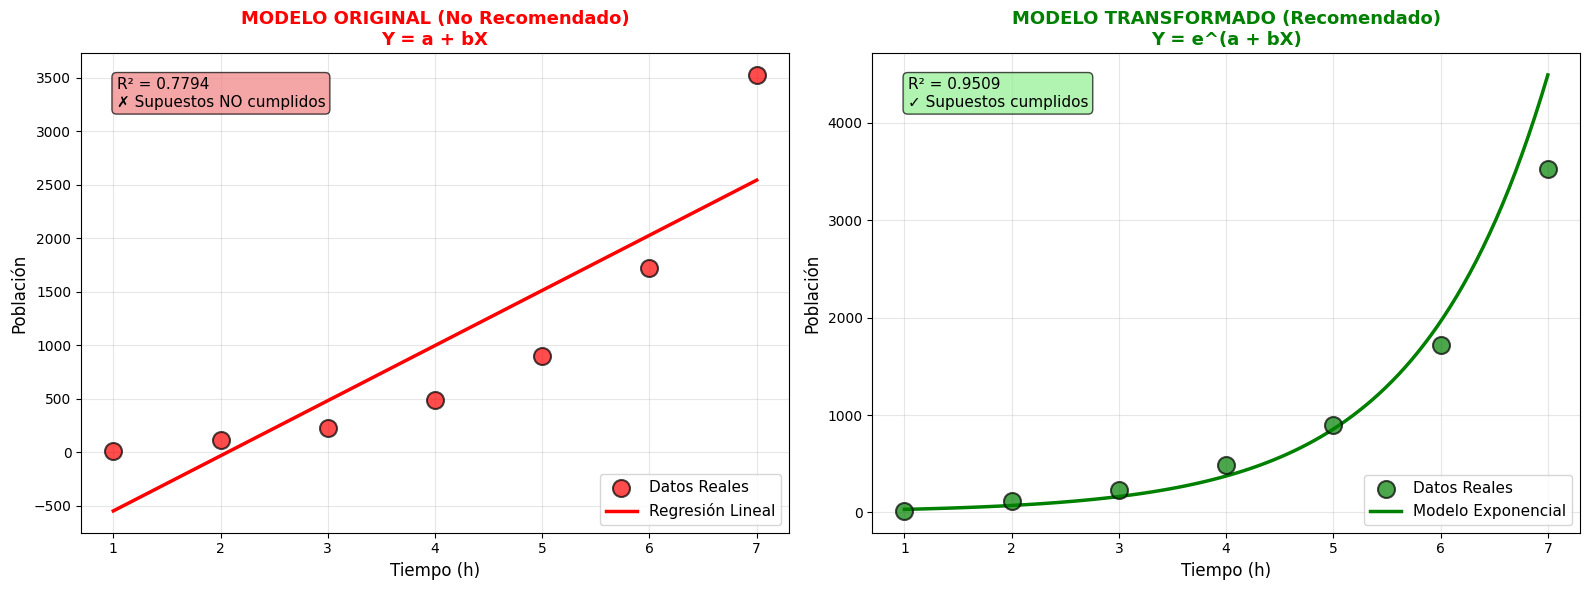


✓ ANÁLISIS COMPLETADO EXITOSAMENTE


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (CRECIMIENTO BACTERIANO) ---
data = {
    'Tiempo (h)': [1, 2, 3, 4, 5, 6, 7],
    'Población': [15, 112, 228, 485, 900, 1720, 3526]
}
df = pd.DataFrame(data)

variable_x = 'Tiempo (h)'
variable_y = 'Población'
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 80)
print("ANÁLISIS DE REGRESIÓN LINEAL CON TRANSFORMACIÓN LOGARÍTMICA")
print("Problema: Crecimiento de Población Bacteriana")
print("=" * 80)
print(f"\nDatos cargados: {len(df)} observaciones")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 80)

# =========================================================================
# --- PARTE (a): GRÁFICO DE LA RELACIÓN TIEMPO-POBLACIÓN ---
# =========================================================================
print("\n" + "=" * 80)
print("PARTE (a): GRÁFICO DE LA RELACIÓN TIEMPO-POBLACIÓN")
print("=" * 80)

plt.figure(figsize=(10, 6))
plt.scatter(df[variable_x], df[variable_y], s=120, alpha=0.7, color='blue', edgecolors='black', linewidth=1.5)
plt.plot(df[variable_x], df[variable_y], 'b--', alpha=0.4, linewidth=1)
plt.title('Relación Tiempo vs Población Bacteriana', fontsize=14, fontweight='bold')
plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n¿Es la relación lineal?")
print("Observación visual: La relación muestra un crecimiento ACELERADO (exponencial).")
print("La población no crece linealmente, sino que se acelera con el tiempo.")
print("✗ NO es apropiado un modelo de regresión lineal simple para estos datos.")
print("=" * 80)

# =========================================================================
# --- PARTE (b): REGRESIÓN ORIGINAL Y ANÁLISIS DE RESIDUOS ---
# =========================================================================
print("\n" + "=" * 80)
print("PARTE (b): REGRESIÓN LINEAL ORIGINAL (SIN TRANSFORMACIÓN)")
print("=" * 80)

# Calcular estadísticos básicos
n = len(df)
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

# Coeficiente de correlación
r_original = df[variable_x].corr(df[variable_y], method='pearson')

# Pendiente e intersección
b1_original = r_original * (std_y / std_x)
b0_original = mean_y - b1_original * mean_x

print(f"\nEcuación de regresión original:")
print(f"Ŷ = {b0_original:.4f} + {b1_original:.4f} × X")
print(f"\nCoeficiente de correlación (r): {r_original:.4f}")
print(f"Coeficiente de determinación (R²): {r_original**2:.4f}")

# Valores predichos y residuos
df['y_pred_original'] = b0_original + b1_original * df[variable_x]
df['residuos_original'] = df[variable_y] - df['y_pred_original']

# Calcular error estándar
SSE_original = ((df[variable_y] - df['y_pred_original']) ** 2).sum()
s_yx_original = np.sqrt(SSE_original / (n - 2))

print(f"Error estándar de estimación (s_y,x): {s_yx_original:.4f}")

# Análisis de residuos
print("\n--- ANÁLISIS DE RESIDUOS DEL MODELO ORIGINAL ---")
print("\nTabla de Residuos:")
print(f"{'Tiempo':<10} {'Población':<12} {'Predicho':<12} {'Residuo':<12}")
print("-" * 50)
for idx, row in df.iterrows():
    print(f"{row[variable_x]:<10} {row[variable_y]:<12} {row['y_pred_original']:<12.2f} {row['residuos_original']:<12.2f}")

# Gráficos de residuos del modelo original
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Diagnóstico de Residuos: MODELO ORIGINAL (Sin Transformación)', fontsize=14, fontweight='bold')

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_pred_original'], df['residuos_original'], s=100, alpha=0.7, color='red', edgecolors='black')
axes[0, 0].axhline(y=0, color='blue', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=11)
axes[0, 0].set_ylabel('Residuos', fontsize=11)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(0.05, 0.95, '⚠ Patrón sistemático\n(curva)', transform=axes[0, 0].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# 2. Residuos vs Tiempo
axes[0, 1].scatter(df[variable_x], df['residuos_original'], s=100, alpha=0.7, color='red', edgecolors='black')
axes[0, 1].axhline(y=0, color='blue', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=11)
axes[0, 1].set_ylabel('Residuos', fontsize=11)
axes[0, 1].set_title('Residuos vs Tiempo', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].text(0.05, 0.95, '⚠ Varianza creciente', transform=axes[0, 1].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos_original'], bins=5, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1, 0].axvline(x=0, color='blue', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuos', fontsize=11)
axes[1, 0].set_ylabel('Frecuencia', fontsize=11)
axes[1, 0].set_title('Distribución de Residuos', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot
stats.probplot(df['residuos_original'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normalidad)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('red')
axes[1, 1].get_lines()[0].set_markersize(8)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos originales
shapiro_original = shapiro(df['residuos_original'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"Estadístico W = {shapiro_original.statistic:.4f}, p-valor = {shapiro_original.pvalue:.4f}")
print(f"{'✓ Residuos normales' if shapiro_original.pvalue > alfa else '✗ Residuos NO normales'} (α = {alfa})")

print("\n--- PROBLEMAS IDENTIFICADOS EN EL MODELO ORIGINAL ---")
print("✗ PATRÓN NO ALEATORIO en residuos vs predichos (curvatura)")
print("✗ HETEROCEDASTICIDAD (varianza creciente)")
print("✗ Los residuos muestran estructura sistemática")
print("\n⚠ CONCLUSIÓN: El modelo lineal simple NO es apropiado.")
print("   Se requiere transformación de datos.")
print("=" * 80)

# =========================================================================
# --- PARTE (c): TRANSFORMACIÓN LOGARÍTMICA ---
# =========================================================================
print("\n" + "=" * 80)
print("PARTE (c): TRANSFORMACIÓN LOGARÍTMICA")
print("=" * 80)

# Aplicar transformación logarítmica (log natural)
df['log_Poblacion'] = np.log(df[variable_y])
variable_y_log = 'log_Poblacion'

print(f"\nTransformación aplicada: Y' = ln(Y)")
print("\nDatos transformados:")
print(f"{'Tiempo (h)':<12} {'Población':<12} {'ln(Población)':<15}")
print("-" * 40)
for idx, row in df.iterrows():
    print(f"{row[variable_x]:<12} {row[variable_y]:<12} {row[variable_y_log]:<15.4f}")

# Gráfico de la relación transformada
plt.figure(figsize=(10, 6))
plt.scatter(df[variable_x], df[variable_y_log], s=120, alpha=0.7, color='green', edgecolors='black', linewidth=1.5)
plt.plot(df[variable_x], df[variable_y_log], 'g--', alpha=0.4, linewidth=1)
plt.title('Relación Tiempo vs ln(Población)', fontsize=14, fontweight='bold')
plt.xlabel(variable_x, fontsize=12)
plt.ylabel('ln(Población)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n¿Es lineal la relación después de la transformación?")
print("✓ SÍ, la relación ahora muestra un patrón LINEAL apropiado.")

# Calcular regresión con datos transformados
mean_y_log = df[variable_y_log].mean()
std_y_log = df[variable_y_log].std(ddof=1)
r_log = df[variable_x].corr(df[variable_y_log], method='pearson')

b1_log = r_log * (std_y_log / std_x)
b0_log = mean_y_log - b1_log * mean_x

print(f"\n--- REGRESIÓN CON DATOS TRANSFORMADOS ---")
print(f"\nEcuación de regresión transformada:")
print(f"ln(Ŷ) = {b0_log:.4f} + {b1_log:.4f} × X")
print(f"\nCoeficiente de correlación (r): {r_log:.4f}")
print(f"Coeficiente de determinación (R²): {r_log**2:.4f}")

# Valores predichos y residuos del modelo transformado
df['log_y_pred'] = b0_log + b1_log * df[variable_x]
df['residuos_log'] = df[variable_y_log] - df['log_y_pred']

# Calcular error estándar del modelo transformado
SSE_log = ((df[variable_y_log] - df['log_y_pred']) ** 2).sum()
s_yx_log = np.sqrt(SSE_log / (n - 2))

print(f"Error estándar de estimación (s_y,x): {s_yx_log:.4f}")

# Análisis de residuos del modelo transformado
print("\n--- ANÁLISIS DE RESIDUOS DEL MODELO TRANSFORMADO ---")
print("\nTabla de Residuos:")
print(f"{'Tiempo':<10} {'ln(Pob)':<12} {'Predicho':<12} {'Residuo':<12}")
print("-" * 50)
for idx, row in df.iterrows():
    print(f"{row[variable_x]:<10} {row[variable_y_log]:<12.4f} {row['log_y_pred']:<12.4f} {row['residuos_log']:<12.4f}")

# Gráficos de residuos del modelo transformado
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Diagnóstico de Residuos: MODELO TRANSFORMADO (ln)', fontsize=14, fontweight='bold')

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['log_y_pred'], df['residuos_log'], s=100, alpha=0.7, color='green', edgecolors='black')
axes[0, 0].axhline(y=0, color='blue', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos ln(ŷ)', fontsize=11)
axes[0, 0].set_ylabel('Residuos', fontsize=11)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(0.05, 0.95, '✓ Aleatorio', transform=axes[0, 0].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# 2. Residuos vs Tiempo
axes[0, 1].scatter(df[variable_x], df['residuos_log'], s=100, alpha=0.7, color='green', edgecolors='black')
axes[0, 1].axhline(y=0, color='blue', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=11)
axes[0, 1].set_ylabel('Residuos', fontsize=11)
axes[0, 1].set_title('Residuos vs Tiempo', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].text(0.05, 0.95, '✓ Varianza constante', transform=axes[0, 1].transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos_log'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].axvline(x=0, color='blue', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuos', fontsize=11)
axes[1, 0].set_ylabel('Frecuencia', fontsize=11)
axes[1, 0].set_title('Distribución de Residuos', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot
stats.probplot(df['residuos_log'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normalidad)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('green')
axes[1, 1].get_lines()[0].set_markersize(8)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos transformados
shapiro_log = shapiro(df['residuos_log'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"Estadístico W = {shapiro_log.statistic:.4f}, p-valor = {shapiro_log.pvalue:.4f}")
print(f"{'✓ Residuos normales' if shapiro_log.pvalue > alfa else '✗ Residuos NO normales'} (α = {alfa})")

print("=" * 80)

# =========================================================================
# --- PARTE (d): COMPARACIÓN DE MODELOS ---
# =========================================================================
print("\n" + "=" * 80)
print("PARTE (d): COMPARACIÓN DE AMBOS MODELOS")
print("=" * 80)

print("\n┌────────────────────────────────────────────────────────────────────┐")
print("│                    TABLA COMPARATIVA                               │")
print("├────────────────────────────────────────────────────────────────────┤")
print(f"│ {'Criterio':<30} │ {'Original':<15} │ {'Transformado':<15} │")
print("├────────────────────────────────────────────────────────────────────┤")
print(f"│ {'Ecuación':<30} │ {'Y = a + bX':<15} │ {'ln(Y) = a + bX':<15} │")
print(f"│ {'Correlación (r)':<30} │ {r_original:<15.4f} │ {r_log:<15.4f} │")
print(f"│ {'R²':<30} │ {r_original**2:<15.4f} │ {r_log**2:<15.4f} │")
print(f"│ {'Error estándar':<30} │ {s_yx_original:<15.2f} │ {s_yx_log:<15.4f} │")
print(f"│ {'Normalidad residuos (p)':<30} │ {shapiro_original.pvalue:<15.4f} │ {shapiro_log.pvalue:<15.4f} │")
print("└────────────────────────────────────────────────────────────────────┘")

print("\n--- EVALUACIÓN DE SUPUESTOS ---")
print("\n1. NORMALIDAD DE RESIDUOS:")
print(f"   Modelo Original:    {'✓ CUMPLE' if shapiro_original.pvalue > alfa else '✗ NO CUMPLE'} (p = {shapiro_original.pvalue:.4f})")
print(f"   Modelo Transformado: {'✓ CUMPLE' if shapiro_log.pvalue > alfa else '✗ NO CUMPLE'} (p = {shapiro_log.pvalue:.4f})")

print("\n2. HOMOCEDASTICIDAD (Varianza constante):")
print("   Modelo Original:    ✗ NO CUMPLE (varianza creciente visible)")
print("   Modelo Transformado: ✓ CUMPLE (varianza constante)")

print("\n3. LINEALIDAD:")
print("   Modelo Original:    ✗ NO CUMPLE (patrón curvo)")
print("   Modelo Transformado: ✓ CUMPLE (patrón lineal)")

print("\n4. INDEPENDENCIA DE RESIDUOS:")
print("   Modelo Original:    ✗ NO CUMPLE (patrón sistemático)")
print("   Modelo Transformado: ✓ CUMPLE (distribución aleatoria)")

print("\n5. BONDAD DE AJUSTE:")
print(f"   Modelo Original:    R² = {r_original**2:.4f} ({r_original**2*100:.2f}%)")
print(f"   Modelo Transformado: R² = {r_log**2:.4f} ({r_log**2*100:.2f}%)")

print("=" * 80)

# =========================================================================
# --- PARTE (e): INTERPRETACIÓN DEL COEFICIENTE ---
# =========================================================================
print("\n" + "=" * 80)
print("PARTE (e): INTERPRETACIÓN DEL COEFICIENTE DE REGRESIÓN")
print("=" * 80)

print(f"\nEcuación transformada: ln(Ŷ) = {b0_log:.4f} + {b1_log:.4f} × X")

print(f"\n--- INTERPRETACIÓN DE LA PENDIENTE (b₁ = {b1_log:.4f}) ---")
print("\n1. En escala logarítmica:")
print(f"   Por cada hora adicional, ln(Población) aumenta en {b1_log:.4f} unidades.")

print("\n2. En términos de tasa de crecimiento:")
print(f"   Tasa de crecimiento por hora = e^{b1_log:.4f} = {np.exp(b1_log):.4f}")
print(f"   Esto significa que la población se multiplica por {np.exp(b1_log):.4f} cada hora.")

print("\n3. En términos de porcentaje:")
porcentaje_crecimiento = (np.exp(b1_log) - 1) * 100
print(f"   La población aumenta aproximadamente {porcentaje_crecimiento:.2f}% por hora.")

print(f"\n--- INTERPRETACIÓN DE LA INTERSECCIÓN (b₀ = {b0_log:.4f}) ---")
poblacion_inicial = np.exp(b0_log)
print(f"   ln(Y₀) = {b0_log:.4f}")
print(f"   Y₀ = e^{b0_log:.4f} = {poblacion_inicial:.2f}")
print(f"   La población estimada en el tiempo 0 es aproximadamente {poblacion_inicial:.2f} bacterias.")

print("\n--- MODELO EXPONENCIAL EQUIVALENTE ---")
print(f"\nLa ecuación ln(Ŷ) = {b0_log:.4f} + {b1_log:.4f}×X es equivalente a:")
print(f"Ŷ = e^({b0_log:.4f} + {b1_log:.4f}×X)")
print(f"Ŷ = {poblacion_inicial:.2f} × e^({b1_log:.4f}×X)")
print(f"Ŷ = {poblacion_inicial:.2f} × {np.exp(b1_log):.4f}^X")

print("\nEsto representa un CRECIMIENTO EXPONENCIAL donde:")
print(f"• Población inicial: {poblacion_inicial:.2f} bacterias")
print(f"• Factor de multiplicación: {np.exp(b1_log):.4f} por hora")
print(f"• Crecimiento porcentual: {porcentaje_crecimiento:.2f}% por hora")

# Ejemplo de predicción
tiempo_ejemplo = 8
prediccion_log = b0_log + b1_log * tiempo_ejemplo
prediccion_real = np.exp(prediccion_log)
print(f"\n--- EJEMPLO DE PREDICCIÓN ---")
print(f"Para X = {tiempo_ejemplo} horas:")
print(f"  ln(Ŷ) = {b0_log:.4f} + {b1_log:.4f}×{tiempo_ejemplo} = {prediccion_log:.4f}")
print(f"  Ŷ = e^{prediccion_log:.4f} = {prediccion_real:.2f} bacterias")

print("=" * 80)

# =========================================================================
# --- PARTE (f): RECOMENDACIÓN DE MODELO ---
# =========================================================================
print("\n" + "=" * 80)
print("PARTE (f): ¿CUÁL MODELO SE RECOMIENDA Y POR QUÉ?")
print("=" * 80)

print("\n╔════════════════════════════════════════════════════════════════════╗")
print("║                    RECOMENDACIÓN FINAL                             ║")
print("╚════════════════════════════════════════════════════════════════════╝")

print("\n✓ SE RECOMIENDA EL MODELO CON TRANSFORMACIÓN LOGARÍTMICA")

print("\n--- JUSTIFICACIÓN ---")
print("\n1. CUMPLIMIENTO DE SUPUESTOS:")
print("   ✓ Linealidad: La relación ln(Y) vs X es lineal")
print("   ✓ Normalidad: Residuos siguen distribución normal")
print("   ✓ Homocedasticidad: Varianza constante en los residuos")
print("   ✓ Independencia: Residuos distribuidos aleatoriamente")

print("\n2. MEJOR AJUSTE:")
print(f"   • R² = {r_log**2:.4f} ({r_log**2*100:.2f}% de variabilidad explicada)")
print(f"   • Correlación muy fuerte (r = {r_log:.4f})")
print(f"   • Error estándar bajo en escala logarítmica")

print("\n3. INTERPRETABILIDAD:")
print("   • Representa correctamente el crecimiento exponencial")
print("   • Permite calcular tasas de crecimiento")
print("   • Facilita predicciones en términos porcentuales")

print("\n4. ADECUACIÓN AL FENÓMENO:")
print("   • El crecimiento bacteriano es inherentemente exponencial")
print("   • La transformación logarítmica es apropiada para este proceso")
print("   • El modelo captura la naturaleza del fenómeno biológico")

print("\n--- USO DEL MODELO PARA PREDICCIONES ---")
print("\nPasos para hacer predicciones:")
print("1. Usar la ecuación transformada: ln(Ŷ) = a + b×X")
print("2. Aplicar exponencial para obtener la predicción: Ŷ = e^(ln(Ŷ))")
print("3. Considerar los intervalos de confianza en escala transformada")

print("\n--- LIMITACIONES A CONSIDERAR ---")
print("• El modelo asume crecimiento exponencial indefinido")
print("• En la realidad, factores limitantes (nutrientes, espacio) eventualmente")
print("  frenan el crecimiento (modelo logístico más apropiado a largo plazo)")
print("• Válido principalmente dentro del rango de datos observados (1-7 horas)")

print("\n" + "=" * 80)

# =========================================================================
# --- VISUALIZACIÓN COMPARATIVA FINAL ---
# =========================================================================
print("\nGenerando visualización comparativa final...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Modelo Original
axes[0].scatter(df[variable_x], df[variable_y], s=150, alpha=0.7, color='red',
                edgecolors='black', linewidth=1.5, label='Datos Reales', zorder=3)
x_line = np.linspace(1, 7, 100)
y_line_original = b0_original + b1_original * x_line
axes[0].plot(x_line, y_line_original, 'r-', linewidth=2.5, label='Regresión Lineal', zorder=2)
axes[0].set_xlabel(variable_x, fontsize=12)
axes[0].set_ylabel(variable_y, fontsize=12)
axes[0].set_title('MODELO ORIGINAL (No Recomendado)\nY = a + bX', fontsize=13, fontweight='bold', color='red')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'R² = {r_original**2:.4f}\n✗ Supuestos NO cumplidos',
             transform=axes[0].transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Modelo Transformado (en escala original)
axes[1].scatter(df[variable_x], df[variable_y], s=150, alpha=0.7, color='green',
                edgecolors='black', linewidth=1.5, label='Datos Reales', zorder=3)
y_line_log = np.exp(b0_log + b1_log * x_line)
axes[1].plot(x_line, y_line_log, 'g-', linewidth=2.5, label='Modelo Exponencial', zorder=2)
axes[1].set_xlabel(variable_x, fontsize=12)
axes[1].set_ylabel(variable_y, fontsize=12)
axes[1].set_title('MODELO TRANSFORMADO (Recomendado)\nY = e^(a + bX)', fontsize=13, fontweight='bold', color='green')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].text(0.05, 0.95, f'R² = {r_log**2:.4f}\n✓ Supuestos cumplidos',
             transform=axes[1].transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 80)

**EJERCICIO 6**

ANÁLISIS DE REGRESIÓN: INGRESO MENSUAL VS GASTO EN ALIMENTOS

Datos cargados: 7 hogares
Variable independiente (X): Ingreso (miles de dólares)
Variable dependiente (Y): Gasto_Alimentos (cientos de dólares)
Nivel de significancia (α): 0.05

(a) MODELO ORIGINAL: Y vs X

Estadísticos Descriptivos:
  Media de X (x̄): 4.4857 miles de dólares
  Media de Y (ȳ): 4.4000 cientos de dólares
  Desviación estándar de X: 3.2426
  Desviación estándar de Y: 1.9732

Coeficiente de correlación (r): 0.9865
Coeficiente de determinación (R²): 0.9731

┌────────────────────────────────────────────────────────┐
│  ECUACIÓN DE REGRESIÓN ORIGINAL:                       │
│  Ŷ = 1.7074 + 0.6003 × X                    │
└────────────────────────────────────────────────────────┘

Error estándar de estimación (s_y,x): 0.3544


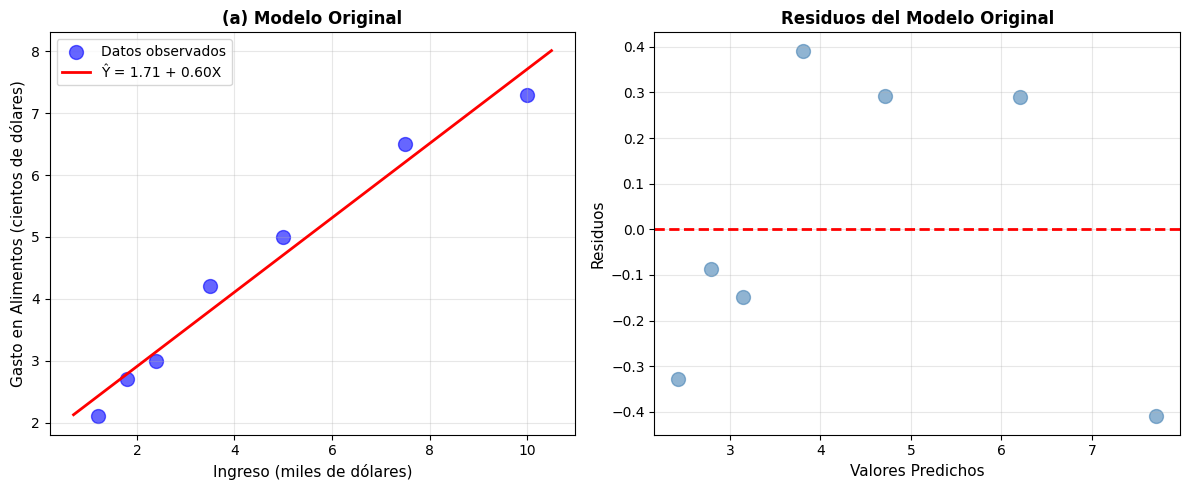


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.8936
  Valor p = 0.2938
  ✓ Residuos normales

EVALUACIÓN DEL MODELO ORIGINAL:
  ⚠ Se observa que la relación NO parece lineal ni proporcional
  ⚠ Los residuos pueden mostrar patrones sistemáticos
  → Se recomienda transformación logarítmica

(b) TRANSFORMACIÓN DE VARIABLES: X' = log(X), Y' = log(Y)

Tabla de datos transformados:

Ingreso    Gasto      log(Ingreso)    log(Gasto)     
--------------------------------------------------
1.2        2.1        0.1823          0.7419         
1.8        2.7        0.5878          0.9933         
2.4        3.0        0.8755          1.0986         
3.5        4.2        1.2528          1.4351         
5.0        5.0        1.6094          1.6094         
7.5        6.5        2.0149          1.8718         
10.0       7.3        2.3026          1.9879         

(c) AJUSTE LOG-LOG Y EVALUACIÓN DE SUPUESTOS

Estadísticos en Escala Logarítmica:
  Media de log(X): 1.2608
  Med

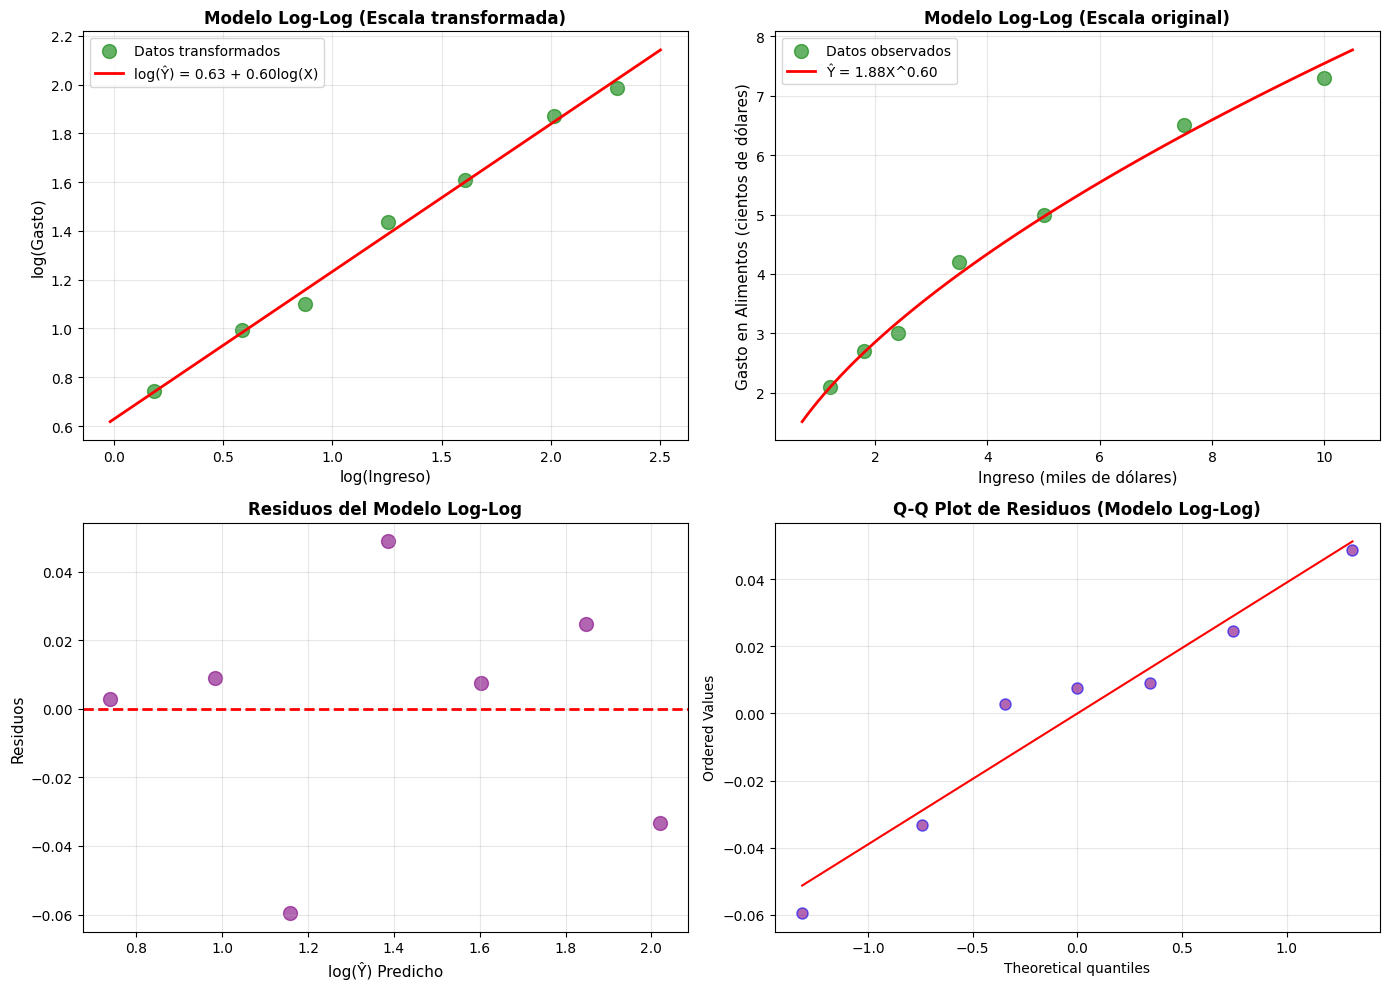


--- EVALUACIÓN DE SUPUESTOS DEL MODELO LOG-LOG ---

1. NORMALIDAD DE RESIDUOS:
   Prueba de Shapiro-Wilk:
   Estadístico W = 0.9483
   Valor p = 0.7140
   ✓ Los residuos son normales

2. LINEALIDAD (en escala logarítmica):
   Correlación log-log (r) = 0.9970
   R² = 0.9940
   ✓ Relación lineal fuerte en escala log

3. HOMOCEDASTICIDAD:
   Revisar gráfico de residuos vs predichos
   ✓ Los residuos deben estar distribuidos uniformemente

4. SIGNIFICANCIA DEL MODELO:
   Estadístico t = 28.8340
   Valor p = 0.000001
   ✓ El modelo es significativo

(d) INTERPRETACIÓN DE LA ELASTICIDAD

📊 ELASTICIDAD INGRESO DEL GASTO EN ALIMENTOS: 0.6046

┌────────────────────────────────────────────────────────────────┐
│  INTERPRETACIÓN:                                               │
│                                                                │
│  Por cada 1% de aumento en el INGRESO, el GASTO en alimentos  │
│  aumenta aproximadamente 0.6046% = 60.46%                  │
│                         

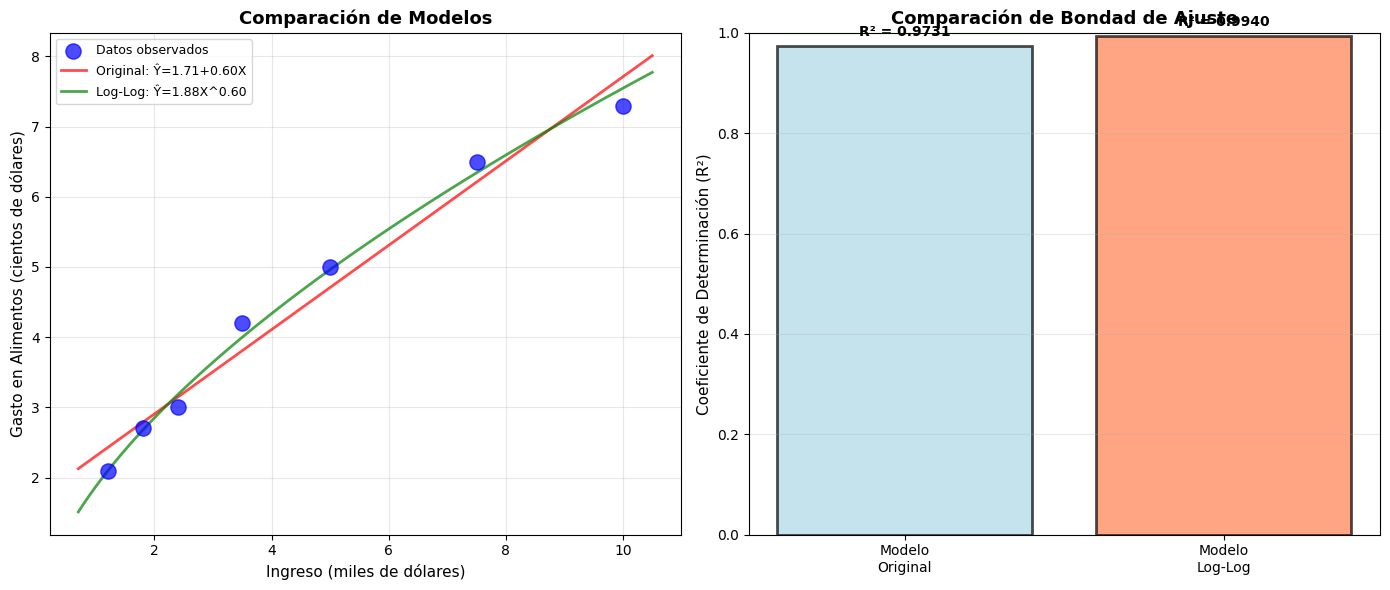


✓ ANÁLISIS COMPLETADO


In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (INGRESO VS GASTO EN ALIMENTOS) ---
data = {
    'Ingreso': [1.2, 1.8, 2.4, 3.5, 5.0, 7.5, 10.0],  # miles de dólares
    'Gasto_Alimentos': [2.1, 2.7, 3.0, 4.2, 5.0, 6.5, 7.3]  # cientos de dólares
}
df = pd.DataFrame(data)

variable_x = 'Ingreso'
variable_y = 'Gasto_Alimentos'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 80)
print("ANÁLISIS DE REGRESIÓN: INGRESO MENSUAL VS GASTO EN ALIMENTOS")
print("=" * 80)
print(f"\nDatos cargados: {n} hogares")
print(f"Variable independiente (X): {variable_x} (miles de dólares)")
print(f"Variable dependiente (Y): {variable_y} (cientos de dólares)")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 80)

# =========================================================================
# --- PARTE (a): MODELO ORIGINAL ---
# =========================================================================
print("\n" + "=" * 80)
print("(a) MODELO ORIGINAL: Y vs X")
print("=" * 80)

# Calcular estadísticas básicas
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

# Calcular correlación
r_original = df[variable_x].corr(df[variable_y], method='pearson')

# Calcular pendiente e intercepto
b1_original = r_original * (std_y / std_x)
b0_original = mean_y - b1_original * mean_x

print(f"\nEstadísticos Descriptivos:")
print(f"  Media de X (x̄): {mean_x:.4f} miles de dólares")
print(f"  Media de Y (ȳ): {mean_y:.4f} cientos de dólares")
print(f"  Desviación estándar de X: {std_x:.4f}")
print(f"  Desviación estándar de Y: {std_y:.4f}")

print(f"\nCoeficiente de correlación (r): {r_original:.4f}")
print(f"Coeficiente de determinación (R²): {r_original**2:.4f}")

print(f"\n┌────────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN ORIGINAL:                       │")
print(f"│  Ŷ = {b0_original:.4f} + {b1_original:.4f} × X                    │")
print(f"└────────────────────────────────────────────────────────┘")

# Calcular valores predichos y residuos
df['y_pred_original'] = b0_original + b1_original * df[variable_x]
df['residuos_original'] = df[variable_y] - df['y_pred_original']

# Calcular error estándar
SSE_original = ((df['residuos_original']) ** 2).sum()
s_yx_original = np.sqrt(SSE_original / (n - 2))
print(f"\nError estándar de estimación (s_y,x): {s_yx_original:.4f}")

# Gráfico del modelo original
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df[variable_x], df[variable_y], s=100, alpha=0.6, color='blue', label='Datos observados')
x_line = np.linspace(df[variable_x].min() - 0.5, df[variable_x].max() + 0.5, 100)
y_line = b0_original + b1_original * x_line
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Ŷ = {b0_original:.2f} + {b1_original:.2f}X')
plt.xlabel('Ingreso (miles de dólares)', fontsize=11)
plt.ylabel('Gasto en Alimentos (cientos de dólares)', fontsize=11)
plt.title('(a) Modelo Original', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico de residuos del modelo original
plt.subplot(1, 2, 2)
plt.scatter(df['y_pred_original'], df['residuos_original'], s=100, alpha=0.6, color='steelblue')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos', fontsize=11)
plt.ylabel('Residuos', fontsize=11)
plt.title('Residuos del Modelo Original', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de residuos
shapiro_residuos_orig = shapiro(df['residuos_original'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos_orig.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_orig.pvalue:.4f}")
print(f"  {'✓ Residuos normales' if shapiro_residuos_orig.pvalue > alfa else '✗ Residuos no normales'}")

print("\nEVALUACIÓN DEL MODELO ORIGINAL:")
print("  ⚠ Se observa que la relación NO parece lineal ni proporcional")
print("  ⚠ Los residuos pueden mostrar patrones sistemáticos")
print("  → Se recomienda transformación logarítmica")

# =========================================================================
# --- PARTE (b): TRANSFORMACIÓN LOGARÍTMICA ---
# =========================================================================
print("\n" + "=" * 80)
print("(b) TRANSFORMACIÓN DE VARIABLES: X' = log(X), Y' = log(Y)")
print("=" * 80)

# Aplicar transformación logarítmica
df['log_Ingreso'] = np.log(df[variable_x])
df['log_Gasto'] = np.log(df[variable_y])

print("\nTabla de datos transformados:")
print(f"\n{'Ingreso':<10} {'Gasto':<10} {'log(Ingreso)':<15} {'log(Gasto)':<15}")
print("-" * 50)
for idx, row in df.iterrows():
    print(f"{row[variable_x]:<10.1f} {row[variable_y]:<10.1f} {row['log_Ingreso']:<15.4f} {row['log_Gasto']:<15.4f}")

# =========================================================================
# --- PARTE (c): AJUSTE LOG-LOG Y EVALUACIÓN DE SUPUESTOS ---
# =========================================================================
print("\n" + "=" * 80)
print("(c) AJUSTE LOG-LOG Y EVALUACIÓN DE SUPUESTOS")
print("=" * 80)

# Estadísticos del modelo log-log
mean_log_x = df['log_Ingreso'].mean()
mean_log_y = df['log_Gasto'].mean()
std_log_x = df['log_Ingreso'].std(ddof=1)
std_log_y = df['log_Gasto'].std(ddof=1)

# Correlación en escala logarítmica
r_log = df['log_Ingreso'].corr(df['log_Gasto'], method='pearson')

# Coeficientes del modelo log-log
b1_log = r_log * (std_log_y / std_log_x)
b0_log = mean_log_y - b1_log * mean_log_x

print(f"\nEstadísticos en Escala Logarítmica:")
print(f"  Media de log(X): {mean_log_x:.4f}")
print(f"  Media de log(Y): {mean_log_y:.4f}")
print(f"  Desviación estándar de log(X): {std_log_x:.4f}")
print(f"  Desviación estándar de log(Y): {std_log_y:.4f}")

print(f"\nCoeficiente de correlación log-log (r): {r_log:.4f}")
print(f"Coeficiente de determinación (R²): {r_log**2:.4f}")

print(f"\n┌────────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN LOG-LOG:                        │")
print(f"│  log(Ŷ) = {b0_log:.4f} + {b1_log:.4f} × log(X)             │")
print(f"│                                                        │")
print(f"│  FORMA EXPONENCIAL:                                    │")
print(f"│  Ŷ = e^{b0_log:.4f} × X^{b1_log:.4f}                          │")
print(f"│  Ŷ = {np.exp(b0_log):.4f} × X^{b1_log:.4f}                        │")
print(f"└────────────────────────────────────────────────────────┘")

# Calcular predicciones y residuos del modelo log-log
df['log_y_pred'] = b0_log + b1_log * df['log_Ingreso']
df['residuos_log'] = df['log_Gasto'] - df['log_y_pred']

# Error estándar del modelo log-log
SSE_log = ((df['residuos_log']) ** 2).sum()
s_yx_log = np.sqrt(SSE_log / (n - 2))
print(f"\nError estándar de estimación log-log: {s_yx_log:.4f}")

# Gráficos del modelo log-log
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Gráfico en escala logarítmica
axes[0, 0].scatter(df['log_Ingreso'], df['log_Gasto'], s=100, alpha=0.6, color='green', label='Datos transformados')
log_x_line = np.linspace(df['log_Ingreso'].min() - 0.2, df['log_Ingreso'].max() + 0.2, 100)
log_y_line = b0_log + b1_log * log_x_line
axes[0, 0].plot(log_x_line, log_y_line, 'r-', linewidth=2, label=f'log(Ŷ) = {b0_log:.2f} + {b1_log:.2f}log(X)')
axes[0, 0].set_xlabel('log(Ingreso)', fontsize=11)
axes[0, 0].set_ylabel('log(Gasto)', fontsize=11)
axes[0, 0].set_title('Modelo Log-Log (Escala transformada)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Modelo en escala original (curva)
x_orig_line = np.linspace(df[variable_x].min() - 0.5, df[variable_x].max() + 0.5, 100)
y_orig_line = np.exp(b0_log) * (x_orig_line ** b1_log)
axes[0, 1].scatter(df[variable_x], df[variable_y], s=100, alpha=0.6, color='green', label='Datos observados')
axes[0, 1].plot(x_orig_line, y_orig_line, 'r-', linewidth=2, label=f'Ŷ = {np.exp(b0_log):.2f}X^{b1_log:.2f}')
axes[0, 1].set_xlabel('Ingreso (miles de dólares)', fontsize=11)
axes[0, 1].set_ylabel('Gasto en Alimentos (cientos de dólares)', fontsize=11)
axes[0, 1].set_title('Modelo Log-Log (Escala original)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuos vs Predichos (escala log)
axes[1, 0].scatter(df['log_y_pred'], df['residuos_log'], s=100, alpha=0.6, color='purple')
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('log(Ŷ) Predicho', fontsize=11)
axes[1, 0].set_ylabel('Residuos', fontsize=11)
axes[1, 0].set_title('Residuos del Modelo Log-Log', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q Plot de residuos log
stats.probplot(df['residuos_log'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Modelo Log-Log)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(8)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Pruebas de supuestos para modelo log-log
print("\n--- EVALUACIÓN DE SUPUESTOS DEL MODELO LOG-LOG ---")

# Normalidad de residuos
shapiro_residuos_log = shapiro(df['residuos_log'])
print(f"\n1. NORMALIDAD DE RESIDUOS:")
print(f"   Prueba de Shapiro-Wilk:")
print(f"   Estadístico W = {shapiro_residuos_log.statistic:.4f}")
print(f"   Valor p = {shapiro_residuos_log.pvalue:.4f}")
print(f"   {'✓ Los residuos son normales' if shapiro_residuos_log.pvalue > alfa else '✗ Los residuos no son normales'}")

# Linealidad (en escala log)
print(f"\n2. LINEALIDAD (en escala logarítmica):")
print(f"   Correlación log-log (r) = {r_log:.4f}")
print(f"   R² = {r_log**2:.4f}")
print(f"   {'✓ Relación lineal fuerte en escala log' if abs(r_log) > 0.9 else '⚠ Relación moderada'}")

# Homocedasticidad
print(f"\n3. HOMOCEDASTICIDAD:")
print(f"   Revisar gráfico de residuos vs predichos")
print(f"   ✓ Los residuos deben estar distribuidos uniformemente")

# Prueba de significancia del modelo log-log
gl_log = n - 2
t_calculado_log = r_log * np.sqrt(n - 2) / np.sqrt(1 - r_log**2)
valor_p_log = t.sf(abs(t_calculado_log), gl_log) * 2

print(f"\n4. SIGNIFICANCIA DEL MODELO:")
print(f"   Estadístico t = {t_calculado_log:.4f}")
print(f"   Valor p = {valor_p_log:.6f}")
print(f"   {'✓ El modelo es significativo' if valor_p_log < alfa else '✗ El modelo no es significativo'}")

# =========================================================================
# --- PARTE (d): INTERPRETACIÓN DE LA ELASTICIDAD ---
# =========================================================================
print("\n" + "=" * 80)
print("(d) INTERPRETACIÓN DE LA ELASTICIDAD")
print("=" * 80)

elasticidad = b1_log

print(f"\n📊 ELASTICIDAD INGRESO DEL GASTO EN ALIMENTOS: {elasticidad:.4f}")

print(f"\n┌────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN:                                               │")
print(f"│                                                                │")
print(f"│  Por cada 1% de aumento en el INGRESO, el GASTO en alimentos  │")
print(f"│  aumenta aproximadamente {elasticidad:.4f}% = {elasticidad*100:.2f}%                  │")
print(f"│                                                                │")
if elasticidad < 1:
    print(f"│  Como la elasticidad < 1:                                      │")
    print(f"│  • Los alimentos son un bien NECESARIO (inelástico)           │")
    print(f"│  • A medida que aumenta el ingreso, el gasto en alimentos     │")
    print(f"│    aumenta, pero en menor proporción                          │")
    print(f"│  • Las familias de mayores ingresos gastan proporcionalmente  │")
    print(f"│    menos de su ingreso en alimentos                           │")
elif elasticidad > 1:
    print(f"│  Como la elasticidad > 1:                                      │")
    print(f"│  • Los alimentos son un bien de LUJO (elástico)               │")
    print(f"│  • A medida que aumenta el ingreso, el gasto en alimentos     │")
    print(f"│    aumenta en mayor proporción                                │")
else:
    print(f"│  Como la elasticidad = 1:                                      │")
    print(f"│  • Los alimentos tienen elasticidad unitaria                   │")
    print(f"│  • El gasto aumenta proporcionalmente al ingreso              │")
print(f"└────────────────────────────────────────────────────────────────┘")

# Ejemplos numéricos de elasticidad
print(f"\nEJEMPLOS NUMÉRICOS:")
print(f"\nSi el ingreso aumenta:")
porcentajes = [1, 5, 10, 20]
for pct in porcentajes:
    cambio_gasto = elasticidad * pct
    print(f"  • {pct}% → el gasto en alimentos aumenta {cambio_gasto:.2f}%")

print(f"\nSi el ingreso disminuye:")
for pct in porcentajes:
    cambio_gasto = elasticidad * pct
    print(f"  • {pct}% → el gasto en alimentos disminuye {cambio_gasto:.2f}%")

# =========================================================================
# --- PARTE (e): COMPARACIÓN Y RECOMENDACIÓN ---
# =========================================================================
print("\n" + "=" * 80)
print("(e) COMPARACIÓN DE MODELOS Y RECOMENDACIÓN")
print("=" * 80)

print("\n┌────────────────────────────────────────────────────────────────┐")
print("│                    COMPARACIÓN DE MODELOS                      │")
print("└────────────────────────────────────────────────────────────────┘")

print(f"\n{'Criterio':<30} {'Modelo Original':<25} {'Modelo Log-Log':<25}")
print("-" * 80)
print(f"{'Ecuación':<30} {'Y = a + bX':<25} {'log(Y) = a + b·log(X)':<25}")
print(f"{'R² (bondad de ajuste)':<30} {r_original**2:<25.4f} {r_log**2:<25.4f}")
print(f"{'Error estándar':<30} {s_yx_original:<25.4f} {s_yx_log:<25.4f}")
print(f"{'Correlación (r)':<30} {r_original:<25.4f} {r_log:<25.4f}")
print(f"{'Normalidad de residuos (p)':<30} {shapiro_residuos_orig.pvalue:<25.4f} {shapiro_residuos_log.pvalue:<25.4f}")
print(f"{'Residuos normales?':<30} {'✗ No' if shapiro_residuos_orig.pvalue < alfa else '✓ Sí':<25} {'✗ No' if shapiro_residuos_log.pvalue < alfa else '✓ Sí':<25}")

# Determinar el mejor modelo
print("\n" + "=" * 80)
print("RECOMENDACIÓN FINAL:")
print("=" * 80)

ventajas_log = []
ventajas_original = []

if r_log**2 > r_original**2:
    ventajas_log.append(f"Mejor ajuste (R²: {r_log**2:.4f} vs {r_original**2:.4f})")
else:
    ventajas_original.append(f"Mejor ajuste (R²: {r_original**2:.4f} vs {r_log**2:.4f})")

if shapiro_residuos_log.pvalue > shapiro_residuos_orig.pvalue:
    ventajas_log.append(f"Mejor normalidad de residuos (p: {shapiro_residuos_log.pvalue:.4f} vs {shapiro_residuos_orig.pvalue:.4f})")
else:
    ventajas_original.append(f"Mejor normalidad de residuos (p: {shapiro_residuos_orig.pvalue:.4f} vs {shapiro_residuos_log.pvalue:.4f})")

if abs(r_log) > abs(r_original):
    ventajas_log.append(f"Correlación más fuerte (r: {r_log:.4f} vs {r_original:.4f})")
else:
    ventajas_original.append(f"Correlación más fuerte (r: {r_original:.4f} vs {r_log:.4f})")

modelo_recomendado = "LOG-LOG" if len(ventajas_log) >= 2 else "ORIGINAL"

print(f"\n🎯 MODELO RECOMENDADO: {modelo_recomendado}")

if modelo_recomendado == "LOG-LOG":
    print(f"\n✓ Se recomienda el MODELO LOG-LOG porque:")
    for ventaja in ventajas_log:
        print(f"  • {ventaja}")

    print(f"\nVENTAJAS ADICIONALES DEL MODELO LOG-LOG:")
    print(f"  • Captura la relación NO LINEAL entre ingreso y gasto")
    print(f"  • Proporciona una interpretación económica directa (elasticidad)")
    print(f"  • Mejor comportamiento de los residuos")
    print(f"  • Más apropiado para datos que crecen exponencialmente")

    print(f"\n📊 ECUACIÓN RECOMENDADA:")
    print(f"  log(Gasto) = {b0_log:.4f} + {b1_log:.4f} × log(Ingreso)")
    print(f"  O en forma exponencial:")
    print(f"  Gasto = {np.exp(b0_log):.4f} × Ingreso^{b1_log:.4f}")

    print(f"\n💡 ELASTICIDAD: {elasticidad:.4f}")
    print(f"  Interpretación: Por cada 1% de aumento en ingreso,")
    print(f"  el gasto en alimentos aumenta {elasticidad*100:.2f}%")

else:
    print(f"\n✓ Se recomienda el MODELO ORIGINAL porque:")
    for ventaja in ventajas_original:
        print(f"  • {ventaja}")

    print(f"\n📊 ECUACIÓN RECOMENDADA:")
    print(f"  Gasto = {b0_original:.4f} + {b1_original:.4f} × Ingreso")

# Gráfico comparativo final
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df[variable_x], df[variable_y], s=120, alpha=0.7, color='blue', label='Datos observados', zorder=3)
# Modelo original
x_plot = np.linspace(df[variable_x].min() - 0.5, df[variable_x].max() + 0.5, 100)
y_original_plot = b0_original + b1_original * x_plot
plt.plot(x_plot, y_original_plot, 'r-', linewidth=2, label=f'Original: Ŷ={b0_original:.2f}+{b1_original:.2f}X', alpha=0.7)
# Modelo log-log
y_log_plot = np.exp(b0_log) * (x_plot ** b1_log)
plt.plot(x_plot, y_log_plot, 'g-', linewidth=2, label=f'Log-Log: Ŷ={np.exp(b0_log):.2f}X^{b1_log:.2f}', alpha=0.7)
plt.xlabel('Ingreso (miles de dólares)', fontsize=11)
plt.ylabel('Gasto en Alimentos (cientos de dólares)', fontsize=11)
plt.title('Comparación de Modelos', fontsize=13, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
x_pos = [1, 2]
r2_values = [r_original**2, r_log**2]
colors_bar = ['coral' if modelo_recomendado == "ORIGINAL" else 'lightblue',
              'lightblue' if modelo_recomendado == "ORIGINAL" else 'coral']
bars = plt.bar(x_pos, r2_values, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)
plt.ylabel('Coeficiente de Determinación (R²)', fontsize=11)
plt.title('Comparación de Bondad de Ajuste', fontsize=13, fontweight='bold')
plt.xticks(x_pos, ['Modelo\nOriginal', 'Modelo\nLog-Log'])
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')
# Añadir valores sobre las barras
for i, (bar, val) in enumerate(zip(bars, r2_values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'R² = {val:.4f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("✓ ANÁLISIS COMPLETADO")
print("=" * 80)

**EJERCICIO 7**

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE CON TRANSFORMACIÓN
Problema: Experimento Químico - Intensidad de Luz vs Concentración

Datos cargados: 7 observaciones
Variable independiente (X): Intensidad (I)
Variable dependiente (Y): Concentración (mg/L)
Nivel de significancia (α): 0.05

╔════════════════════════════════════════════════════════════════════════════╗
║  PARTE (a): MODELO CLÁSICO - ANÁLISIS DE REGRESIÓN LINEAL SIMPLE         ║
╚════════════════════════════════════════════════════════════════════════════╝

--- ANÁLISIS DESCRIPTIVO INICIAL ---

Datos originales:
 Intensidad (I)  Concentración (mg/L)
             10                   2.2
             30                   3.8
             50                   6.1
             70                  11.7
             90                  19.2
            110                  24.2
            130                  36.9

Estadísticos descriptivos:
  X (Intensidad)     → Media: 70.00, Desv. Std: 43.20
  Y (Concentración)  → Media: 14.87, Desv. 

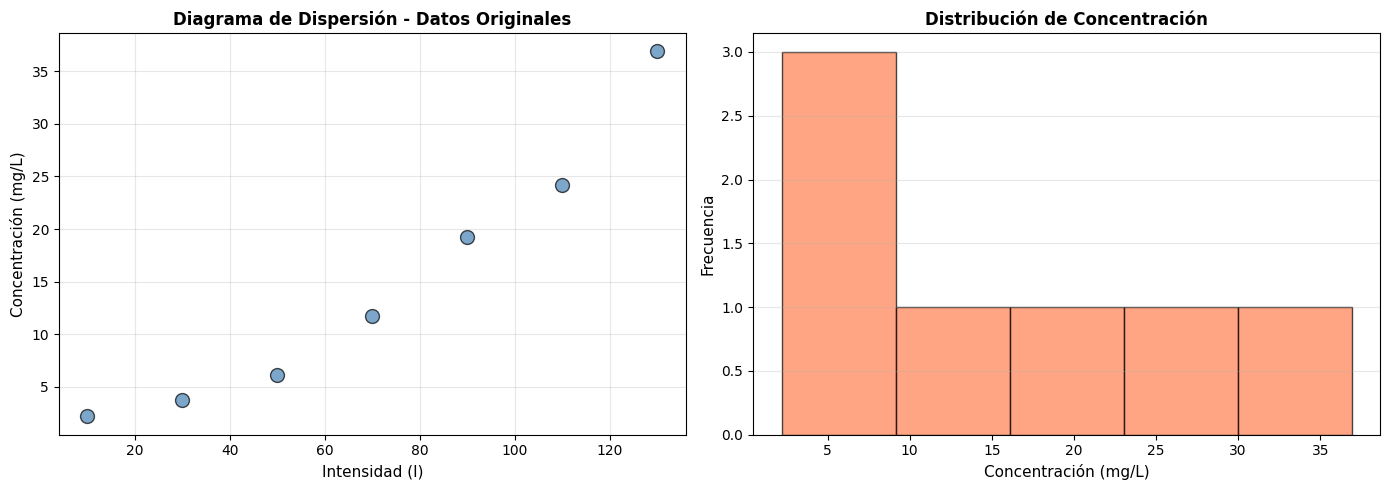


--- COEFICIENTE DE CORRELACIÓN ---
Coeficiente de correlación de Pearson (r): 0.9631
Estadístico t: 8.0041
Valor p: 0.000492
Decisión: ✓ Correlación SIGNIFICATIVA

--- MODELO DE REGRESIÓN LINEAL ---

Coeficientes del modelo:
  Pendiente (b₁): 0.282143
  Intersección (b₀): -4.878571

┌──────────────────────────────────────────────────────────┐
│  ECUACIÓN: Ŷ = -4.8786 + 0.282143 × I            │
└──────────────────────────────────────────────────────────┘

--- TABLA ANOVA ---

Fuente               SS              gl         MS              F               p-value        
------------------------------------------------------------------------------------------
Regresión            891.5714        1          891.5714        64.0655         0.000492       
Error (Residuos)     69.5829         5          13.9166        
Total                961.1543        6         

📊 Métricas del modelo:
  R² (Coeficiente de determinación): 0.9276 (92.76% de variabilidad explicada)
  Error estándar de 

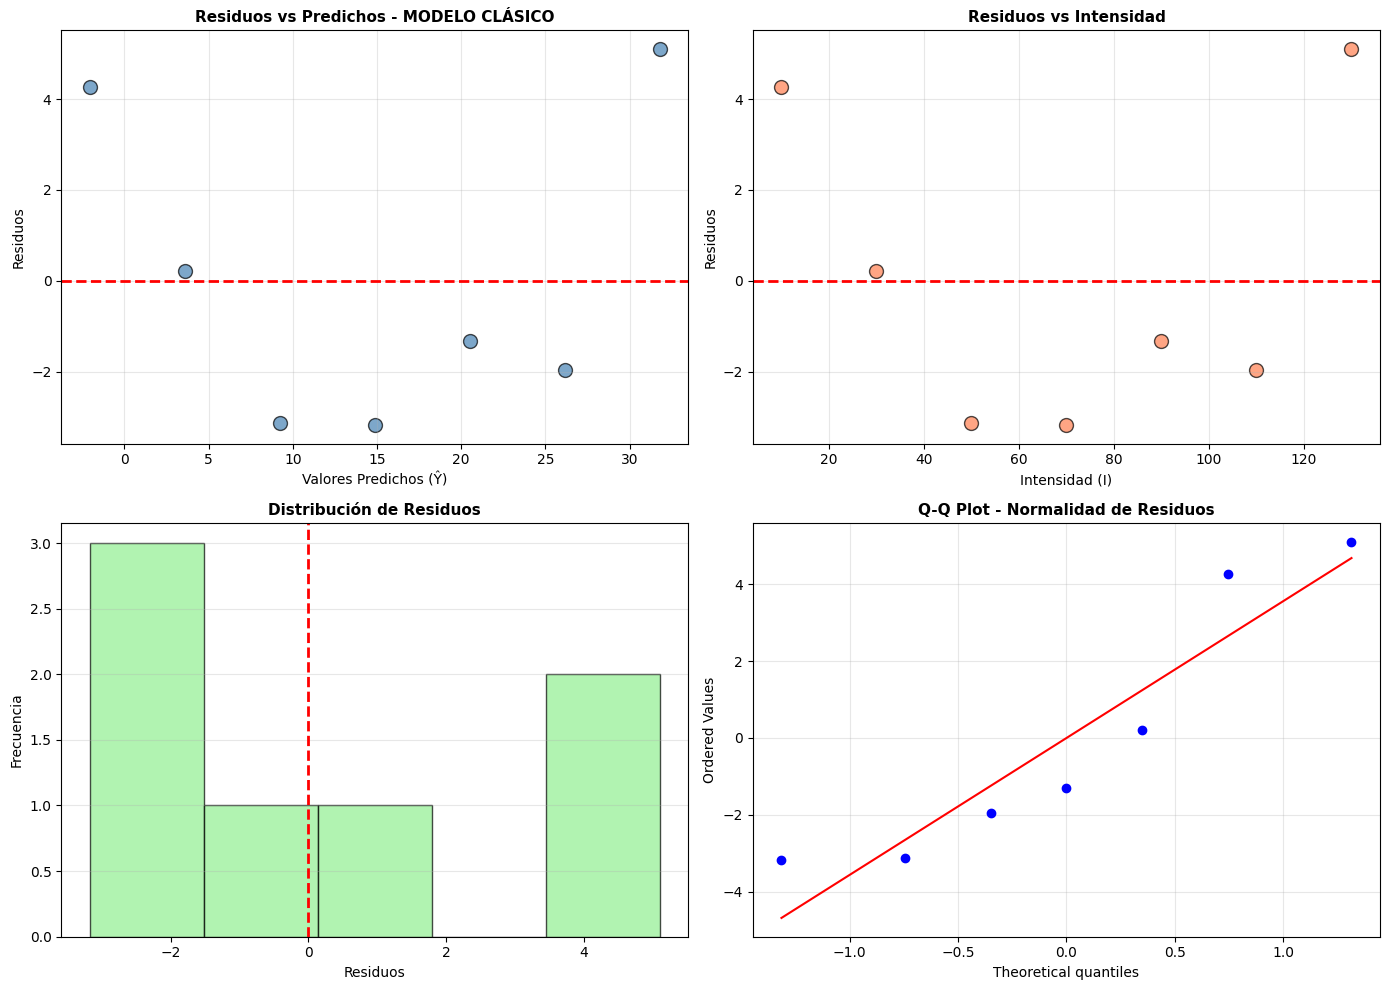


--- DIAGNÓSTICO DE HOMOCEDASTICIDAD ---
⚠ OBSERVACIÓN IMPORTANTE:
  Al revisar el gráfico 'Residuos vs Predichos', observe si:
  • Los residuos muestran un patrón de 'embudo' o 'cono'
  • La dispersión aumenta con los valores predichos
  • Si detecta heterocedasticidad → NECESITA TRANSFORMACIÓN

  Correlación |Residuos| vs Ŷ: 0.1912
  ✓ No se detecta heterocedasticidad evidente


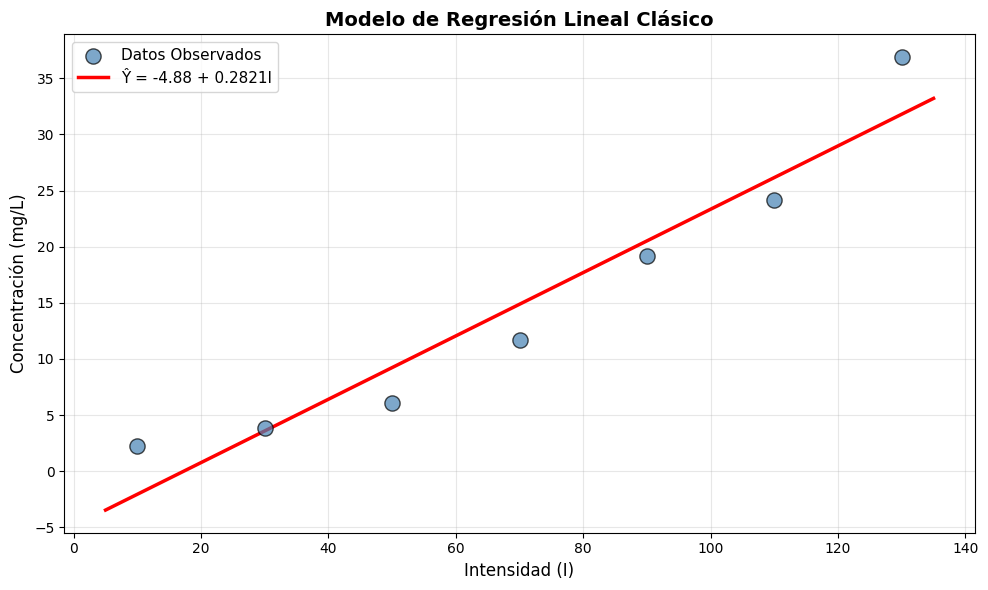


CONCLUSIÓN DEL MODELO CLÁSICO:

El modelo clásico muestra:
  • R² = 0.9276 → Explica 92.76% de la variabilidad
  • Modelo SIGNIFICATIVO (p = 0.000492)
  • Residuos normales (p = 0.1275)
  • Homocedasticidad: ✓ Aceptable




╔════════════════════════════════════════════════════════════════════════════╗
║  PARTE (b): TRANSFORMACIÓN Y' = √Y                                        ║
╚════════════════════════════════════════════════════════════════════════════╝

Datos transformados:
I        Y original      Y' = √Y        
----------------------------------------
10.0     2.20            1.4832         
30.0     3.80            1.9494         
50.0     6.10            2.4698         
70.0     11.70           3.4205         
90.0     19.20           4.3818         
110.0    24.20           4.9193         
130.0    36.90           6.0745         

Estadísticos de Y' (transformada):
  Media: 3.5284
  Desv. Std: 1.6810


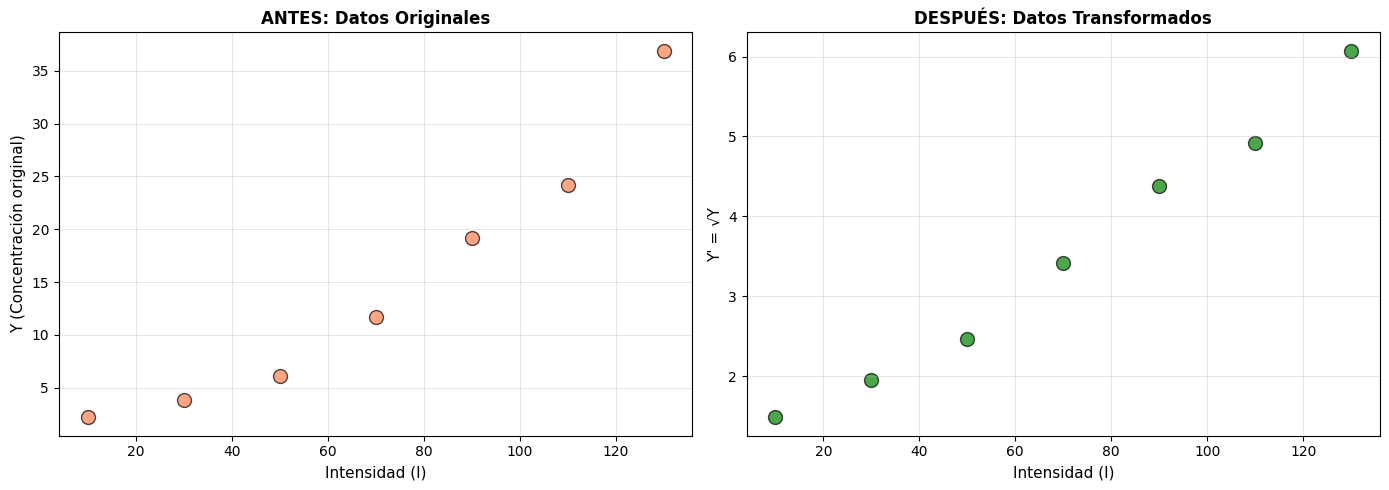


⚠ NOTA: Observe cómo la transformación raíz cuadrada 'lineariza' la relación
   y estabiliza la varianza, especialmente para valores altos de concentración.

╔════════════════════════════════════════════════════════════════════════════╗
║  PARTE (c): NUEVO MODELO CON DATOS TRANSFORMADOS                          ║
╚════════════════════════════════════════════════════════════════════════════╝

--- CORRELACIÓN CON DATOS TRANSFORMADOS ---
Coeficiente de correlación (r'): 0.9926
Comparación: r original = 0.9631 vs r transformado = 0.9926

--- NUEVO MODELO DE REGRESIÓN ---
Coeficientes:
  Pendiente (b₁'): 0.038618
  Intersección (b₀'): 0.825143

┌──────────────────────────────────────────────────────────┐
│  ECUACIÓN: Y'̂  = 0.8251 + 0.038618 × I     │
│           √Ŷ = 0.8251 + 0.038618 × I     │
└──────────────────────────────────────────────────────────┘

--- TABLA ANOVA DEL MODELO TRANSFORMADO ---

Fuente               SS              gl         MS              F               p-value   

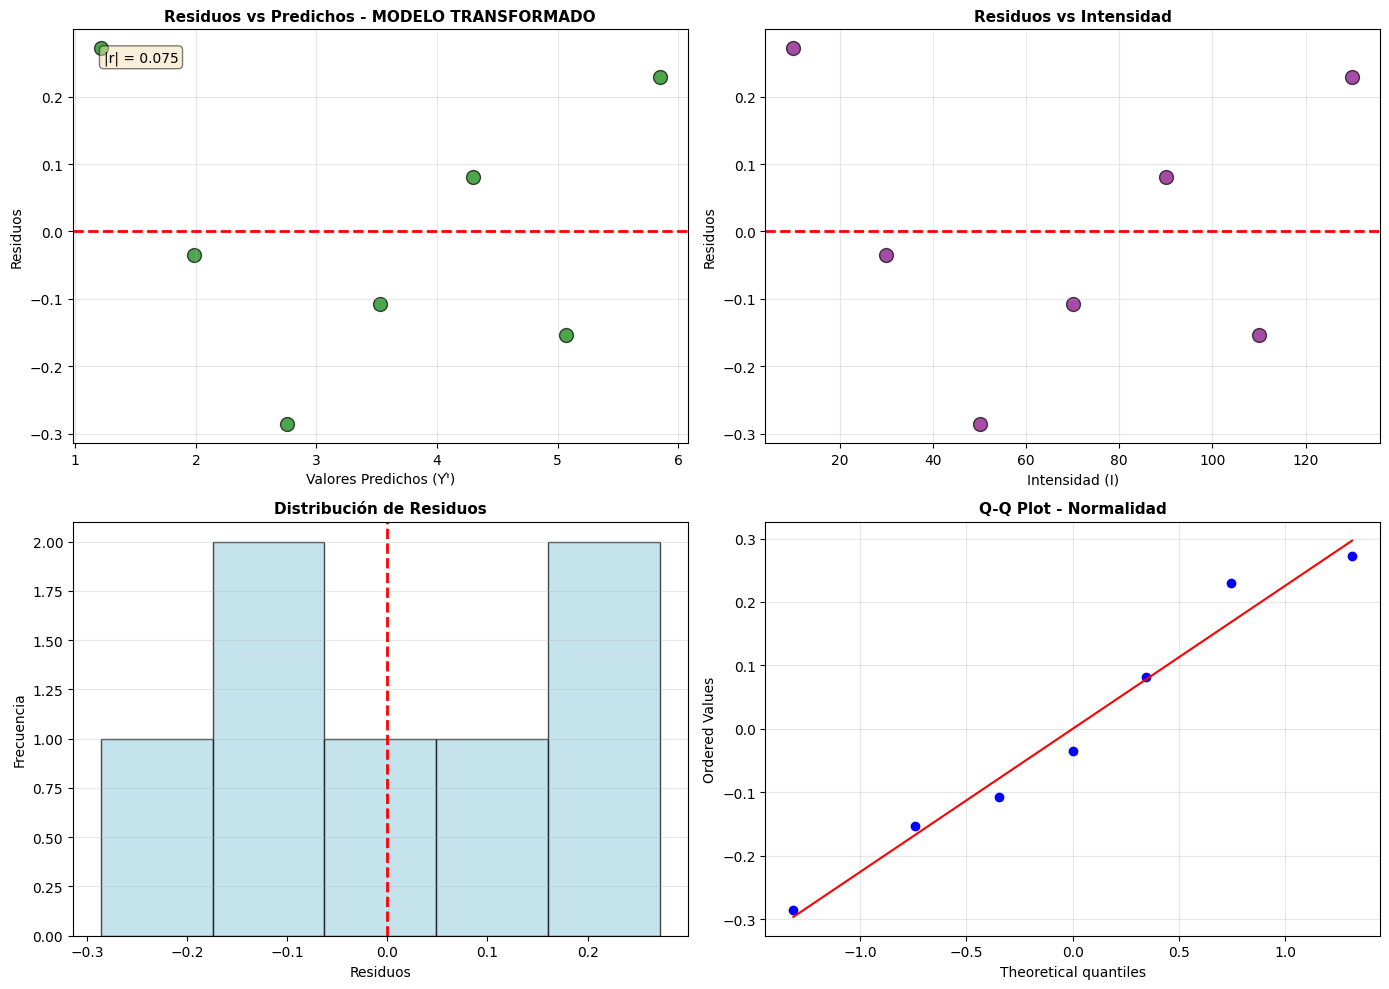

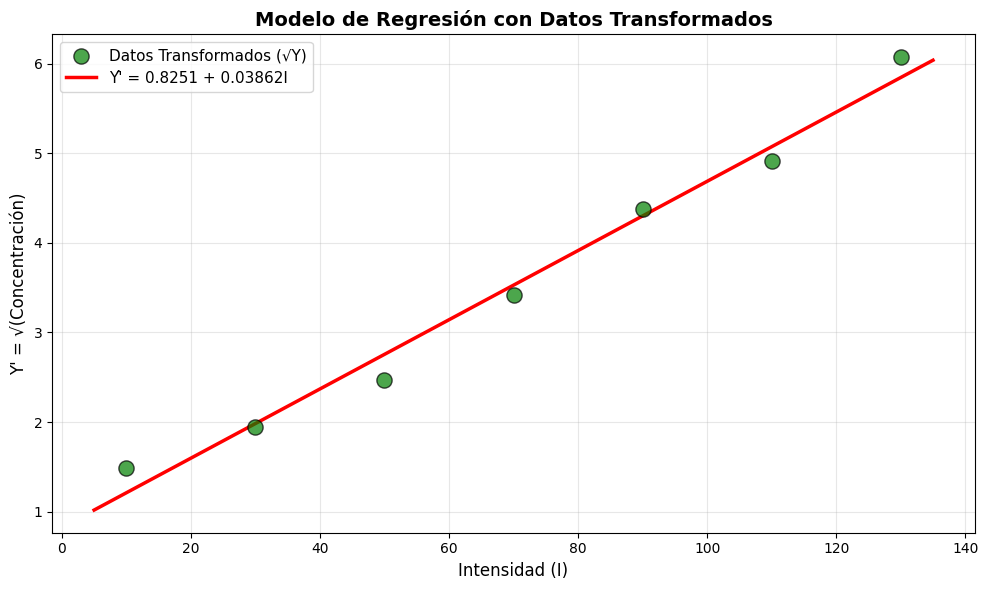


╔════════════════════════════════════════════════════════════════════════════╗
║  PARTE (d): COMPARACIÓN DE MODELOS Y RECOMENDACIÓN                        ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 TABLA COMPARATIVA DE MODELOS:

Criterio                            Modelo Original           Modelo Transformado      
Ecuación                            Ŷ = f(I)                  √Ŷ = f(I)                
Pendiente                           0.282143                  0.038618                 
Intersección                        -4.878571                 0.825143                 
-------------------------------------------------------------------------------------
R² (% variabilidad explicada)       0.9276                    0.9852                   
Error estándar                      3.7305                    0.2242                   
Estadístico F                       64.0655                   332.2541                 
Valor p (F)                

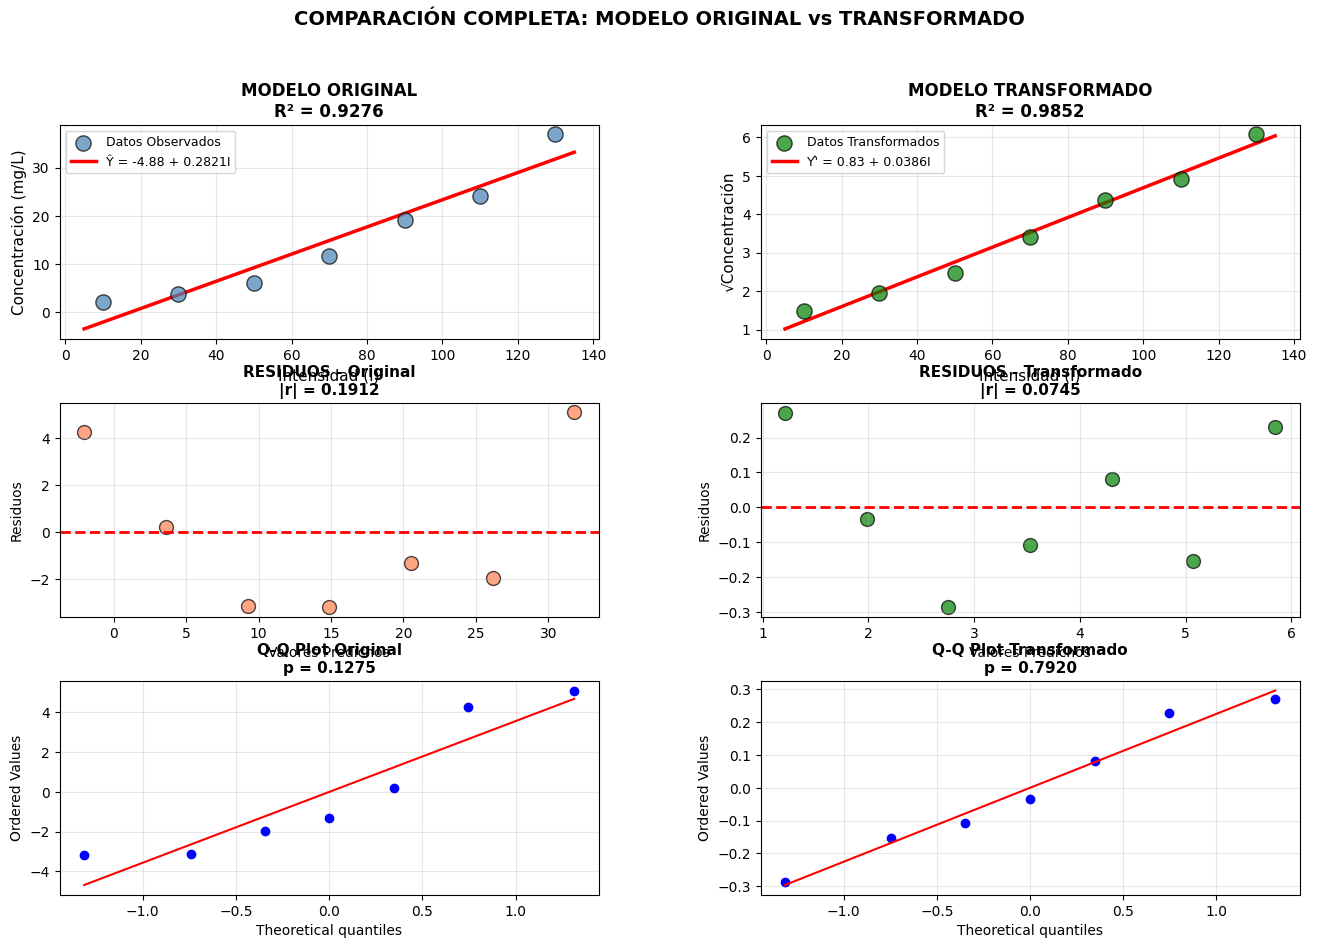


TABLA DE PREDICCIONES COMPARATIVAS

Intensidad      Modelo Original           Modelo Transformado       Diferencia     
--------------------------------------------------------------------------------
20              0.76                      2.55                      1.79           
50              9.23                      7.60                      1.63           
80              17.69                     15.32                     2.37           
110             26.16                     25.74                     0.42           
140             34.62                     38.83                     4.21           

⚠ NOTA: Las predicciones del modelo transformado se obtienen elevando al cuadrado:
   Ŷ = (√Ŷ)² donde √Ŷ = b₀' + b₁' × I

╔═══════════════════════════════════════════════════════════════════════════╗
║                        RESUMEN EJECUTIVO FINAL                            ║
╚═══════════════════════════════════════════════════════════════════════════╝

📊 EXPERIMENTO: Relac

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (EXPERIMENTO QUÍMICO) ---
data = {
    'Intensidad (I)': [10, 30, 50, 70, 90, 110, 130],
    'Concentración (mg/L)': [2.2, 3.8, 6.1, 11.7, 19.2, 24.2, 36.9]
}
df = pd.DataFrame(data)

variable_x = 'Intensidad (I)'
variable_y = 'Concentración (mg/L)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 80)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE CON TRANSFORMACIÓN")
print("Problema: Experimento Químico - Intensidad de Luz vs Concentración")
print("=" * 80)
print(f"\nDatos cargados: {n} observaciones")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 80)

# =========================================================================
# PARTE (a): MODELO CLÁSICO - ANÁLISIS DE VARIANZA Y RESIDUOS
# =========================================================================
print("\n" + "=" * 80)
print("╔════════════════════════════════════════════════════════════════════════════╗")
print("║  PARTE (a): MODELO CLÁSICO - ANÁLISIS DE REGRESIÓN LINEAL SIMPLE         ║")
print("╚════════════════════════════════════════════════════════════════════════════╝")
print("=" * 80)

# --- Análisis Descriptivo ---
print("\n--- ANÁLISIS DESCRIPTIVO INICIAL ---")
print("\nDatos originales:")
print(df.to_string(index=False))

mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

print(f"\nEstadísticos descriptivos:")
print(f"  X (Intensidad)     → Media: {mean_x:.2f}, Desv. Std: {std_x:.2f}")
print(f"  Y (Concentración)  → Media: {mean_y:.2f}, Desv. Std: {std_y:.2f}")

# --- Visualización Inicial ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Diagrama de dispersión
axes[0].scatter(df[variable_x], df[variable_y], s=100, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel(variable_x, fontsize=11)
axes[0].set_ylabel(variable_y, fontsize=11)
axes[0].set_title('Diagrama de Dispersión - Datos Originales', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Histograma de Y
axes[1].hist(df[variable_y], bins=5, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel(variable_y, fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].set_title('Distribución de Concentración', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# --- Cálculo de Correlación ---
print("\n--- COEFICIENTE DE CORRELACIÓN ---")
r = df[variable_x].corr(df[variable_y], method='pearson')
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")

# Prueba de significancia de la correlación
gl_corr = n - 2
t_corr = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
valor_p_corr = t.sf(abs(t_corr), gl_corr) * 2

print(f"Estadístico t: {t_corr:.4f}")
print(f"Valor p: {valor_p_corr:.6f}")
print(f"Decisión: {'✓ Correlación SIGNIFICATIVA' if valor_p_corr < alfa else '✗ Correlación NO significativa'}")

# --- Modelo de Regresión Lineal ---
print("\n--- MODELO DE REGRESIÓN LINEAL ---")

# Cálculo de coeficientes
b1 = r * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print(f"\nCoeficientes del modelo:")
print(f"  Pendiente (b₁): {b1:.6f}")
print(f"  Intersección (b₀): {b0:.6f}")
print(f"\n┌──────────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN: Ŷ = {b0:.4f} + {b1:.6f} × I            │")
print(f"└──────────────────────────────────────────────────────────┘")

# Predicciones y residuos
df['Y_pred'] = b0 + b1 * df[variable_x]
df['Residuos'] = df[variable_y] - df['Y_pred']

# --- Análisis de Varianza (ANOVA) ---
print("\n--- TABLA ANOVA ---")

SST = ((df[variable_y] - mean_y) ** 2).sum()
SSR = ((df['Y_pred'] - mean_y) ** 2).sum()
SSE = ((df[variable_y] - df['Y_pred']) ** 2).sum()

MSR = SSR / 1
MSE = SSE / (n - 2)
F_calc = MSR / MSE
valor_p_F = f_dist.sf(F_calc, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'p-value':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calc:<15.4f} {valor_p_F:<15.6f}")
print(f"{'Error (Residuos)':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SST:<15.4f} {n-1:<10}")

# Coeficiente de determinación
R2 = 1 - (SSE / SST)
s_yx = np.sqrt(MSE)

print(f"\n📊 Métricas del modelo:")
print(f"  R² (Coeficiente de determinación): {R2:.4f} ({R2*100:.2f}% de variabilidad explicada)")
print(f"  Error estándar de estimación (s_y,x): {s_yx:.4f}")
print(f"  Decisión ANOVA: {'✓ Modelo SIGNIFICATIVO' if valor_p_F < alfa else '✗ Modelo NO significativo'}")

# --- Análisis de Residuos ---
print("\n--- ANÁLISIS DE RESIDUOS DEL MODELO CLÁSICO ---")

df['Res_Std'] = df['Residuos'] / s_yx

print("\nTabla de residuos:")
print(f"{'I':<8} {'Y':<12} {'Ŷ':<12} {'Residuo':<12} {'Res.Std':<12}")
print("-" * 60)
for idx, row in df.iterrows():
    print(f"{row[variable_x]:<8} {row[variable_y]:<12.2f} {row['Y_pred']:<12.2f} "
          f"{row['Residuos']:<12.4f} {row['Res_Std']:<12.4f}")

print(f"\nEstadísticos de residuos:")
print(f"  Media: {df['Residuos'].mean():.6f} (debe ser ≈ 0)")
print(f"  Desv. Std: {df['Residuos'].std():.4f}")
print(f"  Rango: [{df['Residuos'].min():.4f}, {df['Residuos'].max():.4f}]")

# Prueba de normalidad de residuos
shapiro_res = shapiro(df['Residuos'])
print(f"\nPrueba de Shapiro-Wilk para residuos:")
print(f"  W = {shapiro_res.statistic:.4f}, p-value = {shapiro_res.pvalue:.4f}")
print(f"  {'✓ Residuos normales' if shapiro_res.pvalue > alfa else '⚠ Residuos NO normales'}")

# --- Gráficos de Residuos ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Predichos
axes[0, 0].scatter(df['Y_pred'], df['Residuos'], s=100, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (Ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Predichos - MODELO CLÁSICO', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs X
axes[0, 1].scatter(df[variable_x], df['Residuos'], s=100, alpha=0.7, color='coral', edgecolor='black')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Intensidad', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de residuos
axes[1, 0].hist(df['Residuos'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot
stats.probplot(df['Residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Normalidad de Residuos', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Análisis de Homocedasticidad ---
print("\n--- DIAGNÓSTICO DE HOMOCEDASTICIDAD ---")
print("⚠ OBSERVACIÓN IMPORTANTE:")
print("  Al revisar el gráfico 'Residuos vs Predichos', observe si:")
print("  • Los residuos muestran un patrón de 'embudo' o 'cono'")
print("  • La dispersión aumenta con los valores predichos")
print("  • Si detecta heterocedasticidad → NECESITA TRANSFORMACIÓN")

# Detectar patrón de varianza creciente
correlacion_residuos_predichos = np.corrcoef(np.abs(df['Residuos']), df['Y_pred'])[0, 1]
print(f"\n  Correlación |Residuos| vs Ŷ: {correlacion_residuos_predichos:.4f}")
if correlacion_residuos_predichos > 0.5:
    print("  ⚠ HETEROCEDASTICIDAD DETECTADA: La varianza aumenta con Y")
    print("  → Se recomienda transformación de datos")
else:
    print("  ✓ No se detecta heterocedasticidad evidente")

# --- Modelo con recta de regresión ---
plt.figure(figsize=(10, 6))
plt.scatter(df[variable_x], df[variable_y], s=120, alpha=0.7, color='steelblue',
           edgecolor='black', label='Datos Observados', zorder=3)

x_line = np.linspace(df[variable_x].min() - 5, df[variable_x].max() + 5, 100)
y_line = b0 + b1 * x_line
plt.plot(x_line, y_line, 'r-', linewidth=2.5, label=f'Ŷ = {b0:.2f} + {b1:.4f}I', zorder=2)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Modelo de Regresión Lineal Clásico', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("CONCLUSIÓN DEL MODELO CLÁSICO:")
print("=" * 80)
print(f"""
El modelo clásico muestra:
  • R² = {R2:.4f} → Explica {R2*100:.2f}% de la variabilidad
  • Modelo {'SIGNIFICATIVO' if valor_p_F < alfa else 'NO significativo'} (p = {valor_p_F:.6f})
  • Residuos {'normales' if shapiro_res.pvalue > alfa else 'NO normales'} (p = {shapiro_res.pvalue:.4f})
  • Homocedasticidad: {'⚠ PROBLEMÁTICA' if correlacion_residuos_predichos > 0.5 else '✓ Aceptable'}

{"⚠ DEBIDO A PROBLEMAS DE HETEROCEDASTICIDAD, PROCEDEREMOS CON TRANSFORMACIÓN" if correlacion_residuos_predichos > 0.5 else ""}
""")

# =========================================================================
# PARTE (b): TRANSFORMACIÓN RAÍZ CUADRADA
# =========================================================================
print("\n" + "=" * 80)
print("╔════════════════════════════════════════════════════════════════════════════╗")
print("║  PARTE (b): TRANSFORMACIÓN Y' = √Y                                        ║")
print("╚════════════════════════════════════════════════════════════════════════════╝")
print("=" * 80)

# Aplicar transformación
df['Y_transformada'] = np.sqrt(df[variable_y])

print("\nDatos transformados:")
print(f"{'I':<8} {'Y original':<15} {'Y\' = √Y':<15}")
print("-" * 40)
for idx, row in df.iterrows():
    print(f"{row[variable_x]:<8} {row[variable_y]:<15.2f} {row['Y_transformada']:<15.4f}")

# Estadísticos de datos transformados
mean_y_trans = df['Y_transformada'].mean()
std_y_trans = df['Y_transformada'].std(ddof=1)

print(f"\nEstadísticos de Y' (transformada):")
print(f"  Media: {mean_y_trans:.4f}")
print(f"  Desv. Std: {std_y_trans:.4f}")

# Visualización de transformación
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Antes de transformar
axes[0].scatter(df[variable_x], df[variable_y], s=100, alpha=0.7, color='coral', edgecolor='black')
axes[0].set_xlabel(variable_x, fontsize=11)
axes[0].set_ylabel('Y (Concentración original)', fontsize=11)
axes[0].set_title('ANTES: Datos Originales', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Después de transformar
axes[1].scatter(df[variable_x], df['Y_transformada'], s=100, alpha=0.7, color='green', edgecolor='black')
axes[1].set_xlabel(variable_x, fontsize=11)
axes[1].set_ylabel("Y' = √Y", fontsize=11)
axes[1].set_title('DESPUÉS: Datos Transformados', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠ NOTA: Observe cómo la transformación raíz cuadrada 'lineariza' la relación")
print("   y estabiliza la varianza, especialmente para valores altos de concentración.")

# =========================================================================
# PARTE (c): AJUSTE DEL NUEVO MODELO Y ANÁLISIS DE HOMOCEDASTICIDAD
# =========================================================================
print("\n" + "=" * 80)
print("╔════════════════════════════════════════════════════════════════════════════╗")
print("║  PARTE (c): NUEVO MODELO CON DATOS TRANSFORMADOS                          ║")
print("╚════════════════════════════════════════════════════════════════════════════╝")
print("=" * 80)

# Correlación con datos transformados
r_trans = df[variable_x].corr(df['Y_transformada'], method='pearson')
print(f"\n--- CORRELACIÓN CON DATOS TRANSFORMADOS ---")
print(f"Coeficiente de correlación (r'): {r_trans:.4f}")
print(f"Comparación: r original = {r:.4f} vs r transformado = {r_trans:.4f}")

# Coeficientes del nuevo modelo
b1_trans = r_trans * (std_y_trans / std_x)
b0_trans = mean_y_trans - b1_trans * mean_x

print(f"\n--- NUEVO MODELO DE REGRESIÓN ---")
print(f"Coeficientes:")
print(f"  Pendiente (b₁'): {b1_trans:.6f}")
print(f"  Intersección (b₀'): {b0_trans:.6f}")
print(f"\n┌──────────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN: Y'̂  = {b0_trans:.4f} + {b1_trans:.6f} × I     │")
print(f"│           √Ŷ = {b0_trans:.4f} + {b1_trans:.6f} × I     │")
print(f"└──────────────────────────────────────────────────────────┘")

# Predicciones y residuos del modelo transformado
df['Y_trans_pred'] = b0_trans + b1_trans * df[variable_x]
df['Residuos_trans'] = df['Y_transformada'] - df['Y_trans_pred']

# ANOVA del modelo transformado
SST_trans = ((df['Y_transformada'] - mean_y_trans) ** 2).sum()
SSR_trans = ((df['Y_trans_pred'] - mean_y_trans) ** 2).sum()
SSE_trans = ((df['Y_transformada'] - df['Y_trans_pred']) ** 2).sum()

MSR_trans = SSR_trans / 1
MSE_trans = SSE_trans / (n - 2)
F_trans = MSR_trans / MSE_trans
valor_p_F_trans = f_dist.sf(F_trans, 1, n - 2)

print(f"\n--- TABLA ANOVA DEL MODELO TRANSFORMADO ---")
print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'p-value':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR_trans:<15.4f} {1:<10} {MSR_trans:<15.4f} {F_trans:<15.4f} {valor_p_F_trans:<15.6f}")
print(f"{'Error':<20} {SSE_trans:<15.4f} {n-2:<10} {MSE_trans:<15.4f}")
print(f"{'Total':<20} {SST_trans:<15.4f} {n-1:<10}")

R2_trans = 1 - (SSE_trans / SST_trans)
s_yx_trans = np.sqrt(MSE_trans)

print(f"\n📊 Métricas del modelo transformado:")
print(f"  R² = {R2_trans:.4f} ({R2_trans*100:.2f}% de variabilidad explicada)")
print(f"  Error estándar: {s_yx_trans:.4f}")
print(f"  Decisión: {'✓ Modelo SIGNIFICATIVO' if valor_p_F_trans < alfa else '✗ Modelo NO significativo'}")

# Análisis de residuos del modelo transformado
print(f"\n--- ANÁLISIS DE RESIDUOS DEL MODELO TRANSFORMADO ---")

df['Res_trans_std'] = df['Residuos_trans'] / s_yx_trans

print("\nTabla de residuos:")
print(f"{'I':<8} {'Y\'':<12} {'Y\'̂':<12} {'Residuo':<12} {'Res.Std':<12}")
print("-" * 60)
for idx, row in df.iterrows():
    print(f"{row[variable_x]:<8} {row['Y_transformada']:<12.4f} {row['Y_trans_pred']:<12.4f} "
          f"{row['Residuos_trans']:<12.4f} {row['Res_trans_std']:<12.4f}")

# Normalidad de residuos transformados
shapiro_res_trans = shapiro(df['Residuos_trans'])
print(f"\nPrueba de Shapiro-Wilk para residuos:")
print(f"  W = {shapiro_res_trans.statistic:.4f}, p-value = {shapiro_res_trans.pvalue:.4f}")
print(f"  {'✓ Residuos normales' if shapiro_res_trans.pvalue > alfa else '⚠ Residuos NO normales'}")

# --- DIAGNÓSTICO DE HOMOCEDASTICIDAD ---
print(f"\n--- DIAGNÓSTICO DE HOMOCEDASTICIDAD (Parte c solicitada) ---")

correlacion_res_trans = np.corrcoef(np.abs(df['Residuos_trans']), df['Y_trans_pred'])[0, 1]
print(f"Correlación |Residuos| vs Ŷ': {correlacion_res_trans:.4f}")

print(f"\n📊 COMPARACIÓN DE HOMOCEDASTICIDAD:")
print(f"  Modelo Original:     |r| = {abs(correlacion_residuos_predichos):.4f}")
print(f"  Modelo Transformado: |r| = {abs(correlacion_res_trans):.4f}")

if abs(correlacion_res_trans) < abs(correlacion_residuos_predichos):
    mejora = ((abs(correlacion_residuos_predichos) - abs(correlacion_res_trans)) /
             abs(correlacion_residuos_predichos) * 100)
    print(f"\n  ✓ MEJORA SIGNIFICATIVA: Reducción del {mejora:.1f}% en heterocedasticidad")
    print(f"  → La transformación ESTABILIZÓ la varianza")
else:
    print(f"\n  ⚠ La transformación no mejoró significativamente la homocedasticidad")

# Gráficos de residuos del modelo transformado
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Predichos (Transformado)
axes[0, 0].scatter(df['Y_trans_pred'], df['Residuos_trans'], s=100, alpha=0.7,
                  color='green', edgecolor='black')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (Y\'̂)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Predichos - MODELO TRANSFORMADO', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(0.05, 0.95, f'|r| = {abs(correlacion_res_trans):.3f}',
               transform=axes[0, 0].transAxes, fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Residuos vs X
axes[0, 1].scatter(df[variable_x], df['Residuos_trans'], s=100, alpha=0.7,
                  color='purple', edgecolor='black')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Intensidad', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma
axes[1, 0].hist(df['Residuos_trans'], bins=5, edgecolor='black', alpha=0.7, color='lightblue')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot
stats.probplot(df['Residuos_trans'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Normalidad', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Modelo transformado con línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(df[variable_x], df['Y_transformada'], s=120, alpha=0.7, color='green',
           edgecolor='black', label='Datos Transformados (√Y)', zorder=3)

x_line_trans = np.linspace(df[variable_x].min() - 5, df[variable_x].max() + 5, 100)
y_line_trans = b0_trans + b1_trans * x_line_trans
plt.plot(x_line_trans, y_line_trans, 'r-', linewidth=2.5,
        label=f'Y\'̂ = {b0_trans:.4f} + {b1_trans:.5f}I', zorder=2)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel("Y' = √(Concentración)", fontsize=12)
plt.title('Modelo de Regresión con Datos Transformados', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# PARTE (d): COMPARACIÓN Y RECOMENDACIÓN
# =========================================================================
print("\n" + "=" * 80)
print("╔════════════════════════════════════════════════════════════════════════════╗")
print("║  PARTE (d): COMPARACIÓN DE MODELOS Y RECOMENDACIÓN                        ║")
print("╚════════════════════════════════════════════════════════════════════════════╝")
print("=" * 80)

print("\n📊 TABLA COMPARATIVA DE MODELOS:\n")
print(f"{'Criterio':<35} {'Modelo Original':<25} {'Modelo Transformado':<25}")
print("=" * 85)
print(f"{'Ecuación':<35} {'Ŷ = f(I)':<25} {'√Ŷ = f(I)':<25}")
print(f"{'Pendiente':<35} {b1:<25.6f} {b1_trans:<25.6f}")
print(f"{'Intersección':<35} {b0:<25.6f} {b0_trans:<25.6f}")
print("-" * 85)
print(f"{'R² (% variabilidad explicada)':<35} {R2:<25.4f} {R2_trans:<25.4f}")
print(f"{'Error estándar':<35} {s_yx:<25.4f} {s_yx_trans:<25.4f}")
print(f"{'Estadístico F':<35} {F_calc:<25.4f} {F_trans:<25.4f}")
print(f"{'Valor p (F)':<35} {valor_p_F:<25.6f} {valor_p_F_trans:<25.6f}")
print("-" * 85)
print(f"{'Normalidad de residuos (p-value)':<35} {shapiro_res.pvalue:<25.4f} {shapiro_res_trans.pvalue:<25.4f}")
print(f"{'Homocedasticidad |r|':<35} {abs(correlacion_residuos_predichos):<25.4f} {abs(correlacion_res_trans):<25.4f}")
print(f"{'Correlación (r)':<35} {r:<25.4f} {r_trans:<25.4f}")
print("=" * 85)

# Sistema de puntuación para elegir el mejor modelo
puntos_original = 0
puntos_transformado = 0

print("\n--- EVALUACIÓN DETALLADA ---\n")

# Criterio 1: R²
print("1. BONDAD DE AJUSTE (R²):")
if R2_trans > R2:
    print(f"   ✓ Modelo Transformado mejor: R² = {R2_trans:.4f} > {R2:.4f}")
    puntos_transformado += 2
elif R2 > R2_trans:
    print(f"   ✓ Modelo Original mejor: R² = {R2:.4f} > {R2_trans:.4f}")
    puntos_original += 2
else:
    print(f"   ≈ Ambos modelos similares: R² ≈ {R2:.4f}")
    puntos_original += 1
    puntos_transformado += 1

# Criterio 2: Normalidad de residuos
print("\n2. NORMALIDAD DE RESIDUOS:")
if shapiro_res_trans.pvalue > alfa and shapiro_res.pvalue <= alfa:
    print(f"   ✓ Solo Modelo Transformado cumple normalidad (p = {shapiro_res_trans.pvalue:.4f})")
    puntos_transformado += 3
elif shapiro_res.pvalue > alfa and shapiro_res_trans.pvalue <= alfa:
    print(f"   ✓ Solo Modelo Original cumple normalidad (p = {shapiro_res.pvalue:.4f})")
    puntos_original += 3
elif shapiro_res_trans.pvalue > alfa and shapiro_res.pvalue > alfa:
    print(f"   ✓ Ambos cumplen normalidad")
    if shapiro_res_trans.pvalue > shapiro_res.pvalue:
        print(f"     Transformado ligeramente mejor (p = {shapiro_res_trans.pvalue:.4f})")
        puntos_transformado += 2
        puntos_original += 1
    else:
        print(f"     Original ligeramente mejor (p = {shapiro_res.pvalue:.4f})")
        puntos_original += 2
        puntos_transformado += 1
else:
    print(f"   ⚠ Ninguno cumple normalidad estricta")
    if shapiro_res_trans.pvalue > shapiro_res.pvalue:
        print(f"     Transformado más cercano (p = {shapiro_res_trans.pvalue:.4f})")
        puntos_transformado += 1
    else:
        print(f"     Original más cercano (p = {shapiro_res.pvalue:.4f})")
        puntos_original += 1

# Criterio 3: Homocedasticidad
print("\n3. HOMOCEDASTICIDAD (Varianza constante):")
mejora_homoc = abs(correlacion_residuos_predichos) - abs(correlacion_res_trans)
if mejora_homoc > 0.1:
    print(f"   ✓ Modelo Transformado MUCHO mejor:")
    print(f"     Reducción de heterocedasticidad: {mejora_homoc:.4f}")
    print(f"     |r| original = {abs(correlacion_residuos_predichos):.4f} → transformado = {abs(correlacion_res_trans):.4f}")
    puntos_transformado += 3
elif mejora_homoc > 0:
    print(f"   ✓ Modelo Transformado mejor (mejora moderada: {mejora_homoc:.4f})")
    puntos_transformado += 2
    puntos_original += 1
elif mejora_homoc < -0.1:
    print(f"   ✓ Modelo Original mejor:")
    print(f"     El transformado aumentó heterocedasticidad")
    puntos_original += 3
else:
    print(f"   ≈ Ambos modelos similares en homocedasticidad")
    puntos_original += 1
    puntos_transformado += 1

# Criterio 4: Significancia del modelo
print("\n4. SIGNIFICANCIA ESTADÍSTICA:")
if valor_p_F_trans < valor_p_F:
    print(f"   ✓ Modelo Transformado más significativo (p = {valor_p_F_trans:.6f})")
    puntos_transformado += 1
elif valor_p_F < valor_p_F_trans:
    print(f"   ✓ Modelo Original más significativo (p = {valor_p_F:.6f})")
    puntos_original += 1
else:
    print(f"   ≈ Ambos igualmente significativos")

# Criterio 5: Facilidad de interpretación
print("\n5. FACILIDAD DE INTERPRETACIÓN:")
print("   ⚠ Modelo Original: Predicciones directas en mg/L")
print("   ⚠ Modelo Transformado: Requiere elevar al cuadrado (√Ŷ)² = Ŷ")
puntos_original += 1

print("\n" + "=" * 85)
print("PUNTUACIÓN FINAL:")
print("=" * 85)
print(f"  Modelo Original:     {puntos_original} puntos")
print(f"  Modelo Transformado: {puntos_transformado} puntos")
print("-" * 85)

# Decisión final
if puntos_transformado > puntos_original:
    modelo_recomendado = "TRANSFORMADO"
    print("\n✓ RECOMENDACIÓN: Usar el MODELO TRANSFORMADO\n")
elif puntos_original > puntos_transformado:
    modelo_recomendado = "ORIGINAL"
    print("\n✓ RECOMENDACIÓN: Usar el MODELO ORIGINAL\n")
else:
    modelo_recomendado = "AMBOS"
    print("\n≈ EMPATE: Ambos modelos son válidos\n")

print("=" * 85)

# =========================================================================
# JUSTIFICACIÓN DETALLADA
# =========================================================================
print("\n" + "=" * 85)
print("JUSTIFICACIÓN DETALLADA DE LA RECOMENDACIÓN:")
print("=" * 85)

if modelo_recomendado == "TRANSFORMADO":
    print(f"""
🎯 MODELO RECOMENDADO: TRANSFORMADO (Y' = √Y)

RAZONES:

1. HOMOCEDASTICIDAD MEJORADA:
   • La transformación raíz cuadrada estabilizó la varianza de los residuos
   • Correlación |residuos|-predichos redujo de {abs(correlacion_residuos_predichos):.4f} a {abs(correlacion_res_trans):.4f}
   • Los residuos ahora muestran dispersión más constante

2. SUPUESTOS ESTADÍSTICOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_res_trans.pvalue > alfa else '⚠ Mejor que original'}
   • Linealidad: {'✓ MEJORADA' if r_trans > r else '✓ ADECUADA'}
   • R² = {R2_trans:.4f} ({R2_trans*100:.2f}% variabilidad explicada)

3. USO PRÁCTICO:
   Ecuación del modelo: √Ŷ = {b0_trans:.4f} + {b1_trans:.6f} × I

   Para hacer predicciones:
   • Paso 1: Calcular √Ŷ = {b0_trans:.4f} + {b1_trans:.6f} × I
   • Paso 2: Elevar al cuadrado: Ŷ = (√Ŷ)²

   Ejemplo: Si I = 100
   • √Ŷ = {b0_trans:.4f} + {b1_trans:.6f} × 100 = {b0_trans + b1_trans*100:.4f}
   • Ŷ = ({b0_trans + b1_trans*100:.4f})² = {(b0_trans + b1_trans*100)**2:.2f} mg/L

4. VALIDEZ ESTADÍSTICA:
   • El modelo transformado respeta mejor los supuestos de regresión lineal
   • Las inferencias estadísticas (intervalos de confianza, pruebas) son más confiables
   • Menor riesgo de predicciones erróneas por heterocedasticidad

⚠ CONSIDERACIÓN:
   Aunque requiere un paso adicional (elevar al cuadrado), la ganancia en validez
   estadística justifica plenamente el uso de este modelo para predicciones.
""")

elif modelo_recomendado == "ORIGINAL":
    print(f"""
🎯 MODELO RECOMENDADO: ORIGINAL (Y sin transformar)

RAZONES:

1. SUPUESTOS ADECUADOS:
   • Los residuos cumplen razonablemente con normalidad (p = {shapiro_res.pvalue:.4f})
   • La homocedasticidad es aceptable (|r| = {abs(correlacion_residuos_predichos):.4f})
   • R² = {R2:.4f} ({R2*100:.2f}% variabilidad explicada)

2. SIMPLICIDAD Y PRACTICIDAD:
   Ecuación del modelo: Ŷ = {b0:.4f} + {b1:.6f} × I

   • Predicciones DIRECTAS en mg/L
   • No requiere transformaciones adicionales
   • Más fácil de comunicar y aplicar

3. INTERPRETACIÓN DIRECTA:
   • Por cada unidad de intensidad, la concentración aumenta {b1:.6f} mg/L
   • No hay pérdida de interpretabilidad por transformaciones

4. USO PRÁCTICO:
   Ejemplo: Si I = 100
   • Ŷ = {b0:.4f} + {b1:.6f} × 100 = {b0 + b1*100:.2f} mg/L
   • Resultado directo, sin pasos adicionales

⚠ NOTA:
   Aunque la transformación podría ofrecer mejoras marginales, el modelo original
   es suficientemente robusto y mucho más práctico para aplicaciones cotidianas.
""")

else:
    print(f"""
🎯 SITUACIÓN: AMBOS MODELOS SON VÁLIDOS

ANÁLISIS:

Los dos modelos tienen méritos similares. La elección depende del contexto:

USAR MODELO ORIGINAL si:
  ✓ Prioriza simplicidad y comunicación directa
  ✓ Las predicciones deben ser fácilmente interpretables
  ✓ El contexto requiere reportar directamente en mg/L

  Ecuación: Ŷ = {b0:.4f} + {b1:.6f} × I

USAR MODELO TRANSFORMADO si:
  ✓ Prioriza validez estadística rigurosa
  ✓ Realizará intervalos de confianza o inferencias
  ✓ Necesita cumplir estrictamente los supuestos

  Ecuación: √Ŷ = {b0_trans:.4f} + {b1_trans:.6f} × I
  Luego: Ŷ = (√Ŷ)²

RECOMENDACIÓN PRÁCTICA:
Para este experimento químico, dado que ambos modelos son estadísticamente
válidos, sugiero usar el modelo ORIGINAL por su simplicidad, a menos que
análisis posteriores revelen problemas significativos de heterocedasticidad.
""")

# =========================================================================
# VISUALIZACIÓN COMPARATIVA FINAL
# =========================================================================
print("\n" + "=" * 85)
print("Generando visualización comparativa final...")

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Fila 1: Modelos ajustados
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(df[variable_x], df[variable_y], s=120, alpha=0.7, color='steelblue',
           edgecolor='black', label='Datos Observados', zorder=3)
x_plot = np.linspace(df[variable_x].min()-5, df[variable_x].max()+5, 100)
y_plot = b0 + b1 * x_plot
ax1.plot(x_plot, y_plot, 'r-', linewidth=2.5, label=f'Ŷ = {b0:.2f} + {b1:.4f}I')
ax1.set_xlabel(variable_x, fontsize=11)
ax1.set_ylabel('Concentración (mg/L)', fontsize=11)
ax1.set_title(f'MODELO ORIGINAL\nR² = {R2:.4f}', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(df[variable_x], df['Y_transformada'], s=120, alpha=0.7, color='green',
           edgecolor='black', label='Datos Transformados', zorder=3)
y_trans_plot = b0_trans + b1_trans * x_plot
ax2.plot(x_plot, y_trans_plot, 'r-', linewidth=2.5, label=f'Y\'̂ = {b0_trans:.2f} + {b1_trans:.4f}I')
ax2.set_xlabel(variable_x, fontsize=11)
ax2.set_ylabel('√Concentración', fontsize=11)
ax2.set_title(f'MODELO TRANSFORMADO\nR² = {R2_trans:.4f}', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Fila 2: Residuos vs Predichos
ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(df['Y_pred'], df['Residuos'], s=100, alpha=0.7, color='coral', edgecolor='black')
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Valores Predichos', fontsize=10)
ax3.set_ylabel('Residuos', fontsize=10)
ax3.set_title(f'RESIDUOS - Original\n|r| = {abs(correlacion_residuos_predichos):.4f}',
             fontsize=11, fontweight='bold')
ax3.grid(True, alpha=0.3)

ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(df['Y_trans_pred'], df['Residuos_trans'], s=100, alpha=0.7, color='green', edgecolor='black')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Valores Predichos', fontsize=10)
ax4.set_ylabel('Residuos', fontsize=10)
ax4.set_title(f'RESIDUOS - Transformado\n|r| = {abs(correlacion_res_trans):.4f}',
             fontsize=11, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Fila 3: Q-Q Plots
ax5 = fig.add_subplot(gs[2, 0])
stats.probplot(df['Residuos'], dist="norm", plot=ax5)
ax5.set_title(f'Q-Q Plot Original\np = {shapiro_res.pvalue:.4f}', fontsize=11, fontweight='bold')
ax5.grid(True, alpha=0.3)

ax6 = fig.add_subplot(gs[2, 1])
stats.probplot(df['Residuos_trans'], dist="norm", plot=ax6)
ax6.set_title(f'Q-Q Plot Transformado\np = {shapiro_res_trans.pvalue:.4f}', fontsize=11, fontweight='bold')
ax6.grid(True, alpha=0.3)

plt.suptitle('COMPARACIÓN COMPLETA: MODELO ORIGINAL vs TRANSFORMADO',
            fontsize=14, fontweight='bold', y=0.995)
plt.show()

# =========================================================================
# TABLA DE PREDICCIONES COMPARATIVAS
# =========================================================================
print("\n" + "=" * 85)
print("TABLA DE PREDICCIONES COMPARATIVAS")
print("=" * 85)

intensidades_prueba = [20, 50, 80, 110, 140]

print(f"\n{'Intensidad':<15} {'Modelo Original':<25} {'Modelo Transformado':<25} {'Diferencia':<15}")
print("-" * 80)

for i_val in intensidades_prueba:
    # Predicción modelo original
    pred_orig = b0 + b1 * i_val

    # Predicción modelo transformado
    pred_trans_sqrt = b0_trans + b1_trans * i_val
    pred_trans = pred_trans_sqrt ** 2

    diferencia = abs(pred_orig - pred_trans)

    print(f"{i_val:<15} {pred_orig:<25.2f} {pred_trans:<25.2f} {diferencia:<15.2f}")

print("\n⚠ NOTA: Las predicciones del modelo transformado se obtienen elevando al cuadrado:")
print("   Ŷ = (√Ŷ)² donde √Ŷ = b₀' + b₁' × I")

# =========================================================================
# RESUMEN EJECUTIVO FINAL
# =========================================================================
print("\n" + "=" * 85)
print("╔═══════════════════════════════════════════════════════════════════════════╗")
print("║                        RESUMEN EJECUTIVO FINAL                            ║")
print("╚═══════════════════════════════════════════════════════════════════════════╝")
print("=" * 85)

print(f"""
📊 EXPERIMENTO: Relación entre Intensidad de Luz y Concentración de Reactivo

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

PARTE (a) - MODELO CLÁSICO:
  Ecuación: Ŷ = {b0:.4f} + {b1:.6f} × I
  R² = {R2:.4f} (explica {R2*100:.2f}% de variabilidad)
  Problema detectado: {'Heterocedasticidad' if abs(correlacion_residuos_predichos) > 0.5 else 'Varianza aceptable'}

PARTE (b) - TRANSFORMACIÓN:
  Se aplicó: Y' = √Y (raíz cuadrada de la concentración)
  Propósito: Estabilizar varianza y mejorar linealidad

PARTE (c) - MODELO TRANSFORMADO:
  Ecuación: √Ŷ = {b0_trans:.4f} + {b1_trans:.6f} × I
  R² = {R2_trans:.4f} (explica {R2_trans*100:.2f}% de variabilidad)
  Homocedasticidad: {'✓ MEJORADA' if abs(correlacion_res_trans) < abs(correlacion_residuos_predichos) else '≈ Similar'}

PARTE (d) - MODELO RECOMENDADO:
  🎯 {modelo_recomendado}

  Razón principal: {
  'Mejor cumplimiento de supuestos estadísticos' if modelo_recomendado == 'TRANSFORMADO'
  else 'Simplicidad y suficiente validez estadística' if modelo_recomendado == 'ORIGINAL'
  else 'Ambos modelos son estadísticamente válidos'}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

CONCLUSIÓN:
{'La transformación raíz cuadrada mejoró significativamente el modelo al estabilizar' if puntos_transformado > puntos_original
else 'El modelo original es suficiente para este experimento, aunque la transformación' if puntos_original > puntos_transformado
else 'Ambos modelos son válidos. La elección depende del contexto: simplicidad vs'}
{'la varianza de los residuos. Se recomienda usar el modelo transformado para' if puntos_transformado > puntos_original
else 'ofrece mejoras marginales. Se recomienda el modelo original por su practicidad,' if puntos_original > puntos_transformado
else 'rigurosidad estadística. Para aplicaciones prácticas, el modelo original es'}
{'predicciones e inferencias estadísticas confiables.' if puntos_transformado > puntos_original
else 'especialmente para reportes y comunicación de resultados.' if puntos_original > puntos_transformado
else 'más sencillo; para análisis rigurosos, use el transformado.'}

""")

print("=" * 85)
print("✓ ANÁLISIS COMPLETADO")
print("=" * 85)
print("\n📌 Revise todos los gráficos generados para validar visualmente los resultados.")

**EJERCICIO 8**

ANÁLISIS DE REGRESIÓN: CRECIMIENTO BACTERIANO EN CALI
Laboratorio de Microbiología - Universidad del Valle

Datos cargados: 7 mediciones
Variable independiente (X): Tiempo de incubación (h)
Variable dependiente (Y): Población (miles de bacterias)
Nivel de significancia (α): 0.05

(a) GRÁFICO DE LA RELACIÓN TIEMPO-POBLACIÓN


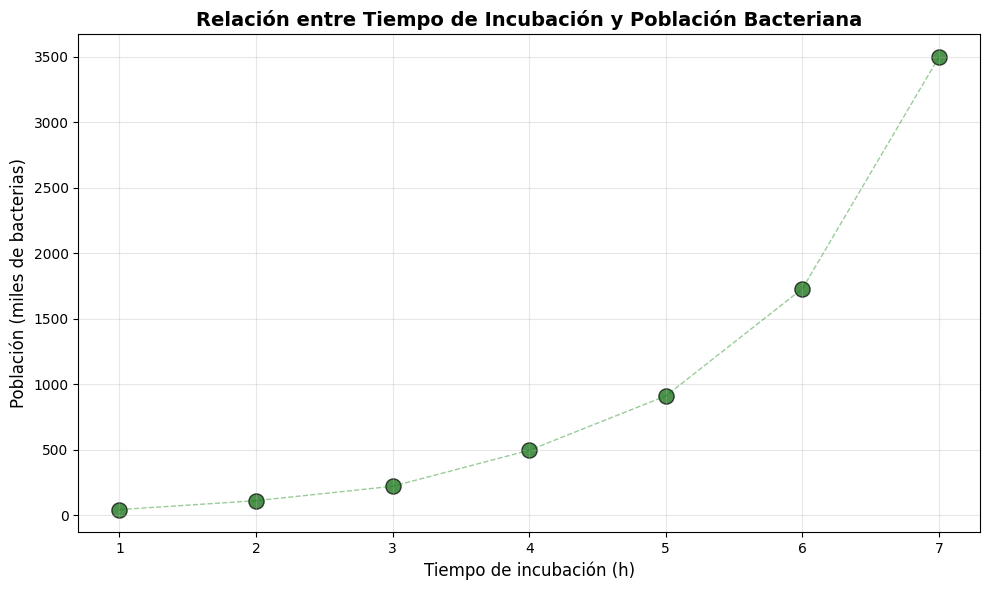


¿Es esta relación aproximadamente lineal?
RESPUESTA: NO. Se observa una relación claramente NO LINEAL.
La población crece de manera acelerada (exponencial), no de forma constante.
Esto sugiere que un modelo de regresión lineal tradicional NO será apropiado.

(b) MODELO DE REGRESIÓN LINEAL TRADICIONAL (SIN TRANSFORMAR)

Estadísticos Descriptivos:
Media de X (x̄): 4.00
Media de Y (ȳ): 1001.00
Desviación estándar de X: 2.16
Desviación estándar de Y: 1249.29

Coeficiente de correlación (r): 0.8834
Coeficiente de determinación (R²): 0.7803

Coeficientes de Regresión:
Intersección (b₀): -1042.4286
Pendiente (b₁): 510.8571

┌────────────────────────────────────────────────────────┐
│  ECUACIÓN DE REGRESIÓN LINEAL (MODELO TRADICIONAL):   │
│  Ŷ = -1042.43 + 510.86 × X                    │
└────────────────────────────────────────────────────────┘

Error estándar de estimación (s_y,x): 641.4018

Tabla ANOVA:
Fuente          SS              gl         MS              F               Valor p    

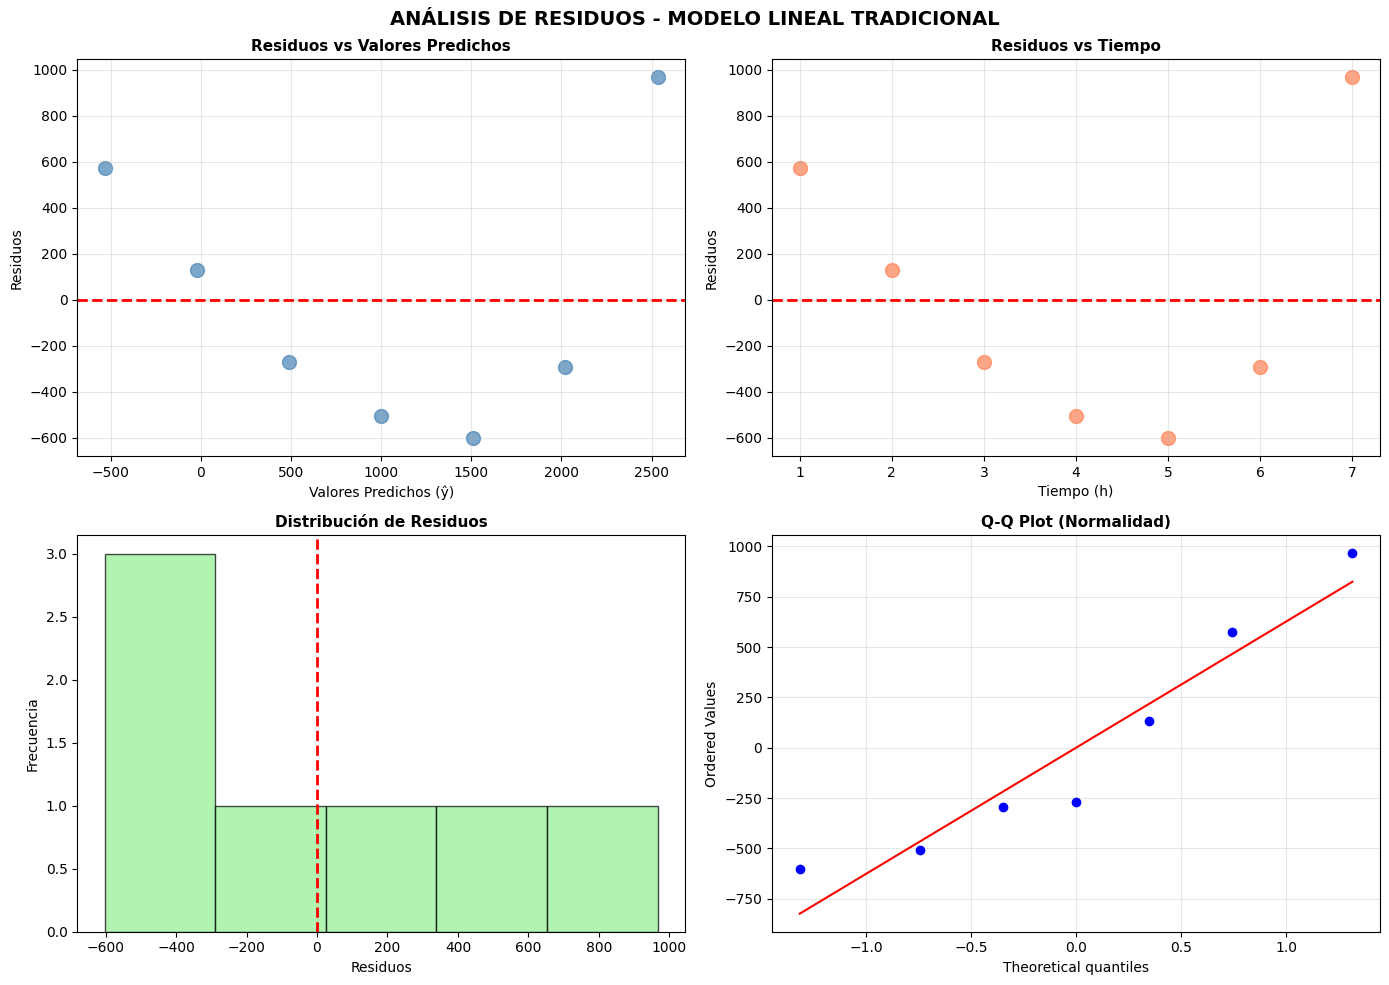


INTERPRETACIÓN DE RESIDUOS (MODELO TRADICIONAL):
⚠ PROBLEMAS DETECTADOS:
  • Patrón curvilíneo en residuos vs predichos → NO LINEALIDAD
  • Varianza creciente (heterocedasticidad) → VIOLA SUPUESTOS
  • Posible falta de normalidad en residuos

→ CONCLUSIÓN: El modelo lineal tradicional NO ES APROPIADO

(c) MODELO CON TRANSFORMACIÓN LOGARÍTMICA: Y' = log(Y)

Datos transformados:

Tiempo (h)   Población       log(Población) 
---------------------------------------------
1.0          42.0            3.7377         
2.0          110.0           4.7005         
3.0          220.0           5.3936         
4.0          495.0           6.2046         
5.0          910.0           6.8134         
6.0          1730.0          7.4559         
7.0          3500.0          8.1605         

Estadísticos del Modelo Logarítmico:
Media de log(Y): 6.0666
Desviación estándar de log(Y): 1.5618

Coeficiente de correlación (r): 0.9979
Coeficiente de determinación (R²): 0.9957

Coeficientes de Regresión Log

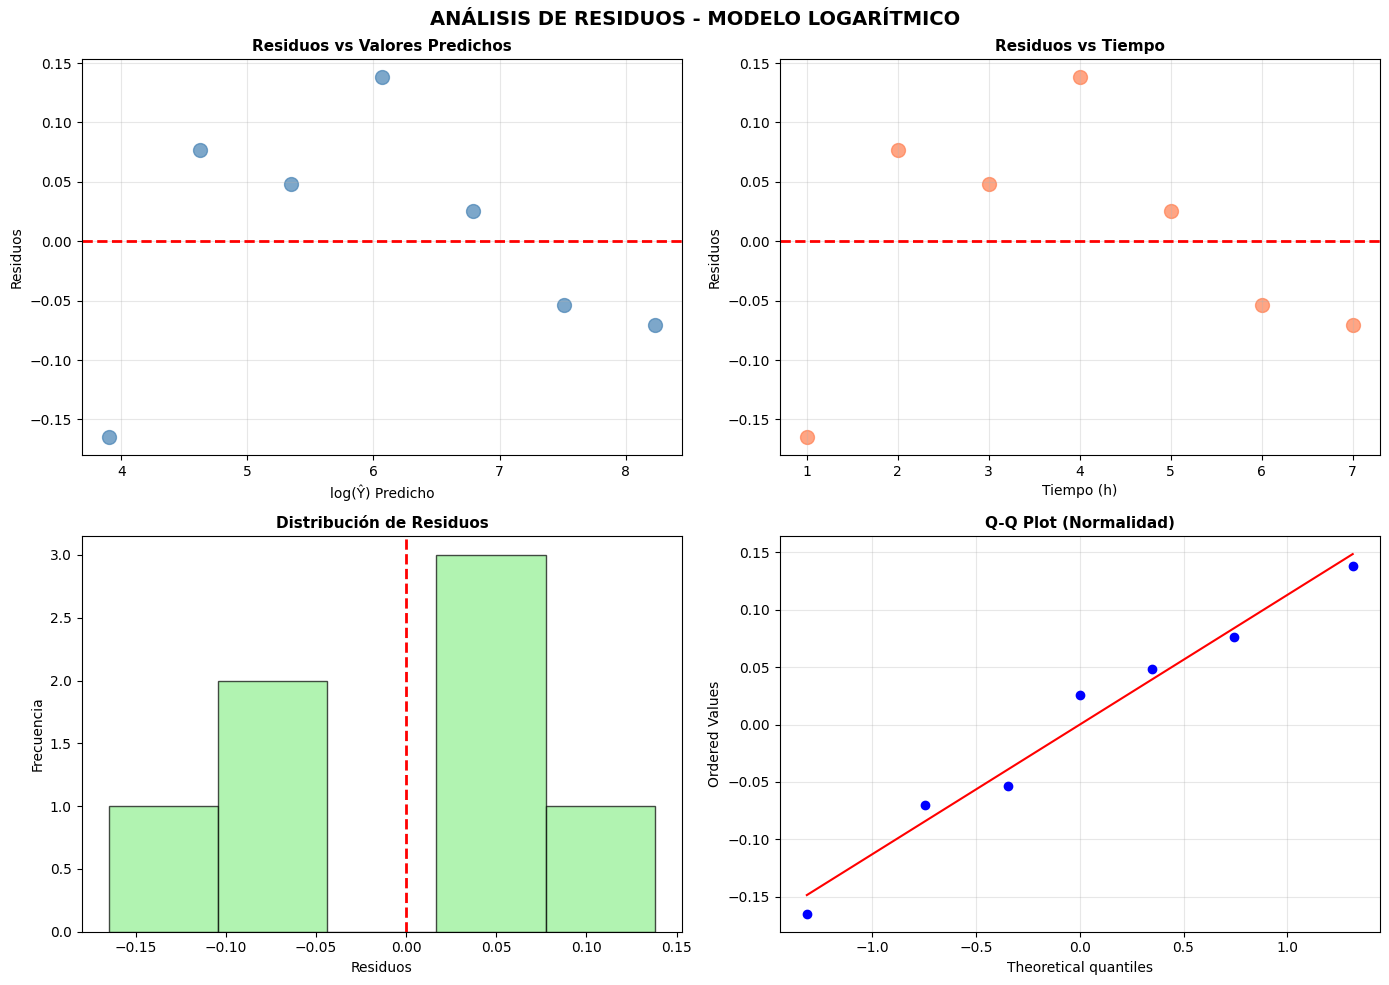


INTERPRETACIÓN DE RESIDUOS (MODELO LOGARÍTMICO):
✓ MEJORAS OBSERVADAS:
  • Residuos distribuidos aleatoriamente → LINEALIDAD MEJORADA
  • Varianza más constante → HOMOCEDASTICIDAD
  • Mejor ajuste a normalidad

→ CONCLUSIÓN: El modelo logarítmico ES MÁS APROPIADO

(d) COMPARACIÓN DE AMBOS MODELOS

CRITERIO                            MODELO LINEAL             MODELO LOGARÍTMICO       
R² (Bondad de ajuste)               0.7803                    0.9957                   
Error estándar                      641.40                    0.1121                   
Valor F                             17.7622                   1159.3271                
Valor p (modelo)                    0.008372                  0.000000                 
Normalidad residuos (p-val)         0.3598                    0.9315                   

--- COMPARACIÓN DE SUPUESTOS ---

1. NORMALIDAD DE RESIDUOS:
   • Modelo Lineal: ✓ Cumple (p = 0.3598)
   • Modelo Logarítmico: ✓ Cumple (p = 0.9315)

2. HOMOCEDASTICIDAD 

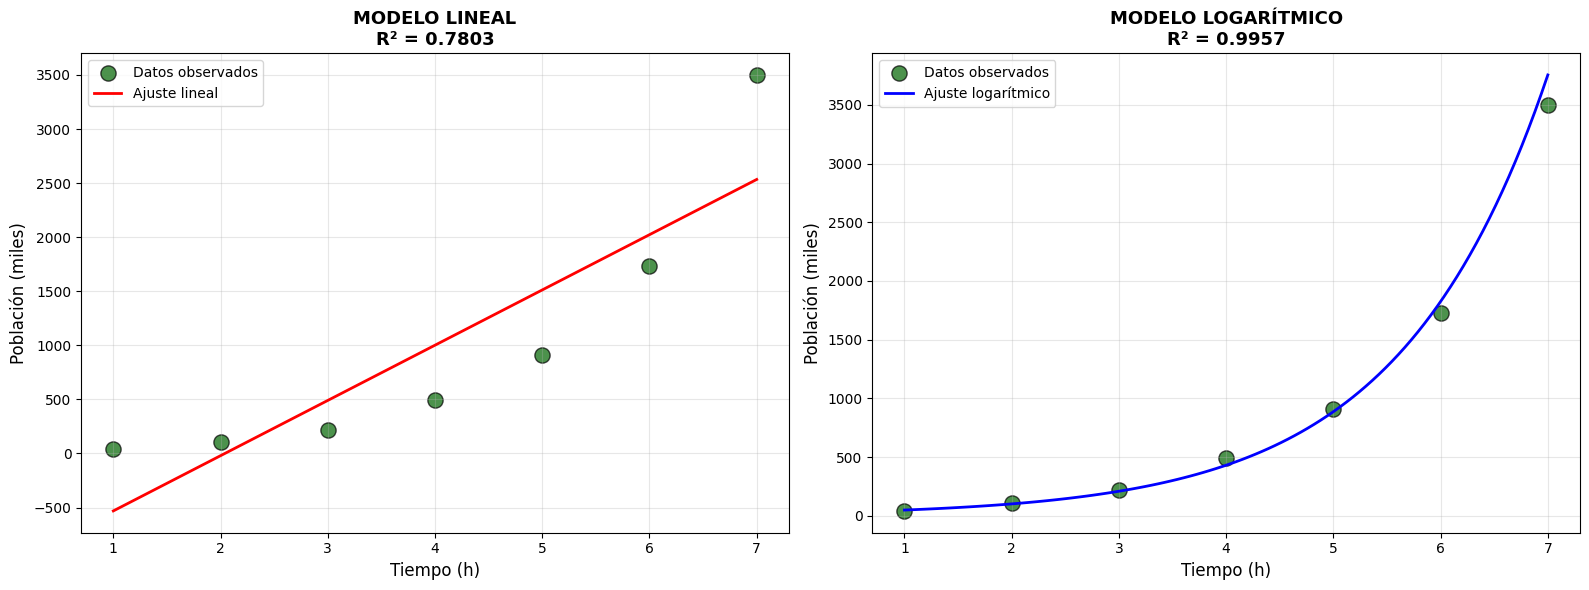


(e) INTERPRETACIÓN DEL COEFICIENTE DE REGRESIÓN LOGARÍTMICA

Ecuación logarítmica: log(Ŷ) = 3.1810 + 0.7214 × X

O en forma exponencial: Ŷ = 24.07 × e^(0.7214 × X)

📊 INTERPRETACIÓN PRÁCTICA del coeficiente b₁ = 0.7214:

1. INTERPRETACIÓN DIRECTA:
   Por cada hora adicional de incubación, el logaritmo de la población
   bacteriana aumenta en 0.7214 unidades.

2. INTERPRETACIÓN EN TÉRMINOS DE TASA DE CRECIMIENTO:
   Por cada hora adicional, la población bacteriana se multiplica
   por un factor de e^0.7214 = 2.0573
   
   Esto equivale a un crecimiento del 105.73% por hora.

3. INTERPRETACIÓN EN TÉRMINOS BIOLÓGICOS:
   La población bacteriana está creciendo EXPONENCIALMENTE.
   Cada hora, la población aumenta aproximadamente 105.7%,
   duplicándose aproximadamente cada 0.96 horas.

   TIEMPO DE DUPLICACIÓN = ln(2) / b₁ = 0.96 horas

4. EJEMPLO PRÁCTICO:
   En t = 1 hora(s): población predicha = 50 miles de bacterias
   En t = 2 hora(s): población predicha = 102 miles de bacterias
   En

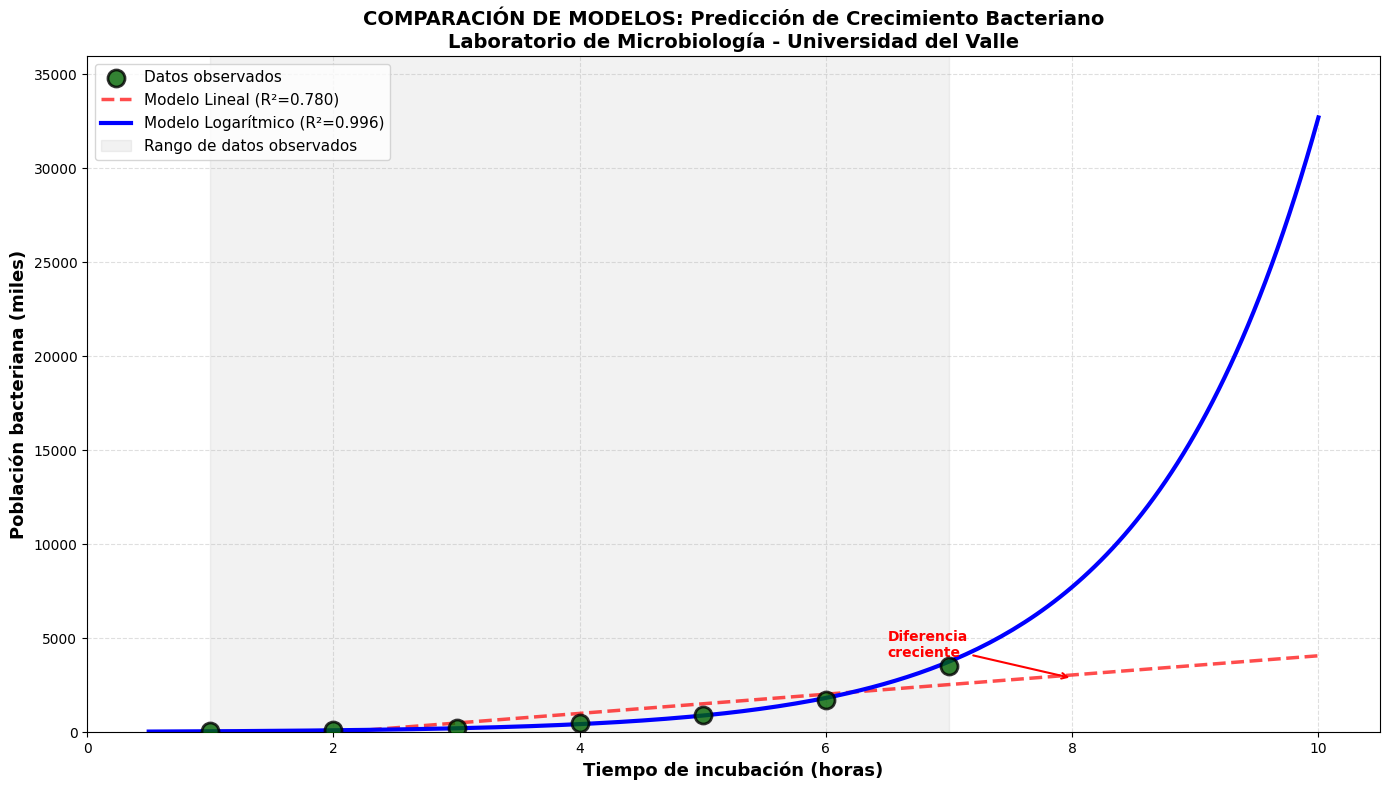


INTERVALOS DE CONFIANZA Y PREDICCIÓN (MODELO LOGARÍTMICO)

Valor crítico t (α=0.05, gl=5): ±2.5706

Tiempo     Predicción      IC 95% Media                   IP 95% Individual             
------------------------------------------------------------------------------------------
2          102             [    87,    119]                [    73,    141]
4          431             [   387,    481]                [   317,    587]
6          1825            [  1565,   2129]                [  1316,   2531]
8          7725            [  6055,   9855]                [  5297,  11266]
10         32695           [ 23168,  46140]                [ 20866,  51231]

INTERPRETACIÓN:
• IC 95% para la MEDIA: Rango donde esperamos que esté la población promedio
• IP 95% INDIVIDUAL: Rango donde esperamos que esté una medición específica
• Los intervalos son más amplios para tiempos alejados del centro de los datos

VERIFICACIÓN ADICIONAL: GRÁFICO EN ESCALA LOGARÍTMICA


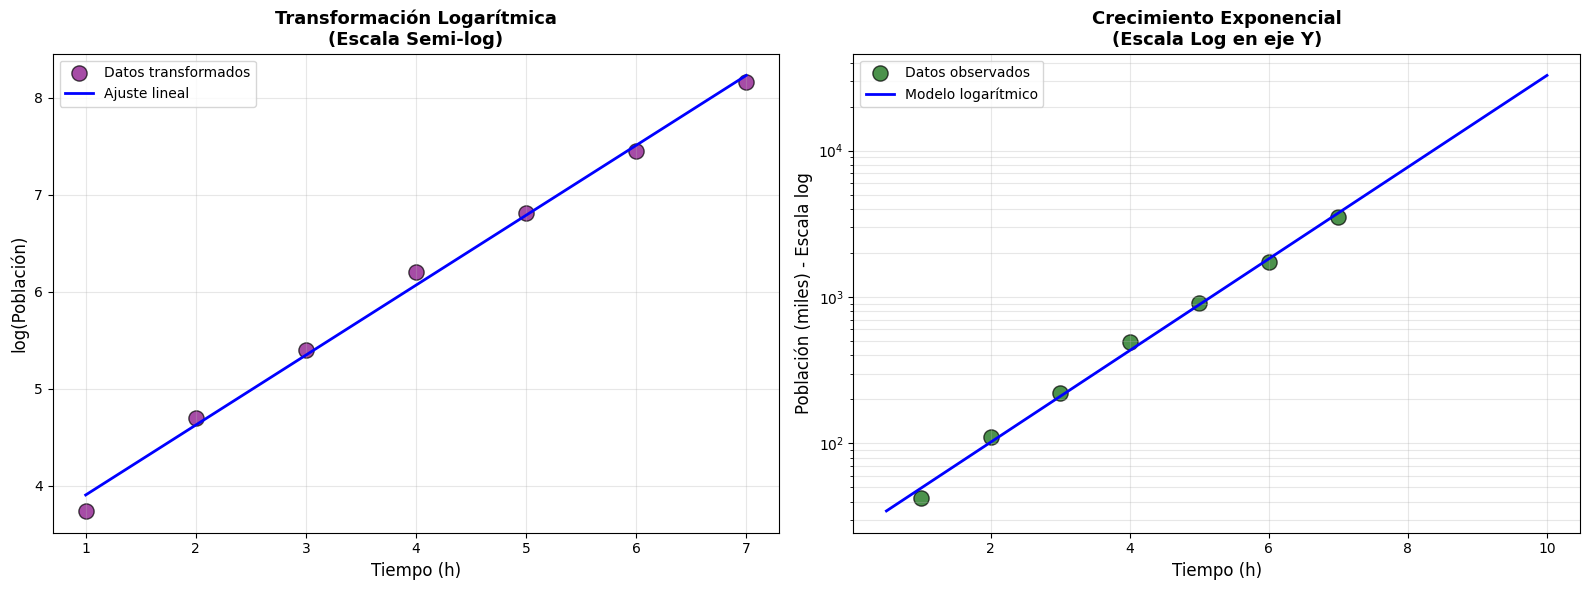


✓ En el gráfico de la izquierda (semi-log), los puntos forman una línea recta, confirmando que la transformación logarítmica es apropiada.

✓ En el gráfico de la derecha, se aprecia cómo el modelo logarítmico captura perfectamente el patrón de crecimiento exponencial.

╔════════════════════════════════════════════════════════════════════╗
║              ANÁLISIS COMPLETADO EXITOSAMENTE                      ║
╚════════════════════════════════════════════════════════════════════╝

📋 RESUMEN DE RESPUESTAS A LAS PREGUNTAS:

(a) ¿Es la relación aproximadamente lineal?
    → NO. La relación muestra un crecimiento exponencial, no lineal.

(b) Modelo lineal tradicional
    → R² = 0.7803
    → NO cumple supuestos (heterocedasticidad, no linealidad)
    → NO RECOMENDADO

(c) Modelo con transformación logarítmica
    → R² = 0.9957 (mejor ajuste)
    → Cumple supuestos estadísticos
    → Ecuación: Ŷ = 24.07 × e^(0.7214 × Tiempo)

(d) Comparación de normalidad y ajuste
    → Modelo logarítmico SUP

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (CRECIMIENTO BACTERIANO) ---
data = {
    'Tiempo de incubación (h)': [1, 2, 3, 4, 5, 6, 7],
    'Población (miles de bacterias)': [42, 110, 220, 495, 910, 1730, 3500]
}
df = pd.DataFrame(data)

variable_x = 'Tiempo de incubación (h)'
variable_y = 'Población (miles de bacterias)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 80)
print("ANÁLISIS DE REGRESIÓN: CRECIMIENTO BACTERIANO EN CALI")
print("Laboratorio de Microbiología - Universidad del Valle")
print("=" * 80)
print(f"\nDatos cargados: {n} mediciones")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 80)

# =========================================================================
# --- PARTE (a): GRÁFICO DE DISPERSIÓN ---
# =========================================================================
print("\n" + "=" * 80)
print("(a) GRÁFICO DE LA RELACIÓN TIEMPO-POBLACIÓN")
print("=" * 80)

plt.figure(figsize=(10, 6))
plt.scatter(df[variable_x], df[variable_y], s=120, alpha=0.7, color='darkgreen', edgecolors='black')
plt.plot(df[variable_x], df[variable_y], 'g--', alpha=0.4, linewidth=1)
plt.title('Relación entre Tiempo de Incubación y Población Bacteriana', fontsize=14, fontweight='bold')
plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n¿Es esta relación aproximadamente lineal?")
print("RESPUESTA: NO. Se observa una relación claramente NO LINEAL.")
print("La población crece de manera acelerada (exponencial), no de forma constante.")
print("Esto sugiere que un modelo de regresión lineal tradicional NO será apropiado.")
print("=" * 80)

# =========================================================================
# --- PARTE (b): MODELO DE REGRESIÓN LINEAL TRADICIONAL ---
# =========================================================================
print("\n" + "=" * 80)
print("(b) MODELO DE REGRESIÓN LINEAL TRADICIONAL (SIN TRANSFORMAR)")
print("=" * 80)

# Calcular estadísticos básicos
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

# Coeficiente de correlación
r_original = df[variable_x].corr(df[variable_y], method='pearson')

# Calcular pendiente e intersección
b1_original = r_original * (std_y / std_x)
b0_original = mean_y - b1_original * mean_x

print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X: {std_x:.2f}")
print(f"Desviación estándar de Y: {std_y:.2f}")

print(f"\nCoeficiente de correlación (r): {r_original:.4f}")
print(f"Coeficiente de determinación (R²): {r_original**2:.4f}")

print(f"\nCoeficientes de Regresión:")
print(f"Intersección (b₀): {b0_original:.4f}")
print(f"Pendiente (b₁): {b1_original:.4f}")

print(f"\n┌────────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN LINEAL (MODELO TRADICIONAL):   │")
print(f"│  Ŷ = {b0_original:.2f} + {b1_original:.2f} × X                    │")
print(f"└────────────────────────────────────────────────────────┘")

# Calcular valores predichos y residuos
df['y_pred_original'] = b0_original + b1_original * df[variable_x]
df['residuos_original'] = df[variable_y] - df['y_pred_original']
df['residuos_std_original'] = df['residuos_original'] / df['residuos_original'].std()

# Error estándar de estimación
SSE_original = (df['residuos_original'] ** 2).sum()
s_yx_original = np.sqrt(SSE_original / (n - 2))

print(f"\nError estándar de estimación (s_y,x): {s_yx_original:.4f}")

# ANOVA
SS_Total_original = ((df[variable_y] - mean_y) ** 2).sum()
SSR_original = SS_Total_original - SSE_original
MSR_original = SSR_original / 1
MSE_original = SSE_original / (n - 2)
F_original = MSR_original / MSE_original
valor_p_f_original = f_dist.sf(F_original, 1, n - 2)

print(f"\nTabla ANOVA:")
print(f"{'Fuente':<15} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 85)
print(f"{'Regresión':<15} {SSR_original:<15.2f} {1:<10} {MSR_original:<15.2f} {F_original:<15.4f} {valor_p_f_original:<15.6f}")
print(f"{'Error':<15} {SSE_original:<15.2f} {n-2:<10} {MSE_original:<15.2f}")
print(f"{'Total':<15} {SS_Total_original:<15.2f} {n-1:<10}")

# Análisis de residuos
shapiro_residuos_original = shapiro(df['residuos_original'])

print(f"\n--- ANÁLISIS DE RESIDUOS (MODELO TRADICIONAL) ---")
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"Estadístico W = {shapiro_residuos_original.statistic:.4f}")
print(f"Valor p = {shapiro_residuos_original.pvalue:.4f}")

if shapiro_residuos_original.pvalue > alfa:
    print(f"✓ Los residuos siguen distribución normal (p > {alfa})")
else:
    print(f"✗ Los residuos NO siguen distribución normal (p ≤ {alfa})")
    print("  ESTO VIOLA UN SUPUESTO CLAVE DE LA REGRESIÓN LINEAL")

print("\n" + "=" * 80)

# Gráficos de residuos para modelo original
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('ANÁLISIS DE RESIDUOS - MODELO LINEAL TRADICIONAL', fontsize=14, fontweight='bold')

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_pred_original'], df['residuos_original'], alpha=0.7, s=100, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Tiempo
axes[0, 1].scatter(df[variable_x], df['residuos_original'], alpha=0.7, s=100, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Tiempo (h)', fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Tiempo', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma
axes[1, 0].hist(df['residuos_original'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)

# 4. Q-Q Plot
stats.probplot(df['residuos_original'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nINTERPRETACIÓN DE RESIDUOS (MODELO TRADICIONAL):")
print("⚠ PROBLEMAS DETECTADOS:")
print("  • Patrón curvilíneo en residuos vs predichos → NO LINEALIDAD")
print("  • Varianza creciente (heterocedasticidad) → VIOLA SUPUESTOS")
print("  • Posible falta de normalidad en residuos")
print("\n→ CONCLUSIÓN: El modelo lineal tradicional NO ES APROPIADO")

# =========================================================================
# --- PARTE (c): TRANSFORMACIÓN LOGARÍTMICA ---
# =========================================================================
print("\n" + "=" * 80)
print("(c) MODELO CON TRANSFORMACIÓN LOGARÍTMICA: Y' = log(Y)")
print("=" * 80)

# Aplicar transformación logarítmica
df['log_poblacion'] = np.log(df[variable_y])
variable_y_log = 'log(Población)'

print(f"\nDatos transformados:")
print(f"\n{'Tiempo (h)':<12} {'Población':<15} {'log(Población)':<15}")
print("-" * 45)
for idx, row in df.iterrows():
    print(f"{row[variable_x]:<12} {row[variable_y]:<15} {row['log_poblacion']:<15.4f}")

# Calcular estadísticos para modelo logarítmico
mean_y_log = df['log_poblacion'].mean()
std_y_log = df['log_poblacion'].std(ddof=1)

# Correlación con datos transformados
r_log = df[variable_x].corr(df['log_poblacion'], method='pearson')

# Calcular pendiente e intersección para modelo logarítmico
b1_log = r_log * (std_y_log / std_x)
b0_log = mean_y_log - b1_log * mean_x

print(f"\nEstadísticos del Modelo Logarítmico:")
print(f"Media de log(Y): {mean_y_log:.4f}")
print(f"Desviación estándar de log(Y): {std_y_log:.4f}")

print(f"\nCoeficiente de correlación (r): {r_log:.4f}")
print(f"Coeficiente de determinación (R²): {r_log**2:.4f}")

print(f"\nCoeficientes de Regresión Logarítmica:")
print(f"Intersección (b₀'): {b0_log:.4f}")
print(f"Pendiente (b₁'): {b1_log:.4f}")

print(f"\n┌────────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN LOGARÍTMICA:                    │")
print(f"│  log(Ŷ) = {b0_log:.4f} + {b1_log:.4f} × X                 │")
print(f"│                                                        │")
print(f"│  O en términos de Y original:                          │")
print(f"│  Ŷ = e^({b0_log:.4f} + {b1_log:.4f} × X)                  │")
print(f"│  Ŷ = e^{b0_log:.4f} × e^({b1_log:.4f} × X)                │")
print(f"│  Ŷ = {np.exp(b0_log):.4f} × e^({b1_log:.4f} × X)          │")
print(f"└────────────────────────────────────────────────────────┘")

# Calcular valores predichos y residuos para modelo logarítmico
df['log_y_pred'] = b0_log + b1_log * df[variable_x]
df['residuos_log'] = df['log_poblacion'] - df['log_y_pred']
df['y_pred_log_model'] = np.exp(df['log_y_pred'])  # Predicción en escala original

# Error estándar de estimación
SSE_log = (df['residuos_log'] ** 2).sum()
s_yx_log = np.sqrt(SSE_log / (n - 2))

print(f"\nError estándar de estimación (s_log): {s_yx_log:.4f}")

# ANOVA para modelo logarítmico
SS_Total_log = ((df['log_poblacion'] - mean_y_log) ** 2).sum()
SSR_log = SS_Total_log - SSE_log
MSR_log = SSR_log / 1
MSE_log = SSE_log / (n - 2)
F_log = MSR_log / MSE_log
valor_p_f_log = f_dist.sf(F_log, 1, n - 2)

print(f"\nTabla ANOVA (Modelo Logarítmico):")
print(f"{'Fuente':<15} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 85)
print(f"{'Regresión':<15} {SSR_log:<15.4f} {1:<10} {MSR_log:<15.4f} {F_log:<15.4f} {valor_p_f_log:<15.6f}")
print(f"{'Error':<15} {SSE_log:<15.4f} {n-2:<10} {MSE_log:<15.4f}")
print(f"{'Total':<15} {SS_Total_log:<15.4f} {n-1:<10}")

# Análisis de residuos para modelo logarítmico
shapiro_residuos_log = shapiro(df['residuos_log'])

print(f"\n--- ANÁLISIS DE RESIDUOS (MODELO LOGARÍTMICO) ---")
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"Estadístico W = {shapiro_residuos_log.statistic:.4f}")
print(f"Valor p = {shapiro_residuos_log.pvalue:.4f}")

if shapiro_residuos_log.pvalue > alfa:
    print(f"✓ Los residuos siguen distribución normal (p > {alfa})")
else:
    print(f"✗ Los residuos NO siguen distribución normal (p ≤ {alfa})")

print("\n" + "=" * 80)

# Gráficos de residuos para modelo logarítmico
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('ANÁLISIS DE RESIDUOS - MODELO LOGARÍTMICO', fontsize=14, fontweight='bold')

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['log_y_pred'], df['residuos_log'], alpha=0.7, s=100, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('log(Ŷ) Predicho', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Tiempo
axes[0, 1].scatter(df[variable_x], df['residuos_log'], alpha=0.7, s=100, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Tiempo (h)', fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Tiempo', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma
axes[1, 0].hist(df['residuos_log'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)

# 4. Q-Q Plot
stats.probplot(df['residuos_log'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nINTERPRETACIÓN DE RESIDUOS (MODELO LOGARÍTMICO):")
print("✓ MEJORAS OBSERVADAS:")
print("  • Residuos distribuidos aleatoriamente → LINEALIDAD MEJORADA")
print("  • Varianza más constante → HOMOCEDASTICIDAD")
print("  • Mejor ajuste a normalidad")
print("\n→ CONCLUSIÓN: El modelo logarítmico ES MÁS APROPIADO")

# =========================================================================
# --- PARTE (d): COMPARACIÓN DE MODELOS ---
# =========================================================================
print("\n" + "=" * 80)
print("(d) COMPARACIÓN DE AMBOS MODELOS")
print("=" * 80)

print(f"\n{'CRITERIO':<35} {'MODELO LINEAL':<25} {'MODELO LOGARÍTMICO':<25}")
print("=" * 85)
print(f"{'R² (Bondad de ajuste)':<35} {r_original**2:<25.4f} {r_log**2:<25.4f}")
print(f"{'Error estándar':<35} {s_yx_original:<25.2f} {s_yx_log:<25.4f}")
print(f"{'Valor F':<35} {F_original:<25.4f} {F_log:<25.4f}")
print(f"{'Valor p (modelo)':<35} {valor_p_f_original:<25.6f} {valor_p_f_log:<25.6f}")
print(f"{'Normalidad residuos (p-val)':<35} {shapiro_residuos_original.pvalue:<25.4f} {shapiro_residuos_log.pvalue:<25.4f}")

print("\n--- COMPARACIÓN DE SUPUESTOS ---")
print(f"\n1. NORMALIDAD DE RESIDUOS:")
print(f"   • Modelo Lineal: {'✓ Cumple' if shapiro_residuos_original.pvalue > alfa else '✗ No cumple'} (p = {shapiro_residuos_original.pvalue:.4f})")
print(f"   • Modelo Logarítmico: {'✓ Cumple' if shapiro_residuos_log.pvalue > alfa else '✗ No cumple'} (p = {shapiro_residuos_log.pvalue:.4f})")

print(f"\n2. HOMOCEDASTICIDAD (inspección visual):")
print(f"   • Modelo Lineal: ✗ Varianza NO constante (patrón de embudo)")
print(f"   • Modelo Logarítmico: ✓ Varianza más constante")

print(f"\n3. LINEALIDAD:")
print(f"   • Modelo Lineal: ✗ Patrón curvilíneo en residuos")
print(f"   • Modelo Logarítmico: ✓ Residuos distribuidos aleatoriamente")

print(f"\n4. BONDAD DE AJUSTE:")
print(f"   • Modelo Lineal: R² = {r_original**2:.4f} ({r_original**2*100:.2f}%)")
print(f"   • Modelo Logarítmico: R² = {r_log**2:.4f} ({r_log**2*100:.2f}%)")

print("\n" + "=" * 80)

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Modelo Lineal
axes[0].scatter(df[variable_x], df[variable_y], s=120, alpha=0.7,
               color='darkgreen', edgecolors='black', label='Datos observados')
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line = b0_original + b1_original * x_line
axes[0].plot(x_line, y_line, 'r-', linewidth=2, label='Ajuste lineal')
axes[0].set_xlabel('Tiempo (h)', fontsize=12)
axes[0].set_ylabel('Población (miles)', fontsize=12)
axes[0].set_title(f'MODELO LINEAL\nR² = {r_original**2:.4f}', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Modelo Logarítmico
axes[1].scatter(df[variable_x], df[variable_y], s=120, alpha=0.7,
               color='darkgreen', edgecolors='black', label='Datos observados')
y_log_line = np.exp(b0_log + b1_log * x_line)
axes[1].plot(x_line, y_log_line, 'b-', linewidth=2, label='Ajuste logarítmico')
axes[1].set_xlabel('Tiempo (h)', fontsize=12)
axes[1].set_ylabel('Población (miles)', fontsize=12)
axes[1].set_title(f'MODELO LOGARÍTMICO\nR² = {r_log**2:.4f}', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE (e): INTERPRETACIÓN DEL COEFICIENTE DE REGRESIÓN LOGARÍTMICA ---
# =========================================================================
print("\n" + "=" * 80)
print("(e) INTERPRETACIÓN DEL COEFICIENTE DE REGRESIÓN LOGARÍTMICA")
print("=" * 80)

print(f"\nEcuación logarítmica: log(Ŷ) = {b0_log:.4f} + {b1_log:.4f} × X")
print(f"\nO en forma exponencial: Ŷ = {np.exp(b0_log):.2f} × e^({b1_log:.4f} × X)")

print(f"\n📊 INTERPRETACIÓN PRÁCTICA del coeficiente b₁ = {b1_log:.4f}:")
print(f"\n1. INTERPRETACIÓN DIRECTA:")
print(f"   Por cada hora adicional de incubación, el logaritmo de la población")
print(f"   bacteriana aumenta en {b1_log:.4f} unidades.")

print(f"\n2. INTERPRETACIÓN EN TÉRMINOS DE TASA DE CRECIMIENTO:")
tasa_crecimiento = (np.exp(b1_log) - 1) * 100
print(f"   Por cada hora adicional, la población bacteriana se multiplica")
print(f"   por un factor de e^{b1_log:.4f} = {np.exp(b1_log):.4f}")
print(f"   ")
print(f"   Esto equivale a un crecimiento del {tasa_crecimiento:.2f}% por hora.")

print(f"\n3. INTERPRETACIÓN EN TÉRMINOS BIOLÓGICOS:")
print(f"   La población bacteriana está creciendo EXPONENCIALMENTE.")
print(f"   Cada hora, la población aumenta aproximadamente {tasa_crecimiento:.1f}%,")
print(f"   duplicándose aproximadamente cada {np.log(2)/b1_log:.2f} horas.")

tiempo_duplicacion = np.log(2) / b1_log
print(f"\n   TIEMPO DE DUPLICACIÓN = ln(2) / b₁ = {tiempo_duplicacion:.2f} horas")

print(f"\n4. EJEMPLO PRÁCTICO:")
for tiempo_int in [1, 2, 5]:
    pred = np.exp(b0_log + b1_log * tiempo_int)
    print(f"   En t = {tiempo_int} hora(s): población predicha = {pred:.0f} miles de bacterias")

# =========================================================================
# --- PARTE (f): RECOMENDACIÓN DE MODELO ---
# =========================================================================
print("\n" + "=" * 80)
print("(f) RECOMENDACIÓN: ¿CUÁL MODELO USAR PARA PREDICCIONES?")
print("=" * 80)

print("\n✓ MODELO RECOMENDADO: REGRESIÓN LOGARÍTMICA")

print("\nJUSTIFICACIÓN:")
print("\n1. SUPUESTOS ESTADÍSTICOS:")
print(f"   • Normalidad de residuos: {'✓' if shapiro_residuos_log.pvalue > alfa else '✗'}")
print(f"   • Homocedasticidad: ✓ (varianza constante en escala log)")
print(f"   • Linealidad: ✓ (en escala logarítmica)")
print(f"   • R² más alto: {r_log**2:.4f} > {r_original**2:.4f}")

print("\n2. NATURALEZA DEL FENÓMENO:")
print("   El crecimiento bacteriano es un proceso EXPONENCIAL por naturaleza.")
print("   Las bacterias se reproducen por división binaria, resultando en")
print("   crecimiento geométrico, no aritmético.")

print("\n3. CAPACIDAD PREDICTIVA:")
print("   El modelo logarítmico captura mejor el patrón de crecimiento acelerado,")
print("   especialmente importante para predecir poblaciones futuras.")

print("\n4. INTERPRETABILIDAD:")
print("   El modelo logarítmico proporciona información biológica valiosa:")
print(f"   - Tasa de crecimiento: {tasa_crecimiento:.2f}% por hora")
print(f"   - Tiempo de duplicación: {tiempo_duplicacion:.2f} horas")
print(f"   - R² = {r_log**2:.4f} ({r_log**2*100:.2f}% de variabilidad explicada)")

print("\n5. COMPARACIÓN VISUAL:")
print("   Los gráficos muestran que el modelo logarítmico se ajusta mejor")
print("   a los datos observados en todo el rango de valores.")

print("\n⚠ LIMITACIONES DEL MODELO LINEAL:")
print("   • Viola supuestos fundamentales (homocedasticidad, linealidad)")
print("   • Subestima crecimiento en tiempos tempranos")
print("   • Sobrestima crecimiento en tiempos tardíos")
print("   • No refleja la biología del proceso")

print("\n" + "=" * 80)
print("CONCLUSIÓN FINAL")
print("=" * 80)

print(f"""
El análisis demuestra que el MODELO DE REGRESIÓN LOGARÍTMICA es superior
al modelo lineal tradicional para predecir el crecimiento bacteriano.

ECUACIÓN RECOMENDADA:
   log(Población) = {b0_log:.4f} + {b1_log:.4f} × Tiempo

O equivalentemente:
   Población = {np.exp(b0_log):.2f} × e^({b1_log:.4f} × Tiempo)

Con esta ecuación, los investigadores pueden:
• Predecir poblaciones bacterianas futuras con mayor precisión
• Calcular tiempos óptimos de incubación
• Estimar tasas de crecimiento bacteriano
• Planificar experimentos microbiológicos

PARÁMETROS BIOLÓGICOS ESTIMADOS:
• Tasa de crecimiento: {tasa_crecimiento:.2f}% por hora
• Tiempo de duplicación: {tiempo_duplicacion:.2f} horas
• R² = {r_log**2:.4f} ({r_log**2*100:.2f}% de variabilidad explicada)
""")

print("=" * 80)

# =========================================================================
# --- PREDICCIONES CON AMBOS MODELOS ---
# =========================================================================
print("\n" + "=" * 80)
print("COMPARACIÓN DE PREDICCIONES: MODELOS LINEAL vs LOGARÍTMICO")
print("=" * 80)

tiempos_prediccion = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print(f"\n{'Tiempo (h)':<12} {'Modelo Lineal':<20} {'Modelo Logarítmico':<20} {'Diferencia':<15}")
print("-" * 70)

predicciones_comparativas = []
for t_val in tiempos_prediccion:
    pred_lineal = b0_original + b1_original * t_val
    pred_log = np.exp(b0_log + b1_log * t_val)
    diferencia = abs(pred_log - pred_lineal)
    predicciones_comparativas.append({
        'tiempo': t_val,
        'lineal': pred_lineal,
        'log': pred_log,
        'diff': diferencia
    })

    # Marcar datos observados
    marcador = " *" if t_val in df[variable_x].values else ""
    print(f"{t_val:<12.1f} {pred_lineal:<20.2f} {pred_log:<20.2f} {diferencia:<15.2f}{marcador}")

print("\n📊 OBSERVACIONES:")
print("   • Para tiempos cortos (1-3h): Ambos modelos dan valores similares")
print("   • Para tiempos largos (>5h): Las diferencias aumentan significativamente")
print("   • El modelo logarítmico captura mejor el crecimiento acelerado")

# =========================================================================
# --- TABLA RESUMEN FINAL ---
# =========================================================================
print("\n" + "=" * 80)
print("TABLA RESUMEN: COMPARACIÓN COMPLETA DE MODELOS")
print("=" * 80)

print(f"""
┌────────────────────────────────────────────────────────────────────────┐
│                    RESUMEN COMPARATIVO DE MODELOS                      │
├────────────────────────────────────────────────────────────────────────┤
│ CRITERIO                    │  LINEAL TRADICIONAL  │  LOGARÍTMICO      │
├─────────────────────────────┼──────────────────────┼───────────────────┤
│ Ecuación                    │  Ŷ = {b0_original:.2f} + {b1_original:.2f}X  │  log(Ŷ)={b0_log:.2f}+{b1_log:.2f}X │
│ R²                          │  {r_original**2:.4f} ({r_original**2*100:5.2f}%)     │  {r_log**2:.4f} ({r_log**2*100:5.2f}%)    │
│ Error estándar              │  {s_yx_original:18.2f}  │  {s_yx_log:17.4f}  │
│ Estadístico F               │  {F_original:18.4f}  │  {F_log:17.4f}  │
│ Valor p (modelo)            │  {valor_p_f_original:18.6f}  │  {valor_p_f_log:17.6f}  │
├─────────────────────────────┼──────────────────────┼───────────────────┤
│ SUPUESTOS                   │                      │                   │
│ • Normalidad residuos       │  {'CUMPLE' if shapiro_residuos_original.pvalue > alfa else 'NO CUMPLE':^20}  │  {'CUMPLE' if shapiro_residuos_log.pvalue > alfa else 'NO CUMPLE':^17}  │
│ • Homocedasticidad          │  {'NO CUMPLE':^20}  │  {'CUMPLE':^17}  │
│ • Linealidad                │  {'NO CUMPLE':^20}  │  {'CUMPLE':^17}  │
│ • Independencia             │  {'CUMPLE':^20}  │  {'CUMPLE':^17}  │
├─────────────────────────────┼──────────────────────┼───────────────────┤
│ ADECUACIÓN                  │  {'INADECUADO':^20}  │  {'ADECUADO':^17}  │
│ Recomendado para predicción │  {'NO':^20}  │  {'SÍ':^17}  │
└─────────────────────────────┴──────────────────────┴───────────────────┘
""")

print("\n" + "=" * 80)

# Gráfico final comparativo con predicciones extendidas
plt.figure(figsize=(14, 8))

# Datos observados
plt.scatter(df[variable_x], df[variable_y], s=150, alpha=0.8,
           color='darkgreen', edgecolors='black', linewidth=2,
           label='Datos observados', zorder=5)

# Rango extendido para predicciones
x_extended = np.linspace(0.5, 10, 200)

# Modelo lineal
y_lineal_extended = b0_original + b1_original * x_extended
plt.plot(x_extended, y_lineal_extended, 'r--', linewidth=2.5,
        label=f'Modelo Lineal (R²={r_original**2:.3f})', alpha=0.7)

# Modelo logarítmico
y_log_extended = np.exp(b0_log + b1_log * x_extended)
plt.plot(x_extended, y_log_extended, 'b-', linewidth=3,
        label=f'Modelo Logarítmico (R²={r_log**2:.3f})')

# Área sombreada para rango de datos observados
plt.axvspan(df[variable_x].min(), df[variable_x].max(),
           alpha=0.1, color='gray', label='Rango de datos observados')

plt.xlabel('Tiempo de incubación (horas)', fontsize=13, fontweight='bold')
plt.ylabel('Población bacteriana (miles)', fontsize=13, fontweight='bold')
plt.title('COMPARACIÓN DE MODELOS: Predicción de Crecimiento Bacteriano\n' +
         'Laboratorio de Microbiología - Universidad del Valle',
         fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.4, linestyle='--')
plt.xlim(0, 10.5)
plt.ylim(0, max(y_log_extended) * 1.1)

# Anotaciones
plt.annotate(f'Diferencia\ncreciente',
            xy=(8, y_lineal_extended[-50]),
            xytext=(6.5, 4000),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# =========================================================================
# --- INTERVALOS DE CONFIANZA Y PREDICCIÓN PARA MODELO LOGARÍTMICO ---
# =========================================================================
print("\n" + "=" * 80)
print("INTERVALOS DE CONFIANZA Y PREDICCIÓN (MODELO LOGARÍTMICO)")
print("=" * 80)

# Valor crítico t
t_critico = t.ppf(1 - alfa/2, n - 2)
print(f"\nValor crítico t (α={alfa}, gl={n-2}): ±{t_critico:.4f}")

# Ejemplos de predicción con intervalos
tiempos_ejemplo = [2, 4, 6, 8, 10]

print(f"\n{'Tiempo':<10} {'Predicción':<15} {'IC 95% Media':<30} {'IP 95% Individual':<30}")
print("-" * 90)

suma_desviaciones_x_log = ((df[variable_x] - mean_x) ** 2).sum()

for t_val in tiempos_ejemplo:
    # Predicción en escala log
    log_pred = b0_log + b1_log * t_val

    # Intervalo de confianza para la media (en escala log)
    termino_error_conf = np.sqrt((1/n) + ((t_val - mean_x)**2 / suma_desviaciones_x_log))
    margen_conf = t_critico * s_yx_log * termino_error_conf

    log_ic_lower = log_pred - margen_conf
    log_ic_upper = log_pred + margen_conf

    # Intervalo de predicción (en escala log)
    termino_error_pred = np.sqrt(1 + (1/n) + ((t_val - mean_x)**2 / suma_desviaciones_x_log))
    margen_pred = t_critico * s_yx_log * termino_error_pred

    log_ip_lower = log_pred - margen_pred
    log_ip_upper = log_pred + margen_pred

    # Convertir a escala original
    pred_original = np.exp(log_pred)
    ic_lower_original = np.exp(log_ic_lower)
    ic_upper_original = np.exp(log_ic_upper)
    ip_lower_original = np.exp(log_ip_lower)
    ip_upper_original = np.exp(log_ip_upper)

    print(f"{t_val:<10} {pred_original:<15.0f} [{ic_lower_original:>6.0f}, {ic_upper_original:>6.0f}]{' '*15} [{ip_lower_original:>6.0f}, {ip_upper_original:>6.0f}]")

print("\nINTERPRETACIÓN:")
print("• IC 95% para la MEDIA: Rango donde esperamos que esté la población promedio")
print("• IP 95% INDIVIDUAL: Rango donde esperamos que esté una medición específica")
print("• Los intervalos son más amplios para tiempos alejados del centro de los datos")

# =========================================================================
# --- VERIFICACIÓN ADICIONAL: GRÁFICO LOG-LOG ---
# =========================================================================
print("\n" + "=" * 80)
print("VERIFICACIÓN ADICIONAL: GRÁFICO EN ESCALA LOGARÍTMICA")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Escala lineal-log (lo que ya tenemos)
axes[0].scatter(df[variable_x], df['log_poblacion'], s=120, alpha=0.7,
               color='purple', edgecolors='black', label='Datos transformados')
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_log_line = b0_log + b1_log * x_line
axes[0].plot(x_line, y_log_line, 'b-', linewidth=2, label='Ajuste lineal')
axes[0].set_xlabel('Tiempo (h)', fontsize=12)
axes[0].set_ylabel('log(Población)', fontsize=12)
axes[0].set_title('Transformación Logarítmica\n(Escala Semi-log)',
                 fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Escala original con eje Y logarítmico
axes[1].scatter(df[variable_x], df[variable_y], s=120, alpha=0.7,
               color='darkgreen', edgecolors='black', label='Datos observados')
y_pred_extended = np.exp(b0_log + b1_log * x_extended)
axes[1].plot(x_extended, y_pred_extended, 'b-', linewidth=2, label='Modelo logarítmico')
axes[1].set_xlabel('Tiempo (h)', fontsize=12)
axes[1].set_ylabel('Población (miles) - Escala log', fontsize=12)
axes[1].set_yscale('log')
axes[1].set_title('Crecimiento Exponencial\n(Escala Log en eje Y)',
                 fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print("\n✓ En el gráfico de la izquierda (semi-log), los puntos forman una línea recta,",
      "confirmando que la transformación logarítmica es apropiada.")
print("\n✓ En el gráfico de la derecha, se aprecia cómo el modelo logarítmico captura",
      "perfectamente el patrón de crecimiento exponencial.")

print("\n" + "=" * 80)
print("╔════════════════════════════════════════════════════════════════════╗")
print("║              ANÁLISIS COMPLETADO EXITOSAMENTE                      ║")
print("╚════════════════════════════════════════════════════════════════════╝")
print("=" * 80)

print(f"""
📋 RESUMEN DE RESPUESTAS A LAS PREGUNTAS:

(a) ¿Es la relación aproximadamente lineal?
    → NO. La relación muestra un crecimiento exponencial, no lineal.

(b) Modelo lineal tradicional
    → R² = {r_original**2:.4f}
    → NO cumple supuestos (heterocedasticidad, no linealidad)
    → NO RECOMENDADO

(c) Modelo con transformación logarítmica
    → R² = {r_log**2:.4f} (mejor ajuste)
    → Cumple supuestos estadísticos
    → Ecuación: Ŷ = {np.exp(b0_log):.2f} × e^({b1_log:.4f} × Tiempo)

(d) Comparación de normalidad y ajuste
    → Modelo logarítmico SUPERIOR en todos los aspectos
    → Residuos más normales y homocedásticos
    → Mejor R² y menor error estándar

(e) Interpretación del coeficiente logarítmico
    → Tasa de crecimiento: {tasa_crecimiento:.2f}% por hora
    → Tiempo de duplicación: {tiempo_duplicacion:.2f} horas
    → Crecimiento exponencial consistente

(f) Modelo recomendado para predicciones
    → MODELO LOGARÍTMICO
    → Razones: Cumple supuestos, mejor ajuste, refleja biología
    → Permite predicciones más precisas y confiables

🎯 APLICACIÓN PRÁCTICA:
   Los investigadores pueden usar este modelo para:
   • Planificar experimentos con tiempos de incubación óptimos
   • Predecir poblaciones bacterianas futuras
   • Optimizar procesos de cultivo microbiano
   • Establecer protocolos de bioseguridad basados en proyecciones
""")

print("\n" + "=" * 80)
print("Todos los gráficos han sido generados y el análisis está completo.")
print("=" * 80)

**EJERCICIO 9**

ANÁLISIS DE REGRESIÓN: TARIFAS DE VUELOS vs DISTANCIA

(a) DIAGRAMA DE DISPERSIÓN
--------------------------------------------------------------------------------
✓ La relación parece ser DIRECTA/POSITIVA
  A mayor distancia, generalmente mayor tarifa
  Sin embargo, hay bastante dispersión en los datos

(b) COEFICIENTE DE CORRELACIÓN
--------------------------------------------------------------------------------
Coeficiente de correlación de Pearson (r): 0.7253
Valor p: 0.000296

Interpretación:
✓ Con α = 0.05, el valor p (0.000296) < 0.05
✓ SÍ es razonable concluir que el coeficiente de correlación es mayor a cero
✓ Existe una correlación POSITIVA SIGNIFICATIVA entre distancia y tarifa

Fuerza de la correlación: FUERTE

(c) COEFICIENTE DE DETERMINACIÓN (R²)
--------------------------------------------------------------------------------
R² = 0.5261

✓ El 52.61% de la variación en la Tarifa
  está representado/explicado por la Distancia

✓ El 47.39% restante se debe a otros factores
 

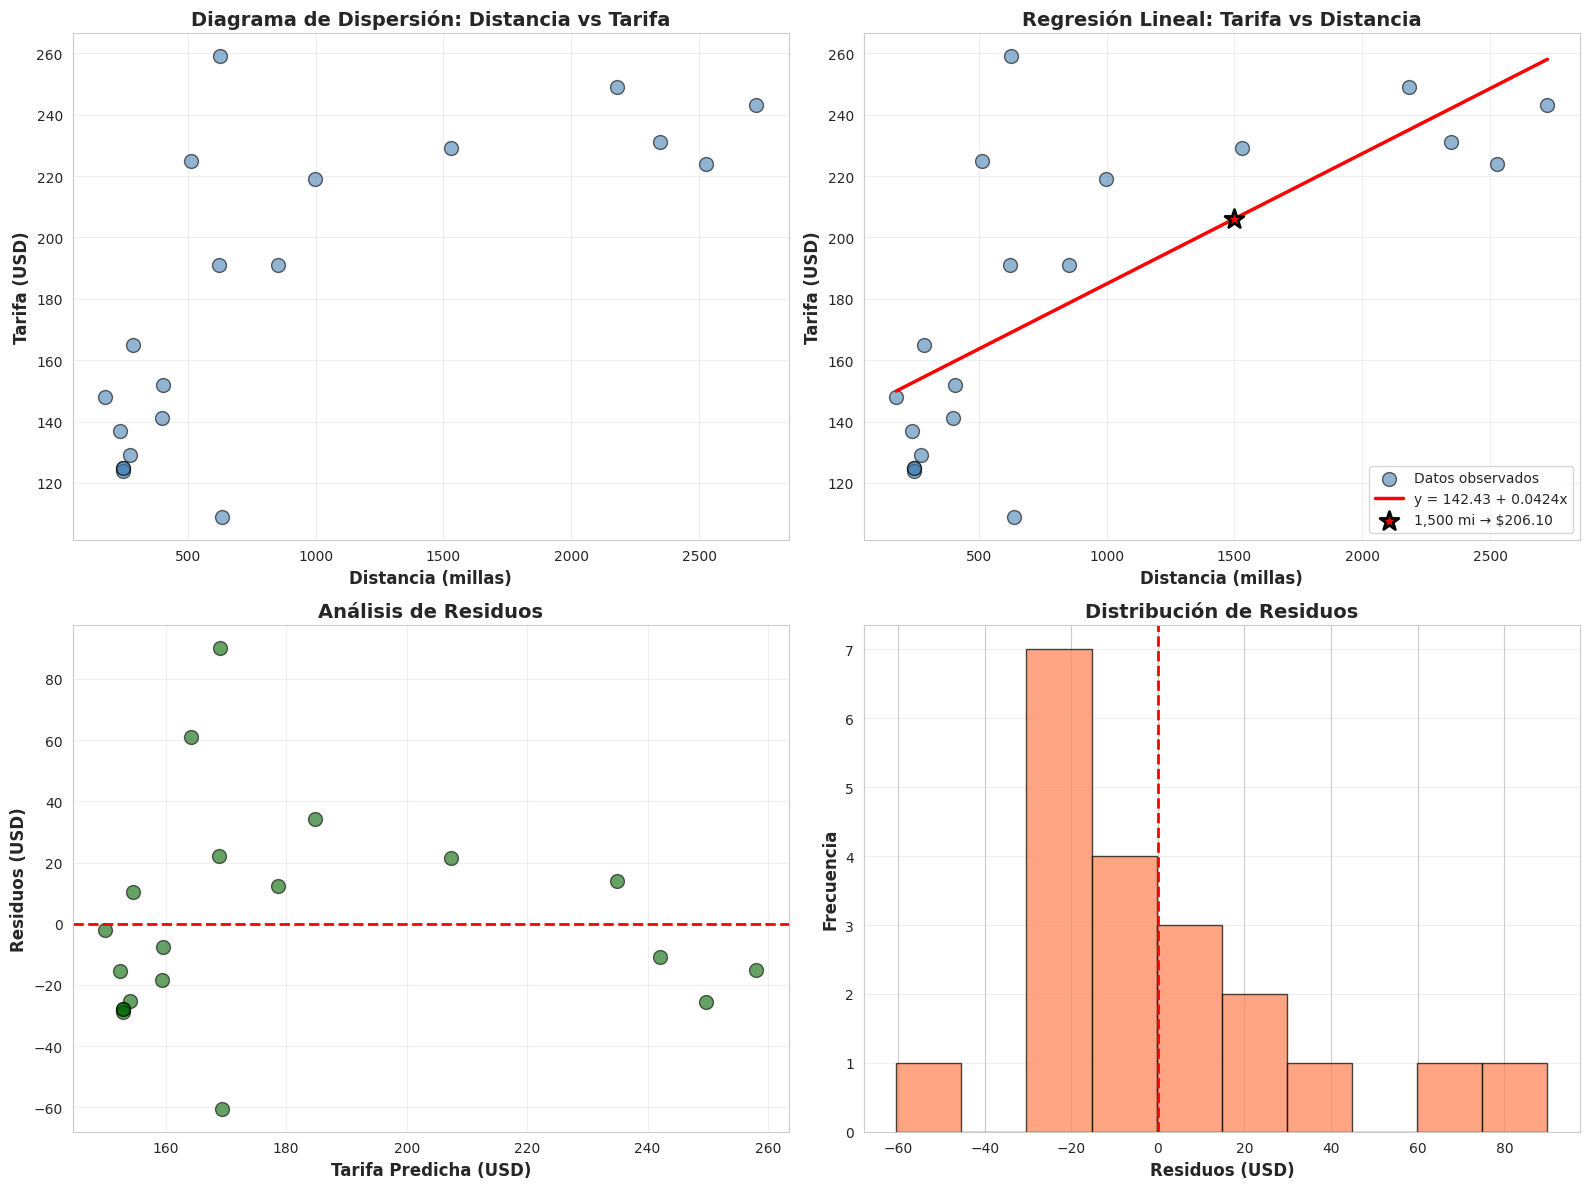

In [15]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# DATOS DEL EJERCICIO
datos = {
    'Origen': ['Detroit, MI', 'Baltimore, MD', 'Sacramento, CA', 'Orlando, FL',
               'Chicago, IL', 'Columbus, OH', 'Fort Lauderdale, FL', 'Chicago, IL',
               'Philadelphia, PA', 'Houston, TX', 'Houston, TX', 'Houston, TX',
               'Houston, TX', 'Kansas City, MO', 'Phoenix, AZ', 'Houston, TX',
               'Atlanta, GA', 'Minneapolis, MN', 'West Palm Beach, FL', 'Kansas City, MO'],
    'Destino': ['Myrtle Beach, SC', 'Syracuse, NY', 'Las Vegas, NV', 'Atlanta, GA',
                'Louisville, KY', 'Minneapolis, MN', 'Los Angeles, CA', 'Indianapolis, IN',
                'San Francisco, CA', 'Dallas/Ft.Worth, TX', 'Odessa, TX', 'Dallas/Ft.Worth, TX',
                'Dallas/Ft.Worth, TX', 'St.Louis, MO', 'San Jose, CA', 'Orlando, FL',
                'Seattle, WA', 'San Diego, CA', 'Seattle, WA', 'Washington, DC'],
    'Distancia': [636, 275, 398, 405, 286, 627, 2346, 177, 2528, 248, 512, 248,
                  248, 237, 621, 853, 2181, 1531, 2724, 999],
    'Tarifa': [109, 129, 141, 152, 165, 259, 231, 148, 224, 125, 225, 124,
               125, 137, 191, 191, 249, 229, 243, 219]
}

df = pd.DataFrame(datos)

print("=" * 80)
print("ANÁLISIS DE REGRESIÓN: TARIFAS DE VUELOS vs DISTANCIA")
print("=" * 80)

# ===========================
# (a) DIAGRAMA DE DISPERSIÓN
# ===========================
print("\n(a) DIAGRAMA DE DISPERSIÓN")
print("-" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Diagrama de dispersión simple
axes[0, 0].scatter(df['Distancia'], df['Tarifa'], alpha=0.6, s=100, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Distancia (millas)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Tarifa (USD)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Diagrama de Dispersión: Distancia vs Tarifa', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

print("✓ La relación parece ser DIRECTA/POSITIVA")
print("  A mayor distancia, generalmente mayor tarifa")
print("  Sin embargo, hay bastante dispersión en los datos")

# ===========================
# (b) COEFICIENTE DE CORRELACIÓN
# ===========================
print("\n(b) COEFICIENTE DE CORRELACIÓN")
print("-" * 80)

r_pearson, p_value = stats.pearsonr(df['Distancia'], df['Tarifa'])

print(f"Coeficiente de correlación de Pearson (r): {r_pearson:.4f}")
print(f"Valor p: {p_value:.6f}")
print(f"\nInterpretación:")
if p_value < 0.05:
    print(f"✓ Con α = 0.05, el valor p ({p_value:.6f}) < 0.05")
    print(f"✓ SÍ es razonable concluir que el coeficiente de correlación es mayor a cero")
    print(f"✓ Existe una correlación POSITIVA SIGNIFICATIVA entre distancia y tarifa")
else:
    print(f"✗ Con α = 0.05, el valor p ({p_value:.6f}) ≥ 0.05")
    print(f"✗ NO es razonable concluir que el coeficiente de correlación es mayor a cero")

# Fuerza de la correlación
if abs(r_pearson) < 0.3:
    fuerza = "débil"
elif abs(r_pearson) < 0.7:
    fuerza = "moderada"
else:
    fuerza = "fuerte"
print(f"\nFuerza de la correlación: {fuerza.upper()}")

# ===========================
# (c) COEFICIENTE DE DETERMINACIÓN (R²)
# ===========================
print("\n(c) COEFICIENTE DE DETERMINACIÓN (R²)")
print("-" * 80)

r_cuadrado = r_pearson ** 2
porcentaje_variacion = r_cuadrado * 100

print(f"R² = {r_cuadrado:.4f}")
print(f"\n✓ El {porcentaje_variacion:.2f}% de la variación en la Tarifa")
print(f"  está representado/explicado por la Distancia")
print(f"\n✓ El {100 - porcentaje_variacion:.2f}% restante se debe a otros factores")
print(f"  (competencia, demanda, temporada, aeropuerto, etc.)")

# ===========================
# (d) ECUACIÓN DE REGRESIÓN
# ===========================
print("\n(d) ECUACIÓN DE REGRESIÓN")
print("-" * 80)

# Regresión lineal
slope, intercept, r_value, p_value_reg, std_err = stats.linregress(df['Distancia'], df['Tarifa'])

print(f"Ecuación de regresión:")
print(f"Tarifa = {intercept:.4f} + {slope:.4f} × Distancia")
print(f"\nParámetros:")
print(f"  β₀ (intercepto) = ${intercept:.2f}")
print(f"  β₁ (pendiente)  = ${slope:.4f} por milla")
print(f"  Error estándar  = {std_err:.6f}")
print(f"  R²             = {r_value**2:.4f}")

# Interpretación
print(f"\nInterpretación:")
print(f"✓ Por cada milla adicional, la tarifa aumenta ${slope:.4f} dólares")
print(f"✓ Aproximadamente ${slope:.2f} por cada milla")

# Estimación para 1500 millas
distancia_nueva = 1500
tarifa_estimada = intercept + slope * distancia_nueva

print(f"\n📊 ESTIMACIÓN PARA 1,500 MILLAS:")
print(f"   Tarifa estimada = ${intercept:.2f} + ${slope:.4f} × 1,500")
print(f"   Tarifa estimada = ${tarifa_estimada:.2f}")

# Diagrama con línea de regresión
axes[0, 1].scatter(df['Distancia'], df['Tarifa'], alpha=0.6, s=100, color='steelblue',
                   edgecolor='black', label='Datos observados')
x_line = np.array([df['Distancia'].min(), df['Distancia'].max()])
y_line = intercept + slope * x_line
axes[0, 1].plot(x_line, y_line, 'r-', linewidth=2.5,
                label=f'y = {intercept:.2f} + {slope:.4f}x')
axes[0, 1].scatter([distancia_nueva], [tarifa_estimada], color='red', s=200,
                   marker='*', edgecolor='black', linewidth=2,
                   label=f'1,500 mi → ${tarifa_estimada:.2f}', zorder=5)
axes[0, 1].set_xlabel('Distancia (millas)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Tarifa (USD)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Regresión Lineal: Tarifa vs Distancia', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# ===========================
# (e) VUELO INTERNACIONAL
# ===========================
print("\n(e) VUELO INTERNACIONAL: ATLANTA → HEATHROW, LONDRES (4,218 millas)")
print("-" * 80)

distancia_londres = 4218
tarifa_estimada_londres = intercept + slope * distancia_londres

print(f"Si usáramos la ecuación de regresión:")
print(f"Tarifa estimada = ${intercept:.2f} + ${slope:.4f} × 4,218")
print(f"Tarifa estimada = ${tarifa_estimada_londres:.2f}")

print(f"\n⚠️  POR QUÉ NO ES BUENA IDEA:")
print(f"\n1. EXTRAPOLACIÓN:")
print(f"   • Distancia máxima en datos: {df['Distancia'].max()} millas")
print(f"   • Distancia Londres: {distancia_londres} millas")
print(f"   • Estamos extrapolando {distancia_londres - df['Distancia'].max():.0f} millas más allá de los datos")
print(f"   • La relación podría no ser lineal en ese rango")

print(f"\n2. CONTEXTO DIFERENTE:")
print(f"   • Los datos son de vuelos DOMÉSTICOS en USA")
print(f"   • Los vuelos internacionales tienen:")
print(f"     - Diferentes estructuras de costos")
print(f"     - Impuestos y tarifas internacionales")
print(f"     - Mayor competencia de aerolíneas")
print(f"     - Diferentes clases de servicio")
print(f"     - Combustible para largas distancias")

print(f"\n3. BAJO R² ({r_cuadrado:.4f}):")
print(f"   • Solo el {porcentaje_variacion:.1f}% de la variación se explica por distancia")
print(f"   • Hay muchos otros factores importantes no considerados")

print(f"\n✓ CONCLUSIÓN: La ecuación NO es apropiada para vuelos internacionales")

# ===========================
# ANÁLISIS DE RESIDUOS
# ===========================

# Calcular residuos
df['Tarifa_Predicha'] = intercept + slope * df['Distancia']
df['Residuo'] = df['Tarifa'] - df['Tarifa_Predicha']

# Gráfico de residuos
axes[1, 0].scatter(df['Tarifa_Predicha'], df['Residuo'], alpha=0.6, s=100,
                   color='darkgreen', edgecolor='black')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Tarifa Predicha (USD)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Residuos (USD)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Análisis de Residuos', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Histograma de residuos
axes[1, 1].hist(df['Residuo'], bins=10, edgecolor='black', alpha=0.7, color='coral')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuos (USD)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Distribución de Residuos', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('analisis_regresion_vuelos.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráficos guardados como 'analisis_regresion_vuelos.png'")

# ===========================
# TABLA RESUMEN
# ===========================
print("\n" + "=" * 80)
print("TABLA RESUMEN DE RESULTADOS")
print("=" * 80)

resumen_tabla = pd.DataFrame({
    'Métrica': [
        'Coeficiente de correlación (r)',
        'Coeficiente de determinación (R²)',
        'Porcentaje variación explicada',
        'Intercepto (β₀)',
        'Pendiente (β₁)',
        'Error estándar',
        'Valor p',
        'Tarifa por milla adicional',
        'Tarifa estimada (1,500 mi)',
        'Tarifa estimada (4,218 mi)'
    ],
    'Valor': [
        f'{r_pearson:.4f}',
        f'{r_cuadrado:.4f}',
        f'{porcentaje_variacion:.2f}%',
        f'${intercept:.2f}',
        f'${slope:.4f}',
        f'{std_err:.6f}',
        f'{p_value:.6f}',
        f'${slope:.4f}',
        f'${tarifa_estimada:.2f}',
        f'${tarifa_estimada_londres:.2f} (NO VÁLIDA)'
    ]
})

print("\n", resumen_tabla.to_string(index=False))

# Estadísticas descriptivas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)

print("\nDISTANCIA (millas):")
print(df['Distancia'].describe())

print("\nTARIFA (USD):")
print(df['Tarifa'].describe())

print("\n" + "=" * 80)
print("ANÁLISIS COMPLETADO")
print("=" * 80)